# **Project 1 : Sales Forecasting**

## **Overview**

*   The main objective of this project (e.g., predicting sales based on historical data).

*   A brief explanation of the approaches used (VARMAX for multi-variable relationships, LSTM for complex time-series patterns).


## **Dataset**

In [3]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#read dataset from gdrive
from google.colab import drive
drive.mount('/content/drive')

url = ('/content/drive/MyDrive/Fundamental ML/Project Assignment/Project 1 - Sales Forecasting/Dataset/store5.csv')
df_store = pd.read_csv(url)
#df = pd.read_csv(url, index_col='date', parse_dates=['date'])

df_store

Mounted at /content/drive


id        date  store_nbr                      family     sales  \
0         1452  2013-01-01          5                  AUTOMOTIVE     0.000   
1         1453  2013-01-01          5                   BABY CARE     0.000   
2         1454  2013-01-01          5                      BEAUTY     0.000   
3         1455  2013-01-01          5                   BEVERAGES     0.000   
4         1456  2013-01-01          5                       BOOKS     0.000   
...        ...         ...        ...                         ...       ...   
55567  3000586  2017-08-15          5                     POULTRY   241.011   
55568  3000587  2017-08-15          5              PREPARED FOODS    52.121   
55569  3000588  2017-08-15          5                     PRODUCE  1357.823   
55570  3000589  2017-08-15          5  SCHOOL AND OFFICE SUPPLIES     0.000   
55571  3000590  2017-08-15          5                     SEAFOOD     9.669   

       onpromotion  dcoilwtico  
0                0         NaN  
1                0         NaN  
2                0         NaN  
3                0         NaN  
4                0         NaN  
...            ...         ...  
55567            1       47.57  
55568            0       47.57  
55569            4       47.57  
55570            0       47.57  
55571            0       47.57  

[55572 rows x 7 columns]

In [4]:
#Cek Tipe Data
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55572 entries, 0 to 55571
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           55572 non-null  int64  
 1   date         55572 non-null  object 
 2   store_nbr    55572 non-null  int64  
 3   family       55572 non-null  object 
 4   sales        55572 non-null  float64
 5   onpromotion  55572 non-null  int64  
 6   dcoilwtico   38379 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 3.0+ MB


In [5]:
#Cek Tipe Data setelah ubah tipe data menjadi datetime
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55572 entries, 0 to 55571
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           55572 non-null  int64  
 1   date         55572 non-null  object 
 2   store_nbr    55572 non-null  int64  
 3   family       55572 non-null  object 
 4   sales        55572 non-null  float64
 5   onpromotion  55572 non-null  int64  
 6   dcoilwtico   38379 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 3.0+ MB


# **Step-Step of Analysis**

## **1. Preprocessing Data**



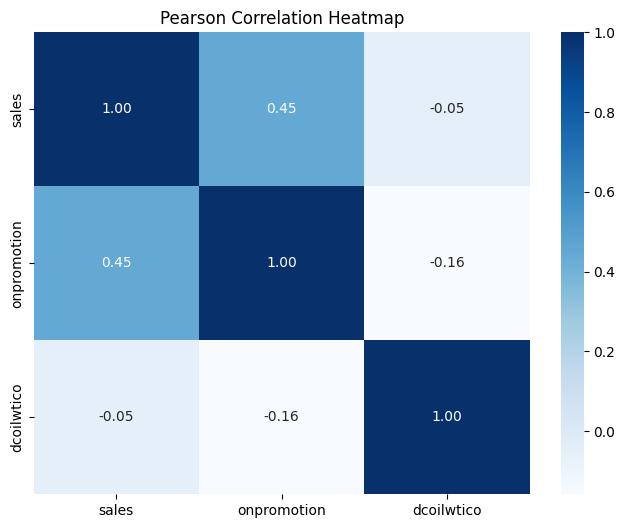

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan kolom 'date' dalam tipe datetime
#df['date'] = pd.to_datetime(df['date'])

# Memilih kolom numerik saja
numeric_cols = ['sales', 'onpromotion', 'dcoilwtico']

# Drop missing values (jika ada) agar korelasi dapat dihitung
df_numeric = df_store[numeric_cols].dropna()

# Menghitung matriks korelasi Pearson
correlation_matrix = df_numeric.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Pearson Correlation Heatmap')
plt.show()

### 1.1 Checking Missing Value

In [7]:
# Menghitung Jumlah Missing Value (NaN) per kolom
sum_missing_value = df_store.isna().sum()

# Validasi kolom missing value
val_columns_missing = sum_missing_value[sum_missing_value > 0]
print("Kolom nilai missing value:")
print(val_columns_missing)

# Menampilkan persentase missing value per kolom
df_percentage_miss_column = (val_columns_missing / len(df_store)) * 100
print("\nKolom percentage missing value:")
print(df_percentage_miss_column)

Kolom nilai missing value:
dcoilwtico    17193
dtype: int64

Kolom percentage missing value:
dcoilwtico    30.938242
dtype: float64


In [8]:
# Menggunakan metode interpolasi spline untuk handle missing values
df_store['dcoilwtico_interpolate'] = (df_store['dcoilwtico'].interpolate(method='spline', order=3).fillna(method='bfill'))

df_store.head()

<ipython-input-8-e55cd57f29c7>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_store['dcoilwtico_interpolate'] = (df_store['dcoilwtico'].interpolate(method='spline', order=3).fillna(method='bfill'))


id        date  store_nbr      family  sales  onpromotion  dcoilwtico  \
0  1452  2013-01-01          5  AUTOMOTIVE    0.0            0         NaN   
1  1453  2013-01-01          5   BABY CARE    0.0            0         NaN   
2  1454  2013-01-01          5      BEAUTY    0.0            0         NaN   
3  1455  2013-01-01          5   BEVERAGES    0.0            0         NaN   
4  1456  2013-01-01          5       BOOKS    0.0            0         NaN   

   dcoilwtico_interpolate  
0                   93.14  
1                   93.14  
2                   93.14  
3                   93.14  
4                   93.14

In [9]:
# Cek apakah ada NaN setelah interpolasi
print(df_store.isna().sum())

id                            0
date                          0
store_nbr                     0
family                        0
sales                         0
onpromotion                   0
dcoilwtico                17193
dcoilwtico_interpolate        0
dtype: int64


In [10]:
# Introduce missing values
np.random.seed(0)
missing_idx = np.random.choice(df_store.index, size=15, replace=False)
df_store.loc[missing_idx, 'dcoilwtico'] = np.nan

<ipython-input-11-9a53fb0406e5>:14: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df_store.interpolate(method='spline', order=3).fillna(method='bfill')
<ipython-input-11-9a53fb0406e5>:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_interpolated = df_store.interpolate(method='spline', order=3).fillna(method='bfill')


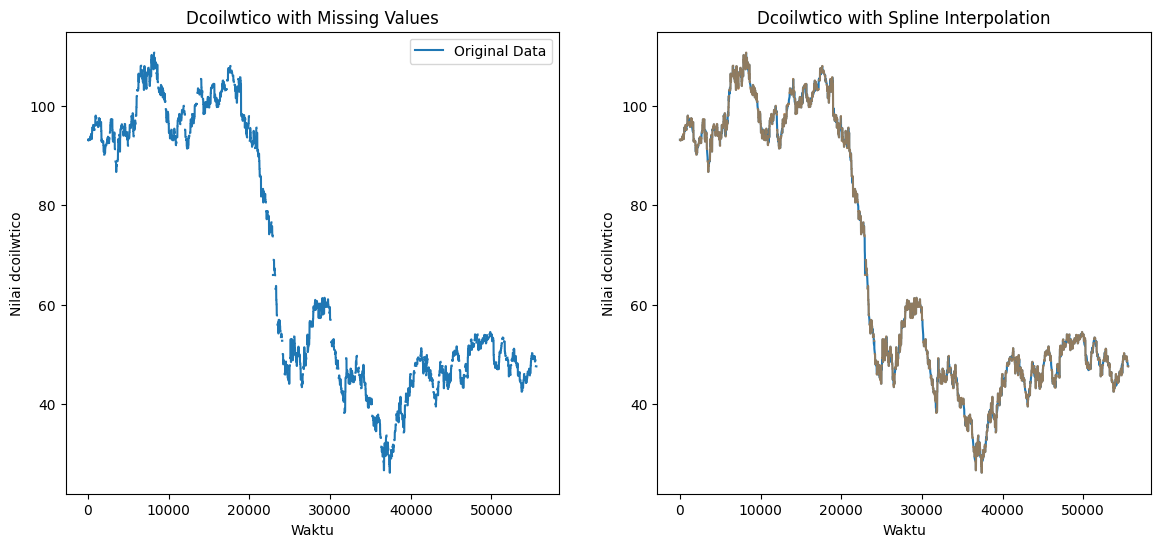

In [11]:
# Plot the data with missing values
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.plot(df_store.index, df_store['dcoilwtico'], label='Original Data', linestyle='-')
plt.legend()
plt.title('Dcoilwtico with Missing Values')
plt.xlabel('Waktu')
plt.ylabel('Nilai dcoilwtico')


# Plot the interpolated data
plt.subplot(1, 2, 2)
# Use spline interpolation to fill in missing values
df_interpolated = df_store.interpolate(method='spline', order=3).fillna(method='bfill')
missing_idx = df_interpolated.index[df_interpolated['dcoilwtico'].isna()]

# Plot the interpolated data
plt.plot(df_interpolated.index, df_interpolated['dcoilwtico'], label='Spline Interpolation')
plt.plot(df_store.index, df_store['dcoilwtico'], label='Original Data', alpha=0.5)
plt.scatter(missing_idx, df_interpolated.loc[missing_idx, 'dcoilwtico'], label='Interpolated Values', color='green')
plt.title('Dcoilwtico with Spline Interpolation')
plt.xlabel('Waktu')
plt.ylabel('Nilai dcoilwtico')
plt.show()

### 1.2 Checking Missing Date

#### 1.2.1 Checking Missing Date - All Family

In [12]:
df_store_new = df_store.reset_index()  # Resets the index, bringing 'date' back as a column
df_store_new = df_store[['date','store_nbr','family','sales','onpromotion','dcoilwtico']]

In [13]:
# Pastikan kolom 'date' bertipe datetime pada df_store_new
df_store_new['date'] = pd.to_datetime(df_store['date'])

# Buat rentang tanggal lengkap berdasarkan min & max
full_date_range = pd.date_range(start=df_store_new['date'].min(), end=df_store_new['date'].max(), freq='D')
# Membuat dataframe dengan kombinasi unik dari family dan store_nbr
store_family_combinations = df_store_new[['store_nbr', 'family']].drop_duplicates()

# Daftar untuk menyimpan baris dengan tanggal yang hilang
missing_data = []

for _, row in store_family_combinations.iterrows():
    store_nbr = row['store_nbr']
    family = row['family']

    # Filter data untuk kombinasi store_nbr dan family tertentu
    family_data = df_store_new[(df_store_new['store_nbr'] == store_nbr) & (df_store_new['family'] == family)]

    # Cari tanggal yang hilang untuk kombinasi ini
    missing_dates = full_date_range.difference(family_data['date'])

    # Simpan hasilnya dalam bentuk data baru
    for missing_date in missing_dates:
        missing_data.append({
            'store_nbr': store_nbr,
            'family': family,
            'date': missing_date,
            'sales': 0,  # Menetapkan nilai default untuk sales
            'onpromotion': 0,  # Nilai default untuk onpromotion
            'dcoilwtico': None  # Nilai default untuk dcoilwtico
        })

# Buat DataFrame untuk missing data
missing_df = pd.DataFrame(missing_data)

# Gabungkan missing data ke df_store_new
df_store_full = pd.concat([df_store_new, missing_df], ignore_index=True)

# Urutkan berdasarkan store_nbr, family, dan date
df_store_full = df_store_full.sort_values(by=['store_nbr', 'family', 'date']).reset_index(drop=True)

# Menampilkan hasil
df_store_full

<ipython-input-13-04e8043772f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_store_new['date'] = pd.to_datetime(df_store['date'])
<ipython-input-13-04e8043772f1>:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_store_full = pd.concat([df_store_new, missing_df], ignore_index=True)


date  store_nbr      family   sales  onpromotion  dcoilwtico
0     2013-01-01          5  AUTOMOTIVE   0.000            0         NaN
1     2013-01-02          5  AUTOMOTIVE   6.000            0       93.14
2     2013-01-03          5  AUTOMOTIVE   4.000            0       92.97
3     2013-01-04          5  AUTOMOTIVE   6.000            0       93.12
4     2013-01-05          5  AUTOMOTIVE   4.000            0         NaN
...          ...        ...         ...     ...          ...         ...
55699 2017-08-11          5     SEAFOOD   8.402            4       48.81
55700 2017-08-12          5     SEAFOOD   7.320            0         NaN
55701 2017-08-13          5     SEAFOOD  11.642            0         NaN
55702 2017-08-14          5     SEAFOOD  11.694            0       47.59
55703 2017-08-15          5     SEAFOOD   9.669            0       47.57

[55704 rows x 6 columns]

In [14]:
# Filter hanya data dengan family "AUTOMOTIVE"
df_automotive = df_store_full[df_store_full["family"] == "AUTOMOTIVE"]
df_automotive

date  store_nbr      family  sales  onpromotion  dcoilwtico
0    2013-01-01          5  AUTOMOTIVE    0.0            0         NaN
1    2013-01-02          5  AUTOMOTIVE    6.0            0       93.14
2    2013-01-03          5  AUTOMOTIVE    4.0            0       92.97
3    2013-01-04          5  AUTOMOTIVE    6.0            0       93.12
4    2013-01-05          5  AUTOMOTIVE    4.0            0         NaN
...         ...        ...         ...    ...          ...         ...
1683 2017-08-11          5  AUTOMOTIVE   12.0            0       48.81
1684 2017-08-12          5  AUTOMOTIVE    1.0            0         NaN
1685 2017-08-13          5  AUTOMOTIVE   15.0            0         NaN
1686 2017-08-14          5  AUTOMOTIVE    6.0            0       47.59
1687 2017-08-15          5  AUTOMOTIVE    9.0            0       47.57

[1688 rows x 6 columns]

In [15]:
# Filter hanya bulan Desember
df_automotive_december = df_automotive[df_automotive['date'].dt.month == 12]
df_automotive_december.head(60)

date  store_nbr      family  sales  onpromotion  dcoilwtico
334 2013-12-01          5  AUTOMOTIVE   16.0            0         NaN
335 2013-12-02          5  AUTOMOTIVE   11.0            0       93.61
336 2013-12-03          5  AUTOMOTIVE    2.0            0       95.83
337 2013-12-04          5  AUTOMOTIVE    2.0            0       96.97
338 2013-12-05          5  AUTOMOTIVE    7.0            0       97.14
339 2013-12-06          5  AUTOMOTIVE    2.0            0       97.48
340 2013-12-07          5  AUTOMOTIVE    2.0            0         NaN
341 2013-12-08          5  AUTOMOTIVE   12.0            0         NaN
342 2013-12-09          5  AUTOMOTIVE    8.0            0       97.10
343 2013-12-10          5  AUTOMOTIVE    2.0            0       98.32
344 2013-12-11          5  AUTOMOTIVE    2.0            0       97.25
345 2013-12-12          5  AUTOMOTIVE    6.0            0       97.21
346 2013-12-13          5  AUTOMOTIVE    1.0            0       96.27
347 2013-12-14          5  AUTOMOTIVE    5.0            0         NaN
348 2013-12-15          5  AUTOMOTIVE   10.0            0         NaN
349 2013-12-16          5  AUTOMOTIVE    5.0            0       97.18
350 2013-12-17          5  AUTOMOTIVE    2.0            0       96.99
351 2013-12-18          5  AUTOMOTIVE    3.0            0       97.59
352 2013-12-19          5  AUTOMOTIVE    5.0            0       98.40
353 2013-12-20          5  AUTOMOTIVE    6.0            0       99.11
354 2013-12-21          5  AUTOMOTIVE    3.0            0         NaN
355 2013-12-22          5  AUTOMOTIVE    7.0            0         NaN
356 2013-12-23          5  AUTOMOTIVE    2.0            0       98.62
357 2013-12-24          5  AUTOMOTIVE    2.0            0       98.87
358 2013-12-25          5  AUTOMOTIVE    0.0            0         NaN
359 2013-12-26          5  AUTOMOTIVE    2.0            0       99.18
360 2013-12-27          5  AUTOMOTIVE   11.0            0       99.94
361 2013-12-28          5  AUTOMOTIVE    5.0            0         NaN
362 2013-12-29          5  AUTOMOTIVE    6.0            0         NaN
363 2013-12-30          5  AUTOMOTIVE    5.0            0       98.90
364 2013-12-31          5  AUTOMOTIVE    2.0            0       98.17
699 2014-12-01          5  AUTOMOTIVE   12.0            0       68.98
700 2014-12-02          5  AUTOMOTIVE    1.0            0       66.99
701 2014-12-03          5  AUTOMOTIVE    1.0            0       67.30
702 2014-12-04          5  AUTOMOTIVE    3.0            0       66.73
703 2014-12-05          5  AUTOMOTIVE    3.0            0       65.89
704 2014-12-06          5  AUTOMOTIVE    7.0            0         NaN
705 2014-12-07          5  AUTOMOTIVE    5.0            0         NaN
706 2014-12-08          5  AUTOMOTIVE    6.0            0       63.13
707 2014-12-09          5  AUTOMOTIVE    6.0            0       63.74
708 2014-12-10          5  AUTOMOTIVE    3.0            0       60.99
709 2014-12-11          5  AUTOMOTIVE    4.0            0       60.01
710 2014-12-12          5  AUTOMOTIVE    2.0            0       57.81
711 2014-12-13          5  AUTOMOTIVE    3.0            0         NaN
712 2014-12-14          5  AUTOMOTIVE    9.0            0         NaN
713 2014-12-15          5  AUTOMOTIVE    6.0            0       55.96
714 2014-12-16          5  AUTOMOTIVE    4.0            0       55.97
715 2014-12-17          5  AUTOMOTIVE    2.0            0       56.43
716 2014-12-18          5  AUTOMOTIVE    9.0            0       54.18
717 2014-12-19          5  AUTOMOTIVE    3.0            0       56.91
718 2014-12-20          5  AUTOMOTIVE    7.0            0         NaN
719 2014-12-21          5  AUTOMOTIVE   17.0            0         NaN
720 2014-12-22          5  AUTOMOTIVE    4.0            0       55.25
721 2014-12-23          5  AUTOMOTIVE    7.0            0       56.78
722 2014-12-24          5  AUTOMOTIVE    6.0            0       55.70
723 2014-12-25          5  AUTOMOTIVE    0.0            0         NaN
724 2014-12-26      

#### 1.2.2 Checking Missing Date - Family GROCERY I

In [16]:
# Filter hanya data dengan family "GROCERY I"
df_grocery = df_store[df_store["family"] == "GROCERY I"]
df_grocery

id        date  store_nbr     family   sales  onpromotion  \
12        1464  2013-01-01          5  GROCERY I     0.0            0   
45        3246  2013-01-02          5  GROCERY I  4558.0            0   
78        5028  2013-01-03          5  GROCERY I  3260.0            0   
111       6810  2013-01-04          5  GROCERY I  3085.0            0   
144       8592  2013-01-05          5  GROCERY I  3398.0            0   
...        ...         ...        ...        ...     ...          ...   
55419  2993442  2017-08-11          5  GROCERY I  2864.0           35   
55452  2995224  2017-08-12          5  GROCERY I  2476.0           31   
55485  2997006  2017-08-13          5  GROCERY I  3141.0           31   
55518  2998788  2017-08-14          5  GROCERY I  2717.0           32   
55551  3000570  2017-08-15          5  GROCERY I  2696.0           26   

       dcoilwtico  dcoilwtico_interpolate  
12            NaN               93.140000  
45          93.14               93.140000  
78          92.97               92.970000  
111         93.12               93.120000  
144           NaN               93.102688  
...           ...                     ...  
55419       48.81               48.810000  
55452         NaN               48.501091  
55485         NaN               48.244678  
55518       47.59               47.590000  
55551       47.57               47.570000  

[1684 rows x 8 columns]

In [17]:
df_grocery = df_grocery[['date','store_nbr','family','sales','onpromotion','dcoilwtico','dcoilwtico_interpolate']]

In [18]:
# Buat rentang tanggal lengkap berdasarkan min & max
full_date_range = pd.date_range(start=df_grocery['date'].min(), end=df_grocery['date'].max(), freq='D')

# Cari tanggal yang hilang
missing_dates = full_date_range.difference(df_grocery['date'])
missing_dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', length=1688, freq='D')

In [19]:
# Filter hanya bulan Desember
df_grocery['date'] = pd.to_datetime(df_grocery['date'])  # Convert 'date' to datetime

df_december = df_grocery[df_grocery['date'].dt.month == 12]
df_december.head(60)

<ipython-input-19-c25581755df4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grocery['date'] = pd.to_datetime(df_grocery['date'])  # Convert 'date' to datetime


date  store_nbr     family   sales  onpromotion  dcoilwtico  \
11034 2013-12-01          5  GROCERY I  4969.0            0         NaN   
11067 2013-12-02          5  GROCERY I  3034.0            0       93.61   
11100 2013-12-03          5  GROCERY I  2650.0            0       95.83   
11133 2013-12-04          5  GROCERY I  2962.0            0       96.97   
11166 2013-12-05          5  GROCERY I  2971.0            0       97.14   
11199 2013-12-06          5  GROCERY I  2946.0            0       97.48   
11232 2013-12-07          5  GROCERY I  3467.0            0         NaN   
11265 2013-12-08          5  GROCERY I  4078.0            0         NaN   
11298 2013-12-09          5  GROCERY I  4625.0            0       97.10   
11331 2013-12-10          5  GROCERY I  2405.0            0       98.32   
11364 2013-12-11          5  GROCERY I  3000.0            0       97.25   
11397 2013-12-12          5  GROCERY I  4296.0            0       97.21   
11430 2013-12-13          5  GROCERY I  4774.0            0       96.27   
11463 2013-12-14          5  GROCERY I  4966.0            0         NaN   
11496 2013-12-15          5  GROCERY I  4935.0            0         NaN   
11529 2013-12-16          5  GROCERY I  4303.0            0       97.18   
11562 2013-12-17          5  GROCERY I  4160.0            0       96.99   
11595 2013-12-18          5  GROCERY I  3797.0            0       97.59   
11628 2013-12-19          5  GROCERY I  5949.0            0       98.40   
11661 2013-12-20          5  GROCERY I  4478.0            0       99.11   
11694 2013-12-21          5  GROCERY I  5436.0            0         NaN   
11727 2013-12-22          5  GROCERY I  5898.0            0         NaN   
11760 2013-12-23          5  GROCERY I  7652.0            0       98.62   
11793 2013-12-24          5  GROCERY I  6057.0            0       98.87   
11826 2013-12-26          5  GROCERY I  3749.0            0       99.18   
11859 2013-12-27          5  GROCERY I  4471.0            0       99.94   
11892 2013-12-28          5  GROCERY I  4260.0            0         NaN   
11925 2013-12-29          5  GROCERY I  3834.0            0         NaN   
11958 2013-12-30          5  GROCERY I  5508.0            0       98.90   
11991 2013-12-31          5  GROCERY I  4271.0            0       98.17   
23046 2014-12-01          5  GROCERY I  4236.0           15       68.98   
23079 2014-12-02          5  GROCERY I  5809.0           11       66.99   
23112 2014-12-03          5  GROCERY I  3638.0           21       67.30   
23145 2014-12-04          5  GROCERY I  3071.0           18       66.73   
23178 2014-12-05          5  GROCERY I  3576.0           14       65.89   
23211 2014-12-06          5  GROCERY I  4614.0           26         NaN   
23244 2014-12-07          5  GROCERY I  4742.0           20         NaN   
23277 2014-12-08          5  GROCERY I  3494.0            8       63.13   
23310 2014-12-09          5  GROCERY I  3217.0           16       63.74   
23343 2014-12-10          5  GROCERY I  3763.0           17       60.99   
23376 2014-12-11          5  GROCERY I  3070.0            8       60.01   
23409 2014-12-12          5  GROCERY I  4410.0            8       57.81   
23442 2014-12-13          5  GROCERY I  4298.0            7         NaN   
23475 2014-12-14          5  GROCERY I  6446.0           18         NaN   
23508 2014-12-15          5  GROCERY I  4393.0           12       55.96   
23541 2014-12-16          5  GROCERY I  5212.0           11       55.97   
23574 2014-12-17          5  GROCERY I  5328.0           10       56.43   
23607 2014-12-18          5  GROCERY I  4332.0            9       54.18   
23640 2014-12-19          5  GROCERY I  5175.0            9       56.91   
23673 2014-12-20          5  GROCERY I  5857.0           14         NaN   
23706 2014-12-21          5  GROCERY I  6351.0           19         NaN   
23739 2014-12-22          5  GROCERY I  6355.0           15       55.25   
23772 2014-12-23          5  GROCERY 

In [20]:
missing_dates[missing_dates.dayofyear == 1]  # Cek Tahun Baru

DatetimeIndex(['2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01',
               '2017-01-01'],
              dtype='datetime64[ns]', freq=None)

In [21]:
missing_dates[missing_dates.dayofyear == 364]

DatetimeIndex(['2013-12-30', '2014-12-30', '2015-12-30', '2016-12-29'], dtype='datetime64[ns]', freq=None)

In [22]:
# Set index ke 'date' dan reindex dengan full_date_range
df_grocery = df_grocery.set_index('date').reindex(full_date_range).reset_index()

# Pastikan kolom tetap bernama 'date'
df_grocery.rename(columns={'index': 'date'}, inplace=True)

# Isi sales dan onpromotion dengan 0, tetapi dcoilwtico tetap NaN
df_grocery[['sales', 'onpromotion']] = df_grocery[['sales', 'onpromotion']].fillna(0)

In [23]:
df_grocery

date  store_nbr     family   sales  onpromotion  dcoilwtico  \
0    2013-01-01        5.0  GROCERY I     0.0          0.0         NaN   
1    2013-01-02        5.0  GROCERY I  4558.0          0.0       93.14   
2    2013-01-03        5.0  GROCERY I  3260.0          0.0       92.97   
3    2013-01-04        5.0  GROCERY I  3085.0          0.0       93.12   
4    2013-01-05        5.0  GROCERY I  3398.0          0.0         NaN   
...         ...        ...        ...     ...          ...         ...   
1683 2017-08-11        5.0  GROCERY I  2864.0         35.0       48.81   
1684 2017-08-12        5.0  GROCERY I  2476.0         31.0         NaN   
1685 2017-08-13        5.0  GROCERY I  3141.0         31.0         NaN   
1686 2017-08-14        5.0  GROCERY I  2717.0         32.0       47.59   
1687 2017-08-15        5.0  GROCERY I  2696.0         26.0       47.57   

      dcoilwtico_interpolate  
0                  93.140000  
1                  93.140000  
2                  92.970000  
3                  93.120000  
4                  93.102688  
...                      ...  
1683               48.810000  
1684               48.501091  
1685               48.244678  
1686               47.590000  
1687               47.570000  

[1688 rows x 7 columns]

In [24]:
# Filter hanya bulan Desember
df_december = df_grocery[df_grocery['date'].dt.month == 12]
df_december.head(60)

date  store_nbr     family   sales  onpromotion  dcoilwtico  \
334 2013-12-01        5.0  GROCERY I  4969.0          0.0         NaN   
335 2013-12-02        5.0  GROCERY I  3034.0          0.0       93.61   
336 2013-12-03        5.0  GROCERY I  2650.0          0.0       95.83   
337 2013-12-04        5.0  GROCERY I  2962.0          0.0       96.97   
338 2013-12-05        5.0  GROCERY I  2971.0          0.0       97.14   
339 2013-12-06        5.0  GROCERY I  2946.0          0.0       97.48   
340 2013-12-07        5.0  GROCERY I  3467.0          0.0         NaN   
341 2013-12-08        5.0  GROCERY I  4078.0          0.0         NaN   
342 2013-12-09        5.0  GROCERY I  4625.0          0.0       97.10   
343 2013-12-10        5.0  GROCERY I  2405.0          0.0       98.32   
344 2013-12-11        5.0  GROCERY I  3000.0          0.0       97.25   
345 2013-12-12        5.0  GROCERY I  4296.0          0.0       97.21   
346 2013-12-13        5.0  GROCERY I  4774.0          0.0       96.27   
347 2013-12-14        5.0  GROCERY I  4966.0          0.0         NaN   
348 2013-12-15        5.0  GROCERY I  4935.0          0.0         NaN   
349 2013-12-16        5.0  GROCERY I  4303.0          0.0       97.18   
350 2013-12-17        5.0  GROCERY I  4160.0          0.0       96.99   
351 2013-12-18        5.0  GROCERY I  3797.0          0.0       97.59   
352 2013-12-19        5.0  GROCERY I  5949.0          0.0       98.40   
353 2013-12-20        5.0  GROCERY I  4478.0          0.0       99.11   
354 2013-12-21        5.0  GROCERY I  5436.0          0.0         NaN   
355 2013-12-22        5.0  GROCERY I  5898.0          0.0         NaN   
356 2013-12-23        5.0  GROCERY I  7652.0          0.0       98.62   
357 2013-12-24        5.0  GROCERY I  6057.0          0.0       98.87   
358 2013-12-25        NaN        NaN     0.0          0.0         NaN   
359 2013-12-26        5.0  GROCERY I  3749.0          0.0       99.18   
360 2013-12-27        5.0  GROCERY I  4471.0          0.0       99.94   
361 2013-12-28        5.0  GROCERY I  4260.0          0.0         NaN   
362 2013-12-29        5.0  GROCERY I  3834.0          0.0         NaN   
363 2013-12-30        5.0  GROCERY I  5508.0          0.0       98.90   
364 2013-12-31        5.0  GROCERY I  4271.0          0.0       98.17   
699 2014-12-01        5.0  GROCERY I  4236.0         15.0       68.98   
700 2014-12-02        5.0  GROCERY I  5809.0         11.0       66.99   
701 2014-12-03        5.0  GROCERY I  3638.0         21.0       67.30   
702 2014-12-04        5.0  GROCERY I  3071.0         18.0       66.73   
703 2014-12-05        5.0  GROCERY I  3576.0         14.0       65.89   
704 2014-12-06        5.0  GROCERY I  4614.0         26.0         NaN   
705 2014-12-07        5.0  GROCERY I  4742.0         20.0         NaN   
706 2014-12-08        5.0  GROCERY I  3494.0          8.0       63.13   
707 2014-12-09        5.0  GROCERY I  3217.0         16.0       63.74   
708 2014-12-10        5.0  GROCERY I  3763.0         17.0       60.99   
709 2014-12-11        5.0  GROCERY I  3070.0          8.0       60.01   
710 2014-12-12        5.0  GROCERY I  4410.0          8.0       57.81   
711 2014-12-13        5.0  GROCERY I  4298.0          7.0         NaN   
712 2014-12-14        5.0  GROCERY I  6446.0         18.0         NaN   
713 2014-12-15        5.0  GROCERY I  4393.0         12.0       55.96   
714 2014-12-16        5.0  GROCERY I  5212.0         11.0       55.97   
715 2014-12-17        5.0  GROCERY I  5328.0         10.0       56.43   
716 2014-12-18        5.0  GROCERY I  4332.0          9.0       54.18   
717 2014-12-19        5.0  GROCERY I  5175.0          9.0       56.91   
718 2014-12-20        5.0  GROCERY I  5857.0         14.0         NaN   
719 2014-12-21        5.0  GROCERY I  6351.0         19.0         NaN   
720 2014-12-22        5.0  GROCERY I  6355.0         15.0       55.25   
721 2014-12-23        5.0  GROCERY I  7656.0         14.0       56.7

In [25]:
import numpy as np

# Isi missing store_nbr dengan 5 dan family dengan "GROCERY I"
df_grocery['store_nbr'] = df_grocery['store_nbr'].fillna(5).astype(int)
df_grocery['family'] = df_grocery['family'].fillna("GROCERY I")
df_grocery

date  store_nbr     family   sales  onpromotion  dcoilwtico  \
0    2013-01-01          5  GROCERY I     0.0          0.0         NaN   
1    2013-01-02          5  GROCERY I  4558.0          0.0       93.14   
2    2013-01-03          5  GROCERY I  3260.0          0.0       92.97   
3    2013-01-04          5  GROCERY I  3085.0          0.0       93.12   
4    2013-01-05          5  GROCERY I  3398.0          0.0         NaN   
...         ...        ...        ...     ...          ...         ...   
1683 2017-08-11          5  GROCERY I  2864.0         35.0       48.81   
1684 2017-08-12          5  GROCERY I  2476.0         31.0         NaN   
1685 2017-08-13          5  GROCERY I  3141.0         31.0         NaN   
1686 2017-08-14          5  GROCERY I  2717.0         32.0       47.59   
1687 2017-08-15          5  GROCERY I  2696.0         26.0       47.57   

      dcoilwtico_interpolate  
0                  93.140000  
1                  93.140000  
2                  92.970000  
3                  93.120000  
4                  93.102688  
...                      ...  
1683               48.810000  
1684               48.501091  
1685               48.244678  
1686               47.590000  
1687               47.570000  

[1688 rows x 7 columns]

In [26]:
# Filter hanya bulan Desember
df_december = df_grocery[df_grocery['date'].dt.month == 12]
df_december.head(60)

date  store_nbr     family   sales  onpromotion  dcoilwtico  \
334 2013-12-01          5  GROCERY I  4969.0          0.0         NaN   
335 2013-12-02          5  GROCERY I  3034.0          0.0       93.61   
336 2013-12-03          5  GROCERY I  2650.0          0.0       95.83   
337 2013-12-04          5  GROCERY I  2962.0          0.0       96.97   
338 2013-12-05          5  GROCERY I  2971.0          0.0       97.14   
339 2013-12-06          5  GROCERY I  2946.0          0.0       97.48   
340 2013-12-07          5  GROCERY I  3467.0          0.0         NaN   
341 2013-12-08          5  GROCERY I  4078.0          0.0         NaN   
342 2013-12-09          5  GROCERY I  4625.0          0.0       97.10   
343 2013-12-10          5  GROCERY I  2405.0          0.0       98.32   
344 2013-12-11          5  GROCERY I  3000.0          0.0       97.25   
345 2013-12-12          5  GROCERY I  4296.0          0.0       97.21   
346 2013-12-13          5  GROCERY I  4774.0          0.0       96.27   
347 2013-12-14          5  GROCERY I  4966.0          0.0         NaN   
348 2013-12-15          5  GROCERY I  4935.0          0.0         NaN   
349 2013-12-16          5  GROCERY I  4303.0          0.0       97.18   
350 2013-12-17          5  GROCERY I  4160.0          0.0       96.99   
351 2013-12-18          5  GROCERY I  3797.0          0.0       97.59   
352 2013-12-19          5  GROCERY I  5949.0          0.0       98.40   
353 2013-12-20          5  GROCERY I  4478.0          0.0       99.11   
354 2013-12-21          5  GROCERY I  5436.0          0.0         NaN   
355 2013-12-22          5  GROCERY I  5898.0          0.0         NaN   
356 2013-12-23          5  GROCERY I  7652.0          0.0       98.62   
357 2013-12-24          5  GROCERY I  6057.0          0.0       98.87   
358 2013-12-25          5  GROCERY I     0.0          0.0         NaN   
359 2013-12-26          5  GROCERY I  3749.0          0.0       99.18   
360 2013-12-27          5  GROCERY I  4471.0          0.0       99.94   
361 2013-12-28          5  GROCERY I  4260.0          0.0         NaN   
362 2013-12-29          5  GROCERY I  3834.0          0.0         NaN   
363 2013-12-30          5  GROCERY I  5508.0          0.0       98.90   
364 2013-12-31          5  GROCERY I  4271.0          0.0       98.17   
699 2014-12-01          5  GROCERY I  4236.0         15.0       68.98   
700 2014-12-02          5  GROCERY I  5809.0         11.0       66.99   
701 2014-12-03          5  GROCERY I  3638.0         21.0       67.30   
702 2014-12-04          5  GROCERY I  3071.0         18.0       66.73   
703 2014-12-05          5  GROCERY I  3576.0         14.0       65.89   
704 2014-12-06          5  GROCERY I  4614.0         26.0         NaN   
705 2014-12-07          5  GROCERY I  4742.0         20.0         NaN   
706 2014-12-08          5  GROCERY I  3494.0          8.0       63.13   
707 2014-12-09          5  GROCERY I  3217.0         16.0       63.74   
708 2014-12-10          5  GROCERY I  3763.0         17.0       60.99   
709 2014-12-11          5  GROCERY I  3070.0          8.0       60.01   
710 2014-12-12          5  GROCERY I  4410.0          8.0       57.81   
711 2014-12-13          5  GROCERY I  4298.0          7.0         NaN   
712 2014-12-14          5  GROCERY I  6446.0         18.0         NaN   
713 2014-12-15          5  GROCERY I  4393.0         12.0       55.96   
714 2014-12-16          5  GROCERY I  5212.0         11.0       55.97   
715 2014-12-17          5  GROCERY I  5328.0         10.0       56.43   
716 2014-12-18          5  GROCERY I  4332.0          9.0       54.18   
717 2014-12-19          5  GROCERY I  5175.0          9.0       56.91   
718 2014-12-20          5  GROCERY I  5857.0         14.0         NaN   
719 2014-12-21          5  GROCERY I  6351.0         19.0         NaN   
720 2014-12-22          5  GROCERY I  6355.0         15.0       55.25   
721 2014-12-23          5  GROCERY I  7656.0         14.0       56.7

## **2. Exploratory Data Analysis (EDA)**

### 2.1 Checking Stationarity (It must be stationer)

In [27]:
from statsmodels.tsa.stattools import adfuller

# Fungsi untuk ADF Test dan menampilkan hasil lengkap
def adf_test(series, series_name="Time Series"):
    result = adfuller(series.dropna())
    print(f"ADF Test for {series_name}:")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print(f"Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value:.4f}")
    if result[1] < 0.05:
        print("=> Data is stationary (reject H0)")
    else:
        print("=> Data is non-stationary (fail to reject H0)")

# Contoh ADF test untuk sales dan onpromotion
adf_test(df_store['sales'], "Sales")
adf_test(df_store['onpromotion'], "OnPromotion")

ADF Test for Sales:
ADF Statistic: -18.5331
p-value: 0.0000
Critical Values:
   1%: -3.4305
   5%: -2.8616
   10%: -2.5668
=> Data is stationary (reject H0)
ADF Test for OnPromotion:
ADF Statistic: -12.4370
p-value: 0.0000
Critical Values:
   1%: -3.4305
   5%: -2.8616
   10%: -2.5668
=> Data is stationary (reject H0)


In [28]:
df_store['onpromotion_diff'] = df_store['onpromotion'].diff()

In [29]:
df_store

id        date  store_nbr                      family     sales  \
0         1452  2013-01-01          5                  AUTOMOTIVE     0.000   
1         1453  2013-01-01          5                   BABY CARE     0.000   
2         1454  2013-01-01          5                      BEAUTY     0.000   
3         1455  2013-01-01          5                   BEVERAGES     0.000   
4         1456  2013-01-01          5                       BOOKS     0.000   
...        ...         ...        ...                         ...       ...   
55567  3000586  2017-08-15          5                     POULTRY   241.011   
55568  3000587  2017-08-15          5              PREPARED FOODS    52.121   
55569  3000588  2017-08-15          5                     PRODUCE  1357.823   
55570  3000589  2017-08-15          5  SCHOOL AND OFFICE SUPPLIES     0.000   
55571  3000590  2017-08-15          5                     SEAFOOD     9.669   

       onpromotion  dcoilwtico  dcoilwtico_interpolate  onpromotion_diff  
0                0         NaN                   93.14               NaN  
1                0         NaN                   93.14               0.0  
2                0         NaN                   93.14               0.0  
3                0         NaN                   93.14               0.0  
4                0         NaN                   93.14               0.0  
...            ...         ...                     ...               ...  
55567            1       47.57                   47.57               1.0  
55568            0       47.57                   47.57              -1.0  
55569            4       47.57                   47.57               4.0  
55570            0       47.57                   47.57              -4.0  
55571            0       47.57                   47.57               0.0  

[55572 rows x 9 columns]

In [30]:
# Uji ADF untuk mengecek stasioneritas
result = adfuller(df_store['onpromotion_diff'].dropna())

# Print hasil ADF Test
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Jika p-value > 0.05, berarti tidak stasioner
if result[1] > 0.05:
    print("Data tidak stasioner, perlu differencing.")
else:
    print("Data sudah stasioner.")

ADF Statistic: -54.19009469883514
p-value: 0.0
Data sudah stasioner.


In [31]:
# Buat rentang tanggal lengkap berdasarkan min & max
full_date_range = pd.date_range(start=df_store['date'].min(), end=df_store['date'].max(), freq='D')

# Cari tanggal yang hilang
missing_dates = full_date_range.difference(df_store['date'])
missing_dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', length=1688, freq='D')

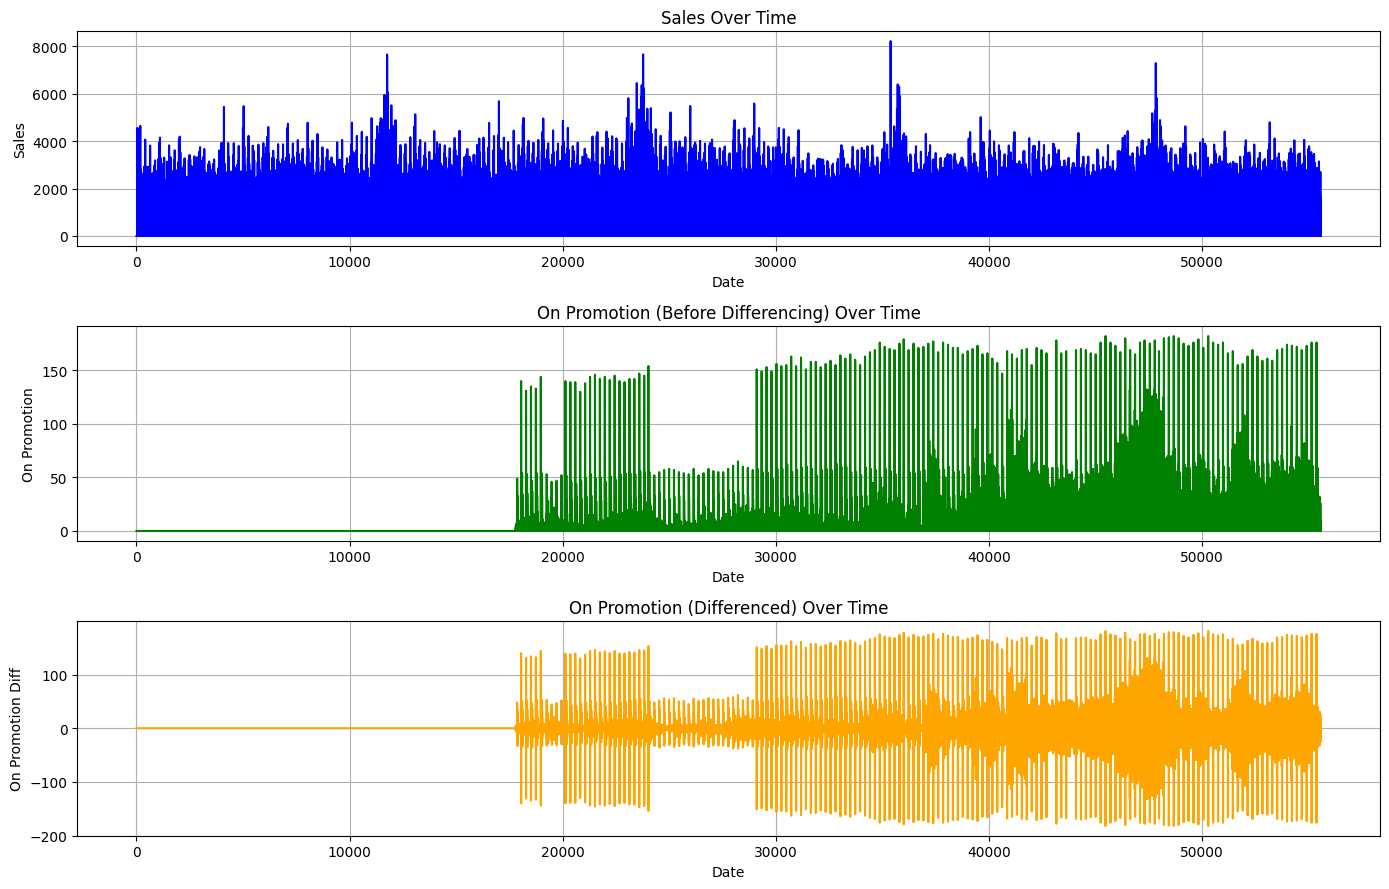

In [32]:
plt.figure(figsize=(14, 9))

# Plot Sales
plt.subplot(3, 1, 1)
plt.plot(df_store.index, df_store['sales'], color='blue')
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)

# Plot On Promotion (Before Differencing)
plt.subplot(3, 1, 2)
plt.plot(df_store.index, df_store['onpromotion'], color='green')
plt.title("On Promotion (Before Differencing) Over Time")
plt.xlabel("Date")
plt.ylabel("On Promotion")
plt.grid(True)

# Plot On Promotion (Differenced)
plt.subplot(3, 1, 3)
plt.plot(df_store.index, df_store['onpromotion_diff'], color='orange')
plt.title("On Promotion (Differenced) Over Time")
plt.xlabel("Date")
plt.ylabel("On Promotion Diff")
plt.grid(True)

plt.tight_layout()
plt.show()

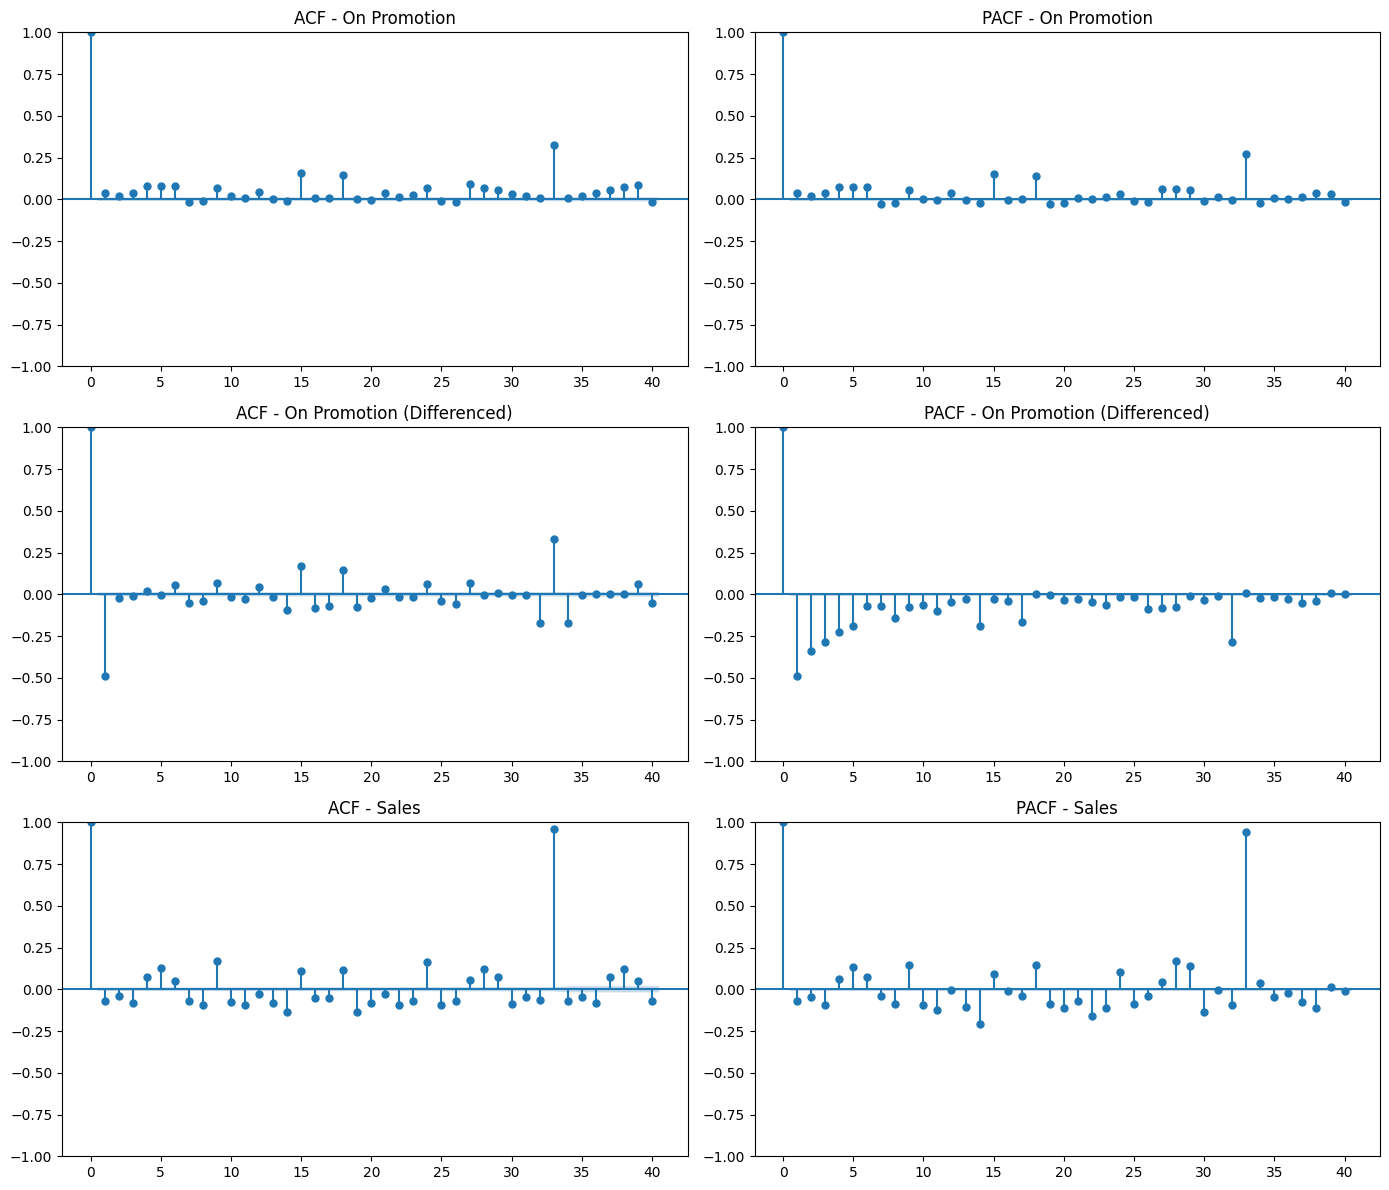

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Pastikan tanggal dalam format datetime
df_store['date'] = pd.to_datetime(df_store['date'])
df_store.set_index('date', inplace=True)

# Lakukan differencing untuk onpromotion
df_store['onpromotion_diff'] = df_store['onpromotion'].diff()

# Drop NaN akibat differencing
df_store.dropna(inplace=True)


fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# ACF & PACF On Promotion (Sebelum Differencing)
plot_acf(df_store['onpromotion'], lags=40, ax=axes[0, 0])
axes[0, 0].set_title("ACF - On Promotion")

plot_pacf(df_store['onpromotion'], lags=40, ax=axes[0, 1])
axes[0, 1].set_title("PACF - On Promotion")

# ACF & PACF On Promotion (Setelah Differencing)
plot_acf(df_store['onpromotion_diff'], lags=40, ax=axes[1, 0])
axes[1, 0].set_title("ACF - On Promotion (Differenced)")

plot_pacf(df_store['onpromotion_diff'], lags=40, ax=axes[1, 1])
axes[1, 1].set_title("PACF - On Promotion (Differenced)")

# ACF & PACF Sales
plot_acf(df_store['sales'], lags=40, ax=axes[2, 0])
axes[2, 0].set_title("ACF - Sales")

plot_pacf(df_store['sales'], lags=40, ax=axes[2, 1])
axes[2, 1].set_title("PACF - Sales")

plt.tight_layout()
plt.show()

### 2.2 Checking Seasonal Pattern (Add variable dummy if there is seasonal pattern)

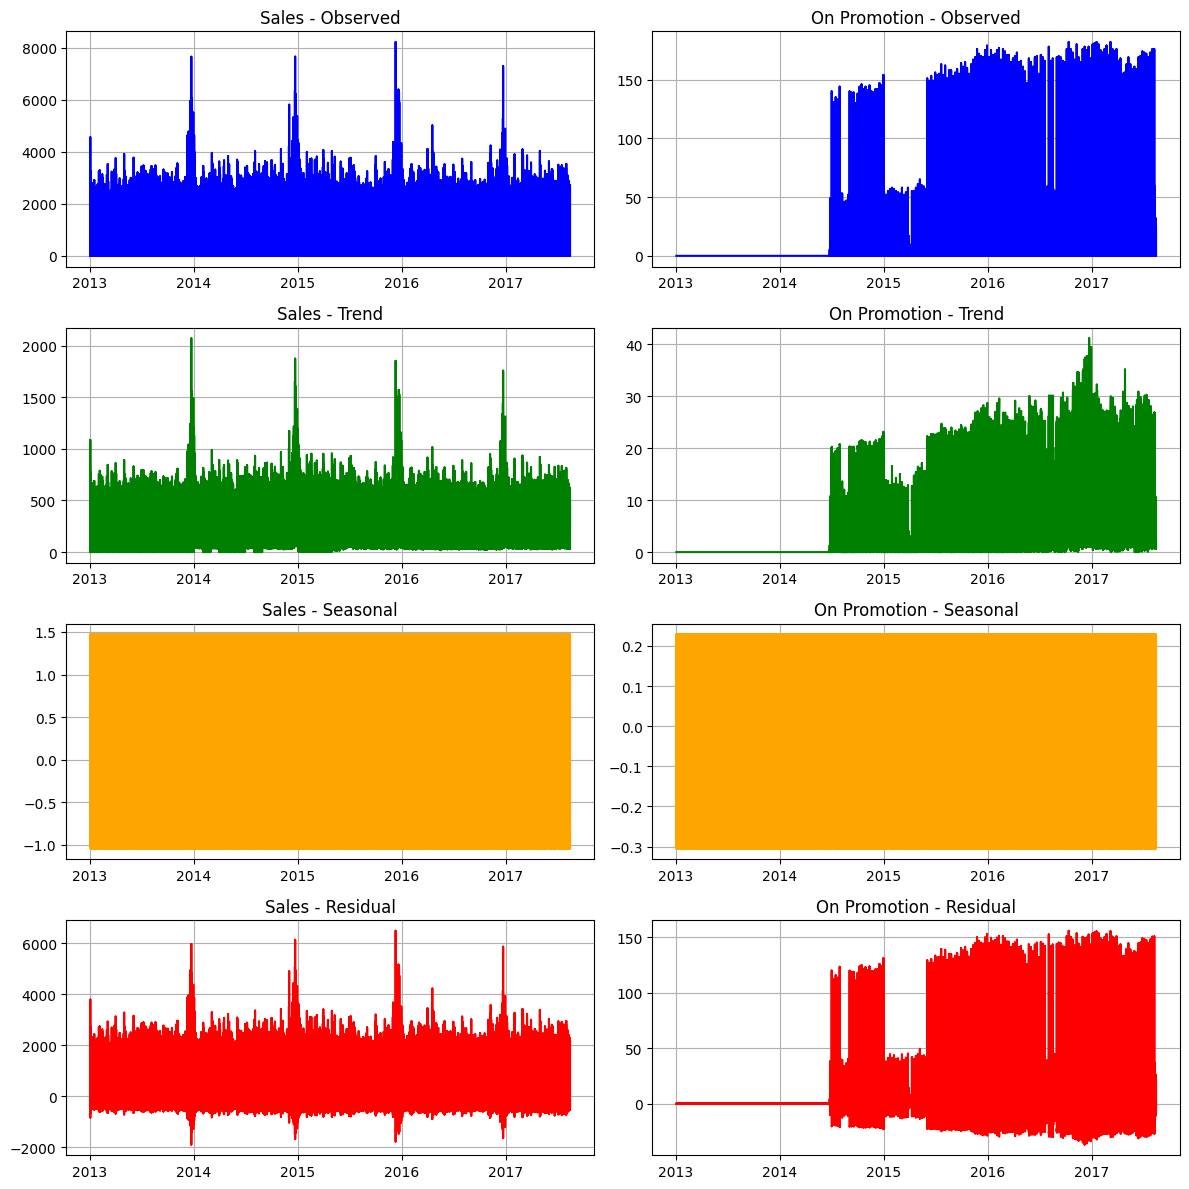

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose Sales dan On Promotion
decomp_sales = seasonal_decompose(df_store['sales'], model='additive', period=7)
decomp_onpromo = seasonal_decompose(df_store['onpromotion'], model='additive', period=7)

fig, axes = plt.subplots(4, 2, figsize=(12, 12))

# Warna untuk membedakan setiap plot
colors = ['blue', 'green', 'orange', 'red']

# Sales Decomposition
axes[0, 0].plot(decomp_sales.observed, color=colors[0])
axes[0, 0].set_title("Sales - Observed")
axes[1, 0].plot(decomp_sales.trend, color=colors[1])
axes[1, 0].set_title("Sales - Trend")
axes[2, 0].plot(decomp_sales.seasonal, color=colors[2])
axes[2, 0].set_title("Sales - Seasonal")
axes[3, 0].plot(decomp_sales.resid, color=colors[3])
axes[3, 0].set_title("Sales - Residual")

# On Promotion Decomposition
axes[0, 1].plot(decomp_onpromo.observed, color=colors[0])
axes[0, 1].set_title("On Promotion - Observed")
axes[1, 1].plot(decomp_onpromo.trend, color=colors[1])
axes[1, 1].set_title("On Promotion - Trend")
axes[2, 1].plot(decomp_onpromo.seasonal, color=colors[2])
axes[2, 1].set_title("On Promotion - Seasonal")
axes[3, 1].plot(decomp_onpromo.resid, color=colors[3])
axes[3, 1].set_title("On Promotion - Residual")

# Tambahkan grid untuk memperjelas pola
for ax in axes.flat:
    ax.grid(True)

plt.tight_layout()
plt.show()

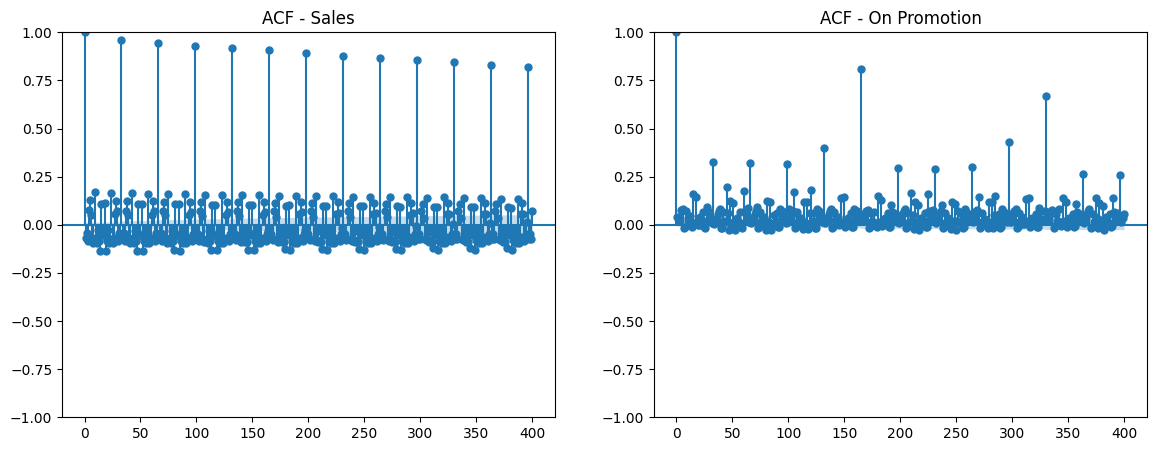

In [35]:
from statsmodels.graphics.tsaplots import plot_acf

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ACF Sales
plot_acf(df_store['sales'], lags=400, ax=axes[0])
axes[0].set_title("ACF - Sales")

# ACF On Promotion
plot_acf(df_store['onpromotion'], lags=400, ax=axes[1])
axes[1].set_title("ACF - On Promotion")

plt.show()

### 2.3 Analisa mendapatkan Top 3 Family by Sales

In [36]:
#Get Top 3 Family by Sales
get_top3_family = (
    df_store.groupby('family')['sales']
    .sum()
    .sort_values(ascending=False)
    .head(3)
)

print(get_top3_family)

family
GROCERY I    3.395431e+06
BEVERAGES    1.607278e+06
PRODUCE      1.132552e+06
Name: sales, dtype: float64


## **3. Modelling Development for Top 3 Family**

#### 3.1 GROCERIY I

In [111]:
# Filter hanya data dengan family "GROCERY I"
df_grocery = df_store[df_store["family"] == "GROCERY I"]
df_grocery

id  store_nbr     family   sales  onpromotion  dcoilwtico  \
date                                                                         
2013-01-02     3246          5  GROCERY I  4558.0            0       93.14   
2013-01-03     5028          5  GROCERY I  3260.0            0       92.97   
2013-01-04     6810          5  GROCERY I  3085.0            0       93.12   
2013-01-07    12156          5  GROCERY I  2801.0            0       93.20   
2013-01-08    13938          5  GROCERY I  2651.0            0       93.21   
...             ...        ...        ...     ...          ...         ...   
2017-08-09  2989878          5  GROCERY I  2872.0           41       49.59   
2017-08-10  2991660          5  GROCERY I  2687.0           33       48.54   
2017-08-11  2993442          5  GROCERY I  2864.0           35       48.81   
2017-08-14  2998788          5  GROCERY I  2717.0           32       47.59   
2017-08-15  3000570          5  GROCERY I  2696.0           26       47.57   

            dcoilwtico_interpolate  onpromotion_diff  
date                                                  
2013-01-02                   93.14               0.0  
2013-01-03                   92.97               0.0  
2013-01-04                   93.12               0.0  
2013-01-07                   93.20               0.0  
2013-01-08                   93.21               0.0  
...                            ...               ...  
2017-08-09                   49.59              40.0  
2017-08-10                   48.54              32.0  
2017-08-11                   48.81              34.0  
2017-08-14                   47.59              31.0  
2017-08-15                   47.57              26.0  

[1163 rows x 8 columns]

In [112]:
# Reset the index of df_grocery to bring 'date' back as a column
df_grocery = df_grocery.reset_index()

df_grocery = df_grocery[['date','store_nbr','family','sales','onpromotion','dcoilwtico']]

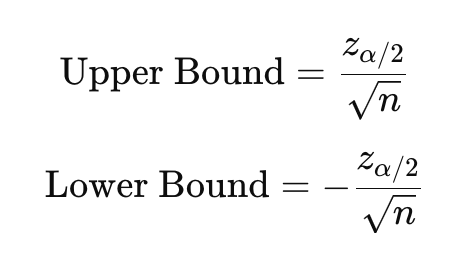

In [113]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf

# Hitung ACF untuk sales
acf_values = acf(df_grocery['sales'], nlags=1100, fft=False)  # Gunakan fft=False untuk akurasi lebih baik

# Buat DataFrame baru untuk hasil ACF tanpa mengubah df_grocery
acf_df = pd.DataFrame({'Lag': np.arange(len(acf_values)), 'ACF_Sales': acf_values})

# Tentukan jumlah observasi
n = len(df_grocery['sales'])

# Hitung batas konfidensi 95%
conf_interval = 1.96 / np.sqrt(n)

# Tambahkan kolom untuk batas bawah dan atas
acf_df['Lower_Bound'] = -conf_interval
acf_df['Upper_Bound'] = conf_interval

# Filter hanya untuk lag tahunan (365, 730, 1095)
acf_yearly = acf_df[acf_df['Lag'].isin([365, 730, 1095])]

# Evaluasi apakah nilai ACF signifikan (di luar batas konfidensi)
acf_yearly['Significant'] = (acf_yearly['ACF_Sales'] > acf_yearly['Upper_Bound']) | (acf_yearly['ACF_Sales'] < acf_yearly['Lower_Bound'])

# Tampilkan hasil
acf_yearly

<ipython-input-113-2a68a75e42ed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acf_yearly['Significant'] = (acf_yearly['ACF_Sales'] > acf_yearly['Upper_Bound']) | (acf_yearly['ACF_Sales'] < acf_yearly['Lower_Bound'])


Lag  ACF_Sales  Lower_Bound  Upper_Bound  Significant
365    365  -0.005091    -0.057473     0.057473        False
730    730  -0.012035    -0.057473     0.057473        False
1095  1095   0.004081    -0.057473     0.057473        False

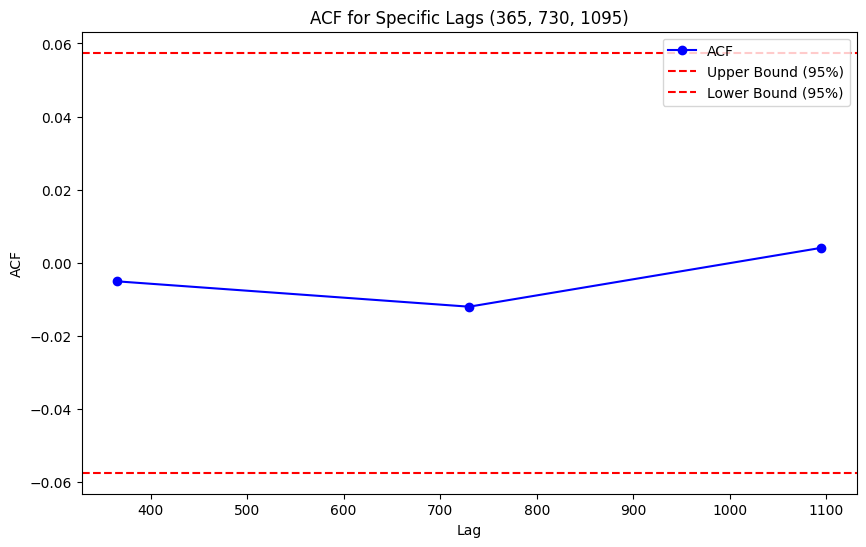

In [115]:
# Filter ACF hanya untuk lag 365, 730, 1095
acf_yearly = acf_df[acf_df['Lag'].isin([365, 730, 1095])]

# Plot ACF untuk lag tersebut
plt.figure(figsize=(10, 6))
plt.plot(acf_yearly['Lag'], acf_yearly['ACF_Sales'], marker='o', color='b', label='ACF')

# Tambahkan garis batas konfidensi
plt.axhline(y=1.96/np.sqrt(n), color='r', linestyle='--', label='Upper Bound (95%)')
plt.axhline(y=-1.96/np.sqrt(n), color='r', linestyle='--', label='Lower Bound (95%)')

# Menambahkan label dan judul
plt.title('ACF for Specific Lags (365, 730, 1095)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.legend()

# Tampilkan chart
plt.show()

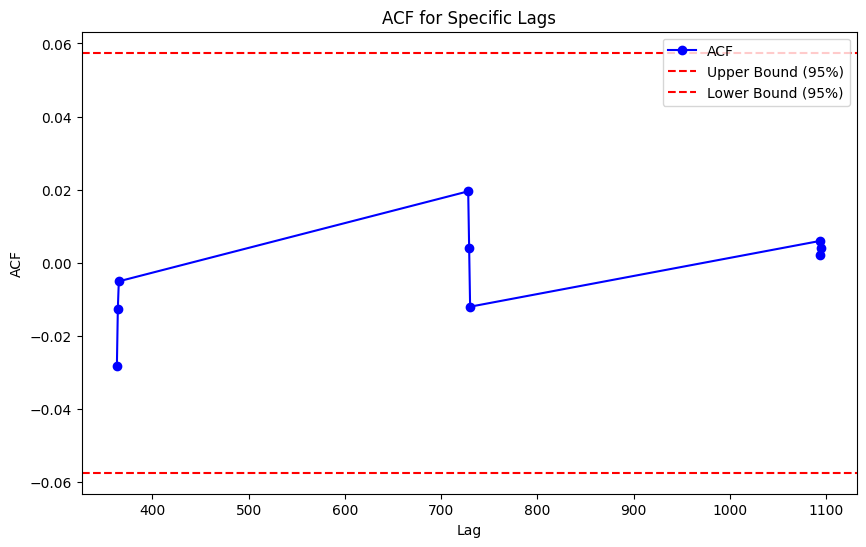

In [116]:
# Filter ACF hanya untuk lag tertentu
acf_somelags = acf_df[acf_df['Lag'].isin([363, 364, 365, 728, 729, 730, 1093, 1094, 1095])]

# Plot ACF untuk lag tersebut
plt.figure(figsize=(10, 6))
plt.plot(acf_somelags['Lag'], acf_somelags['ACF_Sales'], marker='o', color='b', label='ACF')

# Tambahkan garis batas konfidensi
plt.axhline(y=1.96/np.sqrt(n), color='r', linestyle='--', label='Upper Bound (95%)')
plt.axhline(y=-1.96/np.sqrt(n), color='r', linestyle='--', label='Lower Bound (95%)')

# Menambahkan label dan judul
plt.title('ACF for Specific Lags')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.legend()

# Tampilkan chart
plt.show()

In [117]:
df_grocery

date  store_nbr     family   sales  onpromotion  dcoilwtico
0    2013-01-02          5  GROCERY I  4558.0            0       93.14
1    2013-01-03          5  GROCERY I  3260.0            0       92.97
2    2013-01-04          5  GROCERY I  3085.0            0       93.12
3    2013-01-07          5  GROCERY I  2801.0            0       93.20
4    2013-01-08          5  GROCERY I  2651.0            0       93.21
...         ...        ...        ...     ...          ...         ...
1158 2017-08-09          5  GROCERY I  2872.0           41       49.59
1159 2017-08-10          5  GROCERY I  2687.0           33       48.54
1160 2017-08-11          5  GROCERY I  2864.0           35       48.81
1161 2017-08-14          5  GROCERY I  2717.0           32       47.59
1162 2017-08-15          5  GROCERY I  2696.0           26       47.57

[1163 rows x 6 columns]

In [118]:
from scipy.stats import boxcox

# Reset the index to bring back 'date' as a column
#df_grocery = df_grocery.reset_index()

df_grocery_new = df_grocery[['date','store_nbr','family','sales','onpromotion','dcoilwtico']]

In [119]:
# Filter hanya data dengan family "GROCERY I"
df_grocery_new = df_grocery[df_grocery["family"] == "GROCERY I"]

# This line defines the variable full_date_range
full_date_range = pd.date_range(start=df_grocery_new['date'].min(), end=df_grocery_new['date'].max(), freq='D')

# Set index ke 'date' dan reindex dengan full_date_range
df_grocery_new = df_grocery_new.set_index('date').reindex(full_date_range).reset_index()

# Pastikan kolom tetap bernama 'date'
df_grocery_new.rename(columns={'index': 'date'}, inplace=True)

# Isi sales dan onpromotion dengan 0, tetapi dcoilwtico tetap NaN
df_grocery_new[['sales', 'onpromotion']] = df_grocery_new[['sales', 'onpromotion']].fillna(0)

# Isi missing store_nbr dengan 5 dan family dengan "GROCERY I"
df_grocery_new['store_nbr'] = df_grocery_new['store_nbr'].fillna(5).astype(int)
df_grocery_new['family'] = df_grocery_new['family'].fillna("GROCERY I")

In [120]:
df_grocery_new

date  store_nbr     family   sales  onpromotion  dcoilwtico
0    2013-01-02          5  GROCERY I  4558.0          0.0       93.14
1    2013-01-03          5  GROCERY I  3260.0          0.0       92.97
2    2013-01-04          5  GROCERY I  3085.0          0.0       93.12
3    2013-01-05          5  GROCERY I     0.0          0.0         NaN
4    2013-01-06          5  GROCERY I     0.0          0.0         NaN
...         ...        ...        ...     ...          ...         ...
1682 2017-08-11          5  GROCERY I  2864.0         35.0       48.81
1683 2017-08-12          5  GROCERY I     0.0          0.0         NaN
1684 2017-08-13          5  GROCERY I     0.0          0.0         NaN
1685 2017-08-14          5  GROCERY I  2717.0         32.0       47.59
1686 2017-08-15          5  GROCERY I  2696.0         26.0       47.57

[1687 rows x 6 columns]

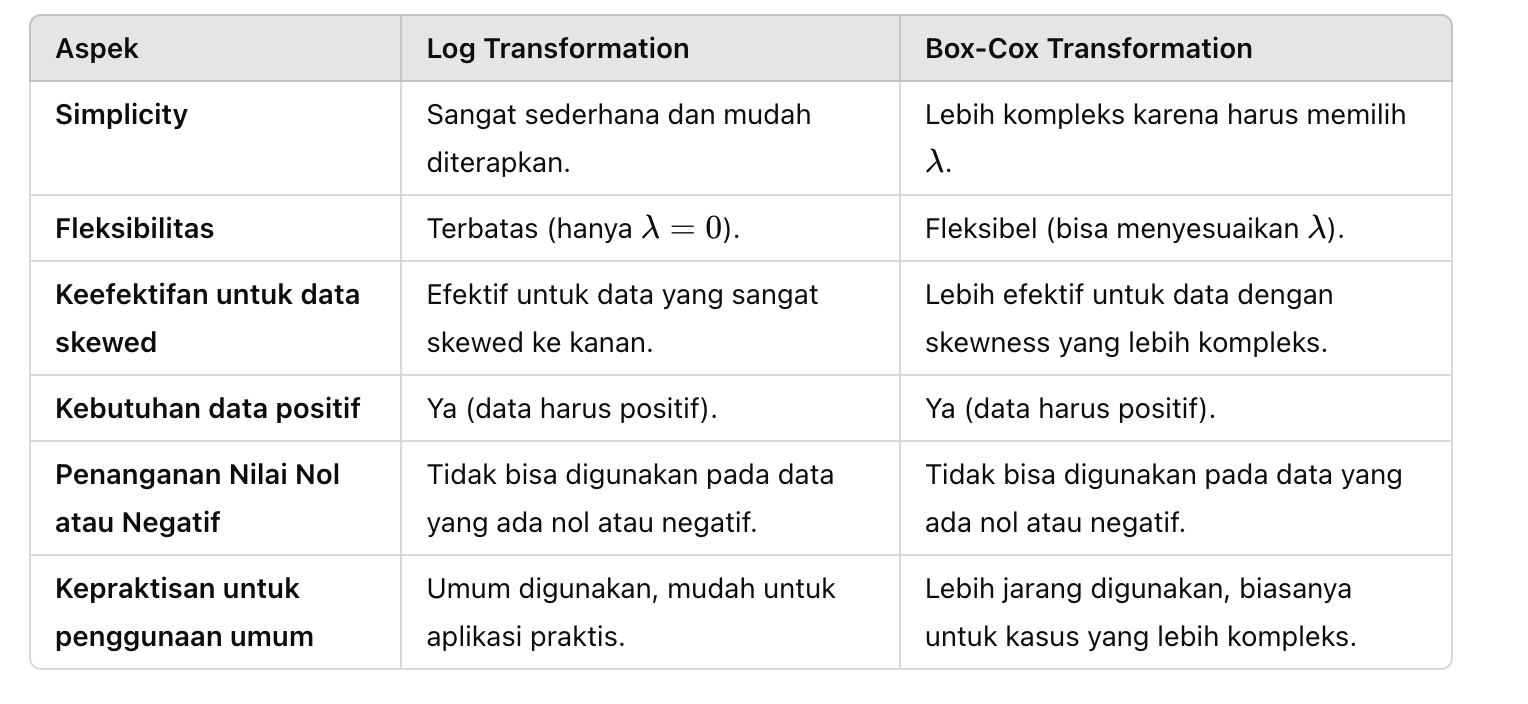

In [121]:
df_grocery_new['onpromotion_boxcox'], lambda_bc = boxcox(df_grocery_new['onpromotion'] + 1)
df_grocery_new

date  store_nbr     family   sales  onpromotion  dcoilwtico  \
0    2013-01-02          5  GROCERY I  4558.0          0.0       93.14   
1    2013-01-03          5  GROCERY I  3260.0          0.0       92.97   
2    2013-01-04          5  GROCERY I  3085.0          0.0       93.12   
3    2013-01-05          5  GROCERY I     0.0          0.0         NaN   
4    2013-01-06          5  GROCERY I     0.0          0.0         NaN   
...         ...        ...        ...     ...          ...         ...   
1682 2017-08-11          5  GROCERY I  2864.0         35.0       48.81   
1683 2017-08-12          5  GROCERY I     0.0          0.0         NaN   
1684 2017-08-13          5  GROCERY I     0.0          0.0         NaN   
1685 2017-08-14          5  GROCERY I  2717.0         32.0       47.59   
1686 2017-08-15          5  GROCERY I  2696.0         26.0       47.57   

      onpromotion_boxcox  
0               0.000000  
1               0.000000  
2               0.000000  
3               0.000000  
4               0.000000  
...                  ...  
1682            2.113324  
1683            0.000000  
1684            0.000000  
1685            2.085897  
1686            2.019595  

[1687 rows x 7 columns]

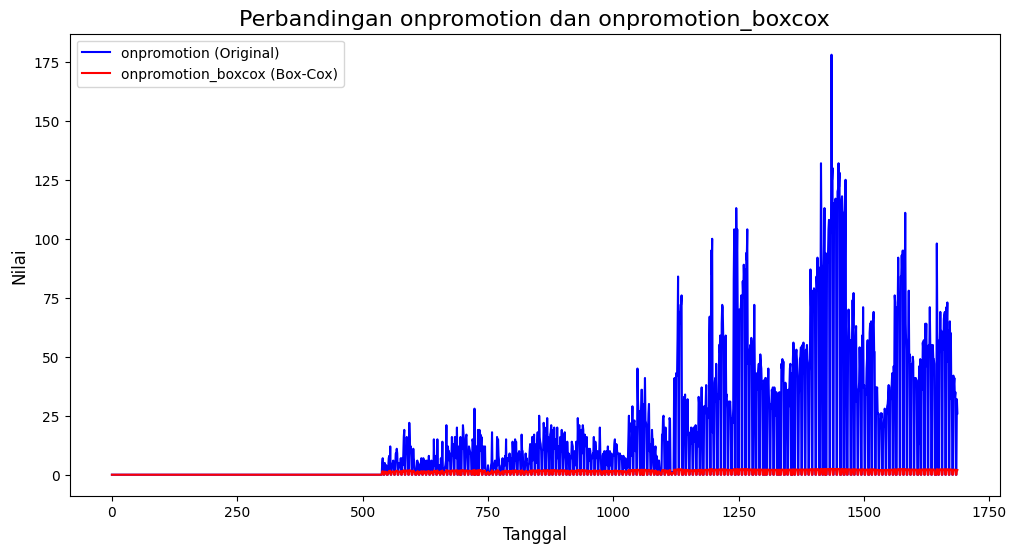

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot 'onpromotion' (data asli)
plt.plot(df_grocery_new.index, df_grocery_new['onpromotion'], label='onpromotion (Original)', color='blue')

# Plot 'onpromotion_boxcox' (setelah Box-Cox)
plt.plot(df_grocery_new.index, df_grocery_new['onpromotion_boxcox'], label='onpromotion_boxcox (Box-Cox)', color='red')

# Menambahkan label dan judul
plt.title('Perbandingan onpromotion dan onpromotion_boxcox', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Nilai', fontsize=12)

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

In [123]:
# Menghitung jumlah missing (NaN) per kolom
missing_per_column = df_grocery_new.isna().sum()
missing_per_column

date                    0
store_nbr               0
family                  0
sales                   0
onpromotion             0
dcoilwtico            524
onpromotion_boxcox      0
dtype: int64

In [124]:
# Buat rentang tanggal lengkap berdasarkan min & max
full_date_range = pd.date_range(start=df_grocery_new['date'].min(), end=df_grocery_new['date'].max(), freq='D')

# Cari tanggal yang hilang
missing_dates = full_date_range.difference(df_grocery_new['date'])
missing_dates

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [125]:
df_grocery_new

date  store_nbr     family   sales  onpromotion  dcoilwtico  \
0    2013-01-02          5  GROCERY I  4558.0          0.0       93.14   
1    2013-01-03          5  GROCERY I  3260.0          0.0       92.97   
2    2013-01-04          5  GROCERY I  3085.0          0.0       93.12   
3    2013-01-05          5  GROCERY I     0.0          0.0         NaN   
4    2013-01-06          5  GROCERY I     0.0          0.0         NaN   
...         ...        ...        ...     ...          ...         ...   
1682 2017-08-11          5  GROCERY I  2864.0         35.0       48.81   
1683 2017-08-12          5  GROCERY I     0.0          0.0         NaN   
1684 2017-08-13          5  GROCERY I     0.0          0.0         NaN   
1685 2017-08-14          5  GROCERY I  2717.0         32.0       47.59   
1686 2017-08-15          5  GROCERY I  2696.0         26.0       47.57   

      onpromotion_boxcox  
0               0.000000  
1               0.000000  
2               0.000000  
3               0.000000  
4               0.000000  
...                  ...  
1682            2.113324  
1683            0.000000  
1684            0.000000  
1685            2.085897  
1686            2.019595  

[1687 rows x 7 columns]

In [126]:
df_grocery_new['dcoilwtico_interpolate'] = (
    df_grocery_new['dcoilwtico']
    .interpolate(method='polynomial', order=2)
    .fillna(method='bfill')  # Mengisi NaN awal dengan nilai pertama yang valid
)

<ipython-input-126-0c56973c9553>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='bfill')  # Mengisi NaN awal dengan nilai pertama yang valid


In [127]:
df_grocery_new

date  store_nbr     family   sales  onpromotion  dcoilwtico  \
0    2013-01-02          5  GROCERY I  4558.0          0.0       93.14   
1    2013-01-03          5  GROCERY I  3260.0          0.0       92.97   
2    2013-01-04          5  GROCERY I  3085.0          0.0       93.12   
3    2013-01-05          5  GROCERY I     0.0          0.0         NaN   
4    2013-01-06          5  GROCERY I     0.0          0.0         NaN   
...         ...        ...        ...     ...          ...         ...   
1682 2017-08-11          5  GROCERY I  2864.0         35.0       48.81   
1683 2017-08-12          5  GROCERY I     0.0          0.0         NaN   
1684 2017-08-13          5  GROCERY I     0.0          0.0         NaN   
1685 2017-08-14          5  GROCERY I  2717.0         32.0       47.59   
1686 2017-08-15          5  GROCERY I  2696.0         26.0       47.57   

      onpromotion_boxcox  dcoilwtico_interpolate  
0               0.000000               93.140000  
1               0.000000               92.970000  
2               0.000000               93.120000  
3               0.000000               93.205338  
4               0.000000               93.185272  
...                  ...                     ...  
1682            2.113324               48.810000  
1683            0.000000               48.717426  
1684            0.000000               48.020802  
1685            2.085897               47.590000  
1686            2.019595               47.570000  

[1687 rows x 8 columns]

##### Modelling Using VARMAX with MAE

In [158]:
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_absolute_error

# Since 'date' is likely the index, reset it to a column
df_grocery_new = df_grocery_new.reset_index()

# Pastikan kolom tanggal dalam format datetime
df_grocery_new['date'] = pd.to_datetime(df_grocery_new['date'])

# Set kolom tanggal sebagai indeks
df_grocery_new.set_index('date', inplace=True)

# Pisahkan variabel endogen dan eksogen
endog = df_grocery_new[['sales', 'onpromotion_boxcox']]
exog = df_grocery_new[['dcoilwtico_interpolate']]

# Pisahkan data menjadi train dan test
train_size = int(len(df_grocery) * 0.8)
train_endog, test_endog = endog.iloc[:train_size], endog.iloc[train_size:]
train_exog, test_exog = exog.iloc[:train_size], exog.iloc[train_size:]

In [159]:
train_endog

sales  onpromotion_boxcox
date                                  
2013-01-02  4558.0            0.000000
2013-01-03  3260.0            0.000000
2013-01-04  3085.0            0.000000
2013-01-05     0.0            0.000000
2013-01-06     0.0            0.000000
...            ...                 ...
2015-07-16  2840.0            1.509981
2015-07-17  3482.0            1.798444
2015-07-18     0.0            0.000000
2015-07-19     0.0            0.000000
2015-07-20  3246.0            1.992993

[930 rows x 2 columns]

In [160]:
test_endog

sales  onpromotion_boxcox
date                                  
2015-07-21  2736.0            1.824849
2015-07-22  2986.0            1.798444
2015-07-23  2835.0            1.947305
2015-07-24  2613.0            1.702744
2015-07-25     0.0            0.000000
...            ...                 ...
2017-08-11  2864.0            2.113324
2017-08-12     0.0            0.000000
2017-08-13     0.0            0.000000
2017-08-14  2717.0            2.085897
2017-08-15  2696.0            2.019595

[757 rows x 2 columns]

In [161]:
train_exog

dcoilwtico_interpolate
date                              
2013-01-02               93.140000
2013-01-03               92.970000
2013-01-04               93.120000
2013-01-05               93.205338
2013-01-06               93.185272
...                            ...
2015-07-16               50.900000
2015-07-17               50.880000
2015-07-18               50.564099
2015-07-19               50.009048
2015-07-20               50.110000

[930 rows x 1 columns]

In [162]:
import itertools
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_absolute_error
from scipy.special import inv_boxcox  # Perbaiki impor di sini
from scipy.stats import boxcox

# Grid search untuk parameter p dan q
p_values = range(1, 5)  # Order autoregressive
q_values = range(0, 4)  # Order moving average
best_score = float("inf")
best_cfg = None
best_model = None

# Hitung rata-rata aktual untuk normalisasi
mean_sales = test_endog['sales'].mean()
mean_promo = test_endog['onpromotion_boxcox'].mean()

# Coba semua kombinasi (p, q)
for p, q in itertools.product(p_values, q_values):
    try:
        print(f"Evaluating VARMAX({p},{q})...")

        # Train model VARMAX
        model = VARMAX(train_endog, exog=train_exog, order=(p, q), trend='c')
        model_fit = model.fit(disp=False)

        # Forecast untuk data test
        preds = model_fit.forecast(steps=len(test_endog), exog=test_exog)

        # Kembalikan prediksi 'onpromotion' ke skala data awal
        preds['onpromotion'] = inv_boxcox(preds['onpromotion_boxcox'], lambda_bc) - 1  # Mengurangi 1 kembali
        test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga

        # Hitung MAE antara prediksi dan data aktual
        mae_sales = mean_absolute_error(test_endog['sales'], preds['sales'])
        mae_promo = mean_absolute_error(test_endog['onpromotion'], preds['onpromotion'])

        # Normalisasi MAE
        mae_sales_norm = mae_sales / mean_sales
        mae_promo_norm = mae_promo / mean_promo
        mae_normalized = mae_sales_norm + mae_promo_norm  # Gabungkan kesalahan yang telah dinormalisasi

        print(f"VARMAX({p},{q}) - Normalized MAE: {mae_normalized:.4f}")

        # Simpan model dengan MAE terbaik
        if mae_normalized < best_score:
            best_score = mae_normalized
            best_cfg = (p, q)
            best_model = model_fit

    except Exception as e:
        print(f"VARMAX({p},{q}) gagal dilatih: {e}")

print(f"\nBest VARMAX order: {best_cfg} dengan Normalized MAE: {best_score:.4f}")

Evaluating VARMAX(1,0)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-162-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarnin

VARMAX(1,0) - Normalized MAE: 20.9554
Evaluating VARMAX(1,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-162-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(1,1) - Normalized MAE: 21.0667
Evaluating VARMAX(1,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-162-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

VARMAX(1,2) - Normalized MAE: 20.8562
Evaluating VARMAX(1,3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-162-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

VARMAX(1,3) - Normalized MAE: 20.8652
Evaluating VARMAX(2,0)...


<ipython-input-162-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


VARMAX(2,0) - Normalized MAE: 20.9556
Evaluating VARMAX(2,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-162-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(2,1) - Normalized MAE: 20.9561
Evaluating VARMAX(2,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-162-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

VARMAX(2,2) - Normalized MAE: 20.7958
Evaluating VARMAX(2,3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-162-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(2,3) - Normalized MAE: 20.9258
Evaluating VARMAX(3,0)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-162-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model

VARMAX(3,0) - Normalized MAE: 20.9593
Evaluating VARMAX(3,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-162-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

VARMAX(3,1) - Normalized MAE: 20.9577
Evaluating VARMAX(3,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-162-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(3,2) - Normalized MAE: 20.9077
Evaluating VARMAX(3,3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-162-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

VARMAX(3,3) - Normalized MAE: 20.5098
Evaluating VARMAX(4,0)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-162-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model

VARMAX(4,0) - Normalized MAE: 20.9491
Evaluating VARMAX(4,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-162-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

VARMAX(4,1) - Normalized MAE: 20.9414
Evaluating VARMAX(4,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-162-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(4,2) - Normalized MAE: 20.8890
Evaluating VARMAX(4,3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


VARMAX(4,3) - Normalized MAE: 20.7357

Best VARMAX order: (3, 3) dengan Normalized MAE: 20.5098


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-162-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga


In [164]:
# Gunakan model terbaik untuk prediksi
test_preds = best_model.forecast(steps=len(test_endog), exog=test_exog)

# Kembalikan prediksi 'onpromotion' ke skala data awal untuk visualisasi
test_preds['onpromotion'] = inv_boxcox(test_preds['onpromotion_boxcox'], lambda_bc) - 1

test_preds

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


sales  onpromotion_boxcox  onpromotion
2015-07-21  3769.277234            1.980070    23.099078
2015-07-22  2975.570578            1.380847     5.265229
2015-07-23  1885.165644            1.186018     3.479857
2015-07-24  1582.543400            1.233185     3.842796
2015-07-25  2019.619706            1.246053     3.948544
...                 ...                 ...          ...
2017-08-11  2256.043188            1.374592     5.194458
2017-08-12  2256.842797            1.374034     5.188204
2017-08-13  2260.285827            1.378894     5.243016
2017-08-14  2265.623075            1.385051     5.313390
2017-08-15  2267.664361            1.387396     5.340465

[757 rows x 3 columns]

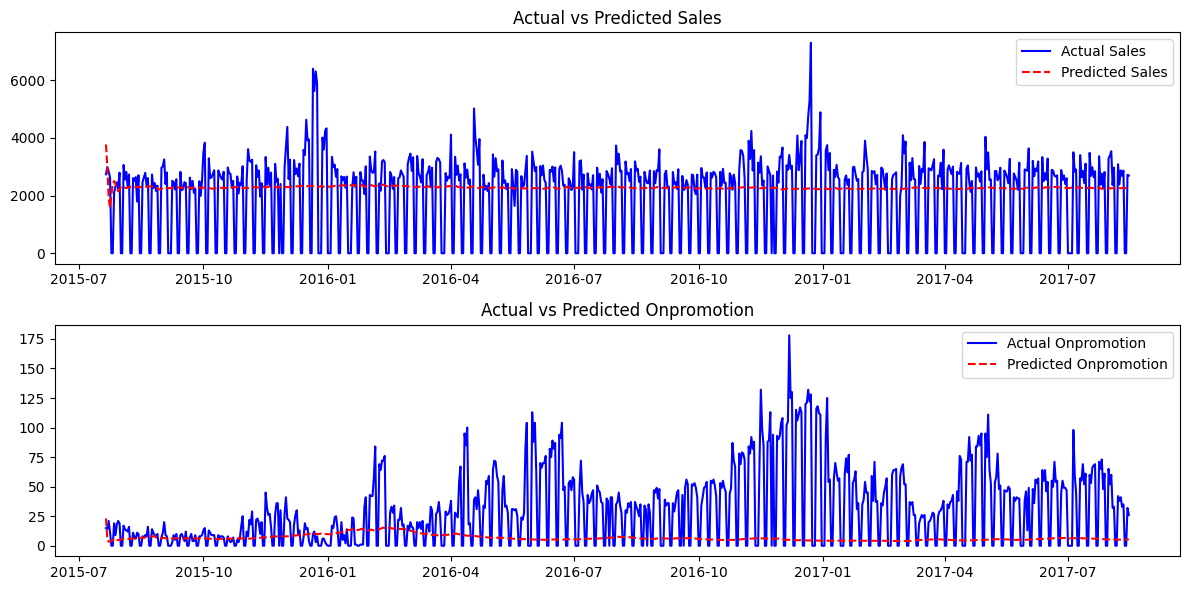

In [165]:
# Plot hasil prediksi vs actual
plt.figure(figsize=(12, 6))

# Plot Sales
plt.subplot(2, 1, 1)
plt.plot(test_endog.index, test_endog['sales'], label='Actual Sales', color='blue')
plt.plot(test_endog.index, test_preds['sales'], label='Predicted Sales', color='red', linestyle='dashed')
plt.title('Actual vs Predicted Sales')
plt.legend()

# Plot Onpromotion (sudah dalam skala asli)
plt.subplot(2, 1, 2)
plt.plot(test_endog.index, test_endog['onpromotion'], label='Actual Onpromotion', color='blue')
plt.plot(test_endog.index, test_preds['onpromotion'], label='Predicted Onpromotion', color='red', linestyle='dashed')
plt.title('Actual vs Predicted Onpromotion')
plt.legend()

plt.tight_layout()
plt.show()

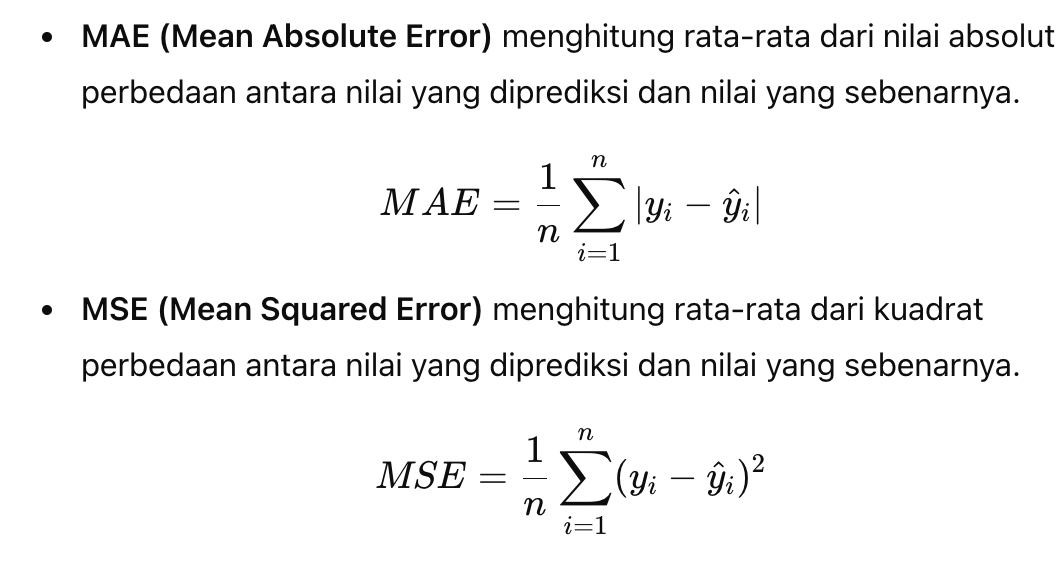

##### Modelling Using VARMAX with RMSE

In [141]:
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_squared_error
from scipy.special import inv_boxcox

# Grid search untuk parameter p dan q
p_options = range(1, 5)  # Order autoregressive
q_options = range(0, 4)  # Order moving average
lowest_error = float("inf")
best_parameters = None
optimal_model = None

# Hitung rata-rata aktual untuk normalisasi
avg_sales = test_endog['sales'].mean()
avg_promo = test_endog['onpromotion_boxcox'].mean()

# Coba semua kombinasi (p, q)
for p, q in itertools.product(p_options, q_options):
    try:
        print(f"Evaluating VARMAX({p},{q})...")

        # Train model VARMAX
        model_instance = VARMAX(train_endog, exog=train_exog, order=(p, q), trend='c')
        fitted_model = model_instance.fit(disp=False)

        # Forecast untuk data test
        predictions = fitted_model.forecast(steps=len(test_endog), exog=test_exog)

        # Kembalikan prediksi 'onpromotion' ke skala data awal
        predictions['onpromotion'] = inv_boxcox(predictions['onpromotion_boxcox'], lambda_bc) - 1  # Mengurangi 1 kembali
        test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga

        # Hitung RMSE antara prediksi dan data aktual
        rmse_sales = np.sqrt(mean_squared_error(test_endog['sales'], predictions['sales']))
        rmse_promo = np.sqrt(mean_squared_error(test_endog['onpromotion'], predictions['onpromotion']))

        # Normalisasi RMSE
        rmse_sales_norm = rmse_sales / avg_sales
        rmse_promo_norm = rmse_promo / avg_promo
        rmse_total = rmse_sales_norm + rmse_promo_norm  # Gabungkan kesalahan yang telah dinormalisasi

        print(f"VARMAX({p},{q}) - Normalized RMSE: {rmse_total:.4f}")

        # Simpan model dengan RMSE terbaik
        if rmse_total < lowest_error:
            lowest_error = rmse_total
            best_parameters = (p, q)
            optimal_model = fitted_model

    except Exception as e:
        print(f"VARMAX({p},{q}) gagal dilatih: {e}")

print(f"\nBest VARMAX order: {best_parameters} dengan Normalized RMSE: {lowest_error:.4f}")

Evaluating VARMAX(1,0)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-141-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarnin

VARMAX(1,0) - Normalized RMSE: 30.0096
Evaluating VARMAX(1,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-141-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(1,1) - Normalized RMSE: 30.1522
Evaluating VARMAX(1,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-141-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

VARMAX(1,2) - Normalized RMSE: 29.8107
Evaluating VARMAX(1,3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-141-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

VARMAX(1,3) - Normalized RMSE: 29.8487
Evaluating VARMAX(2,0)...


<ipython-input-141-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


VARMAX(2,0) - Normalized RMSE: 30.0109
Evaluating VARMAX(2,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-141-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(2,1) - Normalized RMSE: 30.0109
Evaluating VARMAX(2,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-141-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

VARMAX(2,2) - Normalized RMSE: 29.7158
Evaluating VARMAX(2,3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-141-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(2,3) - Normalized RMSE: 29.9536
Evaluating VARMAX(3,0)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-141-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model

VARMAX(3,0) - Normalized RMSE: 30.0114
Evaluating VARMAX(3,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-141-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

VARMAX(3,1) - Normalized RMSE: 30.0112
Evaluating VARMAX(3,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-141-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(3,2) - Normalized RMSE: 29.9314
Evaluating VARMAX(3,3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-141-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

VARMAX(3,3) - Normalized RMSE: 29.1763
Evaluating VARMAX(4,0)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-141-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model

VARMAX(4,0) - Normalized RMSE: 30.0083
Evaluating VARMAX(4,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-141-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

VARMAX(4,1) - Normalized RMSE: 30.0027
Evaluating VARMAX(4,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-141-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(4,2) - Normalized RMSE: 29.9033
Evaluating VARMAX(4,3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


VARMAX(4,3) - Normalized RMSE: 29.6063

Best VARMAX order: (3, 3) dengan Normalized RMSE: 29.1763


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-141-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga


In [142]:
# Gunakan model terbaik untuk prediksi
test_preds1 = optimal_model.forecast(steps=len(test_endog), exog=test_exog)

# Kembalikan prediksi 'onpromotion' ke skala data awal untuk visualisasi
test_preds1['onpromotion'] = inv_boxcox(test_preds['onpromotion_boxcox'], lambda_bc) - 1

test_preds1

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


sales  onpromotion_boxcox  onpromotion
2015-07-21  3769.277234            1.980070    23.099078
2015-07-22  2975.570578            1.380847     5.265229
2015-07-23  1885.165644            1.186018     3.479857
2015-07-24  1582.543400            1.233185     3.842796
2015-07-25  2019.619706            1.246053     3.948544
...                 ...                 ...          ...
2017-08-11  2256.043188            1.374592     5.194458
2017-08-12  2256.842797            1.374034     5.188204
2017-08-13  2260.285827            1.378894     5.243016
2017-08-14  2265.623075            1.385051     5.313390
2017-08-15  2267.664361            1.387396     5.340465

[757 rows x 3 columns]

In [62]:
# Hitung RMSE dari prediksi terbaik
final_rmse_sales = np.sqrt(mean_squared_error(test_endog['sales'], test_preds1['sales']))
final_rmse_promo = np.sqrt(mean_squared_error(test_endog['onpromotion'], test_preds1['onpromotion']))

print(f"Final RMSE Sales: {final_rmse_sales:.4f}")
print(f"Final RMSE Onpromotion: {final_rmse_promo:.4f}")

Final RMSE Sales: 1422.3214
Final RMSE Onpromotion: 40.0924


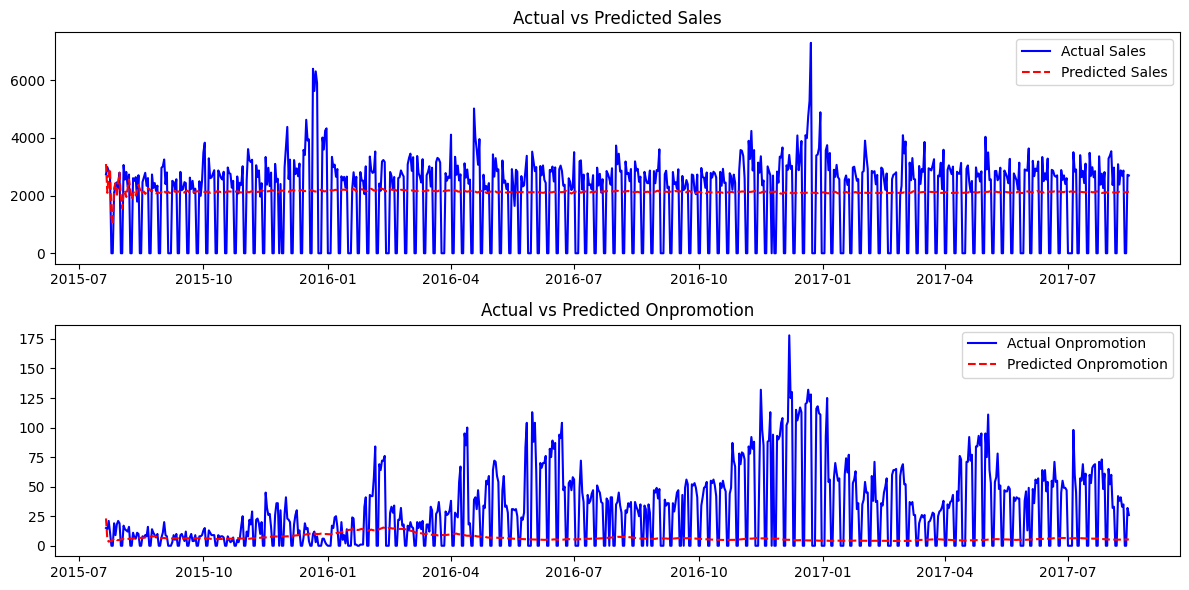

In [63]:
# Plot hasil prediksi vs actual
plt.figure(figsize=(12, 6))

# Plot Sales
plt.subplot(2, 1, 1)
plt.plot(test_endog.index, test_endog['sales'], label='Actual Sales', color='blue')
plt.plot(test_endog.index, test_preds1['sales'], label='Predicted Sales', color='red', linestyle='dashed')
plt.title('Actual vs Predicted Sales')
plt.legend()

# Plot Onpromotion (sudah dalam skala asli)
plt.subplot(2, 1, 2)
plt.plot(test_endog.index, test_endog['onpromotion'], label='Actual Onpromotion', color='blue')
plt.plot(test_endog.index, test_preds1['onpromotion'], label='Predicted Onpromotion', color='red', linestyle='dashed')
plt.title('Actual vs Predicted Onpromotion')
plt.legend()

plt.tight_layout()
plt.show()

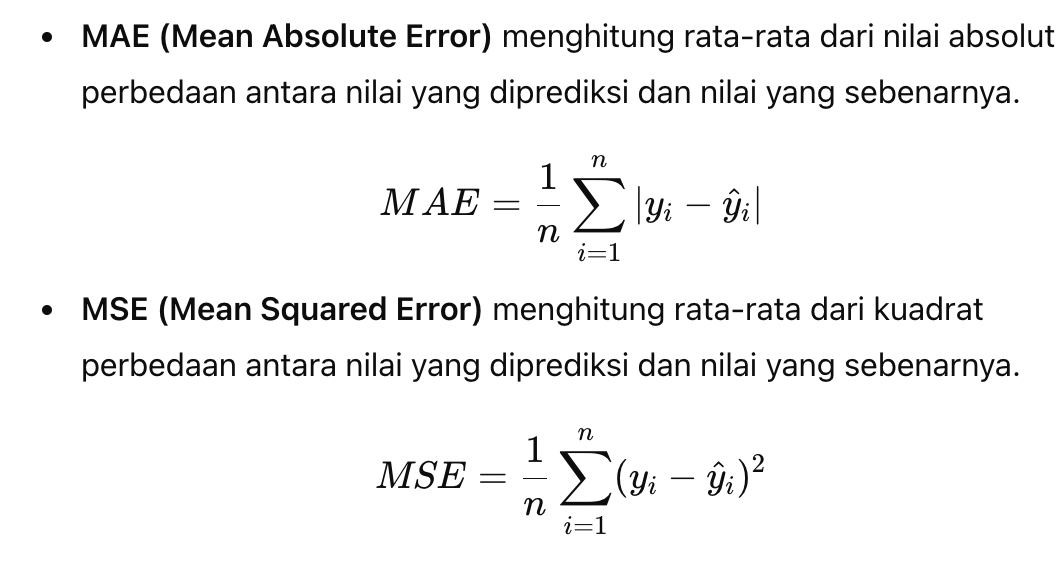

##### Modelling Using LSTM

In [216]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import time
from sklearn.metrics import mean_squared_error

# Preprocessing
scaler_endog = MinMaxScaler()
scaler_exog = MinMaxScaler()

# Pisahkan variabel endogen dan eksogen
endog = df_grocery_new[['sales', 'onpromotion']]
exog = df_grocery_new[['dcoilwtico_interpolate']]

# Pisahkan data menjadi train dan test
train_size = int(len(df_grocery) * 0.8)
train_endog, test_endog = endog.iloc[:train_size], endog.iloc[train_size:]
train_exog, test_exog = exog.iloc[:train_size], exog.iloc[train_size:]

# Scaling the data (already done earlier)
endog_scaled = scaler_endog.fit_transform(endog)
exog_scaled = scaler_exog.fit_transform(exog)

In [217]:
# Check the shape of the endog_scaled (should have 2 columns)
print(f"endog_scaled shape: {endog_scaled.shape}")

endog_scaled shape: (1687, 2)


In [218]:
# Ensure endog_scaled has 2 columns (sales and onpromotion)
print(f"endog_scaled shape: {endog_scaled.shape}")  # (1688, 2)

# Combine exogenous (exog) and endogenous (endog) features into x
x = np.concatenate([exog_scaled, endog_scaled], axis=1)

# The target variable 'y' is the endog_scaled
y = endog_scaled  # 'sales' and 'onpromotion' as the target (2 columns)

endog_scaled shape: (1687, 2)


In [219]:
def load_data(X, seq_len, train_size=0.9):
    amount_of_features = X.shape[1]
    X_mat = X
    sequence_length = seq_len + 1
    data = []

    for index in range(len(X_mat) - sequence_length):
        data.append(X_mat[index: index + sequence_length])

    data = np.array(data)
    train_split = int(round(train_size * data.shape[0]))
    train_data = data[:train_split, :]

    x_train = train_data[:, :-1]
    y_train = train_data[:, -1, 1:]  # Select only the last 2 columns (sales and onpromotion)

    x_test = data[train_split:, :-1]
    y_test = data[train_split:, -1, 1:]  # Select only the last 2 columns (sales and onpromotion)

    # Check shapes before reshaping
    print(f"x_train shape (before reshape): {x_train.shape}")
    print(f"y_train shape (before reshape): {y_train.shape}")

    # Make sure y_train and y_test have 2 columns (for 'sales' and 'onpromotion')
    assert y_train.shape[1] == 2, "y_train should have 2 columns (sales and onpromotion)"
    assert y_test.shape[1] == 2, "y_test should have 2 columns (sales and onpromotion)"

    # Reshape x_train and x_test to 3D arrays for LSTM input
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))

    return x_train, y_train, x_test, y_test

# Setting window size
window = 22
X_train, y_train, X_test, y_test = load_data(x, window)

# Print the shapes of data after loading and reshaping
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

x_train shape (before reshape): (1498, 22, 3)
y_train shape (before reshape): (1498, 2)
X_train shape: (1498, 22, 3), y_train shape: (1498, 2)
X_test shape: (166, 22, 3), y_test shape: (166, 2)


In [220]:
# LSTM Model
model = Sequential()
model.add(LSTM(units=50, input_shape=(window, X_train.shape[2])))
model.add(Dropout(0.2))

# Output layer with 2 units for 'sales' and 'onpromotion'
model.add(Dense(units=50, kernel_initializer='uniform', activation='tanh'))
model.add(Dense(units=2, kernel_initializer='uniform', activation='linear'))  # Two outputs

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
start = time.time()
history = model.fit(X_train, y_train, epochs=100, batch_size=35, validation_split=0.05, verbose=1)
print('Compilation time: ', time.time() - start)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0423 - val_loss: 0.0610
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0262 - val_loss: 0.0526
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0245 - val_loss: 0.0483
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0229 - val_loss: 0.0512
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0224 - val_loss: 0.0474
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0216 - val_loss: 0.0484
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0230 - val_loss: 0.0469
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0229 - val_loss: 0.0469
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0223 - val_loss: 0.0488
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0211 - val_loss: 0.0483
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0230 - val_loss: 0.0467
Epoch 12/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0

In [221]:
# Predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# Inverse transform to get the actual values
trainPredict = scaler_endog.inverse_transform(trainPredict)
trainY = scaler_endog.inverse_transform(y_train)
testPredict = scaler_endog.inverse_transform(testPredict)
testY = scaler_endog.inverse_transform(y_test)

# Plotting
plot_predicted_sales = testPredict[:, 0].reshape(-1, 1)
plot_predicted_onpromotion = testPredict[:, 1].reshape(-1, 1)

plot_actual_sales = testY[:, 0].reshape(-1, 1)
plot_actual_onpromotion = testY[:, 1].reshape(-1, 1)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [222]:
# Print shapes for verification
print(f"Plot actual sales shape: {plot_actual_sales.shape}")
print(f"Plot predicted sales shape: {plot_predicted_sales.shape}")

Plot actual sales shape: (166, 1)
Plot predicted sales shape: (166, 1)


In [223]:
# Calculate RMSE for both sales and onpromotion
trainScore_sales = mean_squared_error(trainY[:, 0], trainPredict[:, 0]) ** 0.5
testScore_sales = mean_squared_error(testY[:, 0], plot_predicted_sales[:, 0]) ** 0.5

trainScore_onpromotion = mean_squared_error(trainY[:, 1], trainPredict[:, 1]) ** 0.5
testScore_onpromotion = mean_squared_error(testY[:, 1], plot_predicted_onpromotion[:, 0]) ** 0.5

In [224]:
print(f'Train Score for sales: {trainScore_sales:.2f} RMSE')
print(f'Test Score for sales: {testScore_sales:.2f} RMSE')

print(f'Train Score for onpromotion: {trainScore_onpromotion:.2f} RMSE')
print(f'Test Score for onpromotion: {testScore_onpromotion:.2f} RMSE')

Train Score for sales: 738.21 RMSE
Test Score for sales: 617.96 RMSE
Train Score for onpromotion: 10.73 RMSE
Test Score for onpromotion: 16.03 RMSE


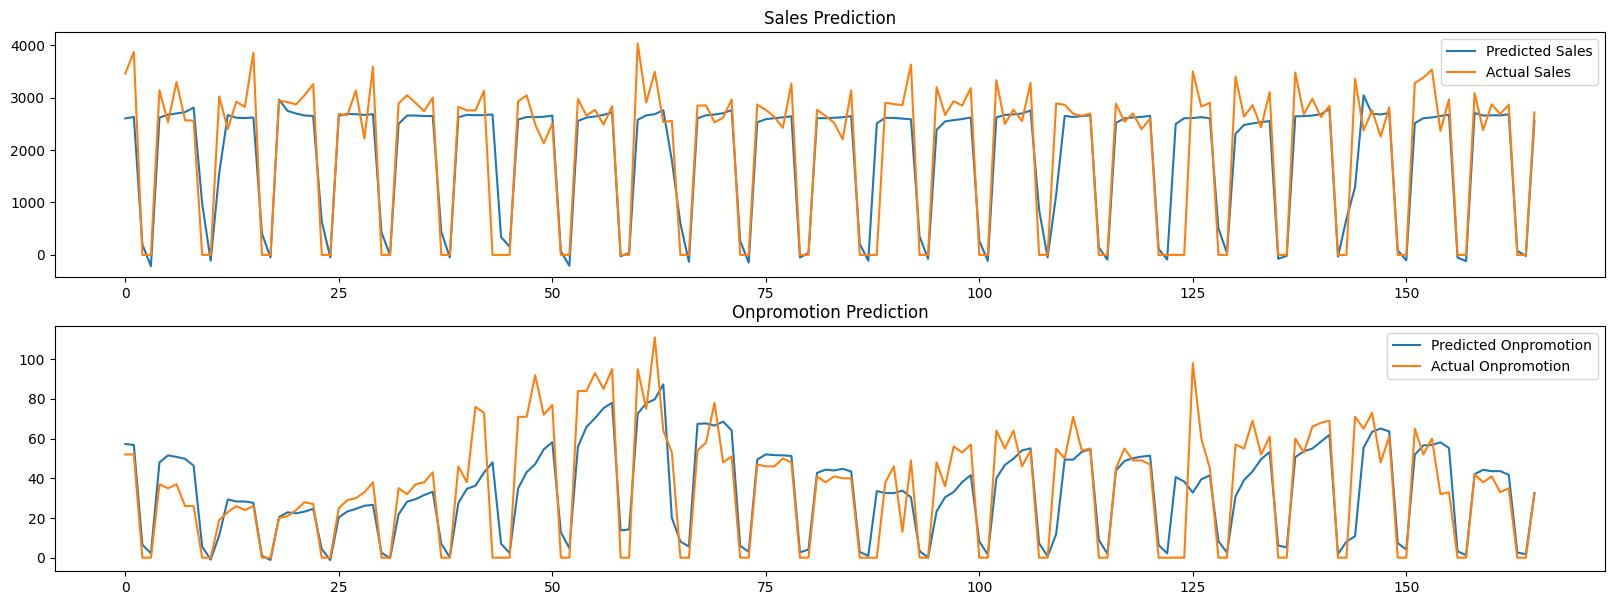

In [225]:
# Plot the results for both targets
plt.figure(figsize=(20, 7))

# Sales plot
plt.subplot(2, 1, 1)
plt.plot(pd.DataFrame(plot_predicted_sales), label='Predicted Sales')
plt.plot(pd.DataFrame(plot_actual_sales), label='Actual Sales')
plt.legend(loc='best')
plt.title('Sales Prediction')

# Onpromotion plot
plt.subplot(2, 1, 2)
plt.plot(pd.DataFrame(plot_predicted_onpromotion), label='Predicted Onpromotion')
plt.plot(pd.DataFrame(plot_actual_onpromotion), label='Actual Onpromotion')
plt.legend(loc='best')
plt.title('Onpromotion Prediction')

plt.show()

#### 3.2 BEVERAGES

In [177]:
# Filter hanya data dengan family "BEVERAGES"
df_beverage = df_store[df_store["family"] == "BEVERAGES"]
df_beverage

id  store_nbr     family   sales  onpromotion  dcoilwtico  \
date                                                                         
2013-01-02     3237          5  BEVERAGES   947.0            0       93.14   
2013-01-03     5019          5  BEVERAGES   847.0            0       92.97   
2013-01-04     6801          5  BEVERAGES   859.0            0       93.12   
2013-01-07    12147          5  BEVERAGES   575.0            0       93.20   
2013-01-08    13929          5  BEVERAGES   746.0            0       93.21   
...             ...        ...        ...     ...          ...         ...   
2017-08-09  2989869          5  BEVERAGES  1575.0            9       49.59   
2017-08-10  2991651          5  BEVERAGES  1658.0           10       48.54   
2017-08-11  2993433          5  BEVERAGES  1717.0           11       48.81   
2017-08-14  2998779          5  BEVERAGES  1771.0           10       47.59   
2017-08-15  3000561          5  BEVERAGES  1654.0           10       47.57   

            dcoilwtico_interpolate  onpromotion_diff  
date                                                  
2013-01-02                   93.14               0.0  
2013-01-03                   92.97               0.0  
2013-01-04                   93.12               0.0  
2013-01-07                   93.20               0.0  
2013-01-08                   93.21               0.0  
...                            ...               ...  
2017-08-09                   49.59               8.0  
2017-08-10                   48.54               8.0  
2017-08-11                   48.81              10.0  
2017-08-14                   47.59               9.0  
2017-08-15                   47.57               8.0  

[1163 rows x 8 columns]

In [178]:
# Reset the index of df_grocery to bring 'date' back as a column
df_beverage = df_beverage.reset_index()

df_beverage = df_beverage[['date','store_nbr','family','sales','onpromotion','dcoilwtico']]

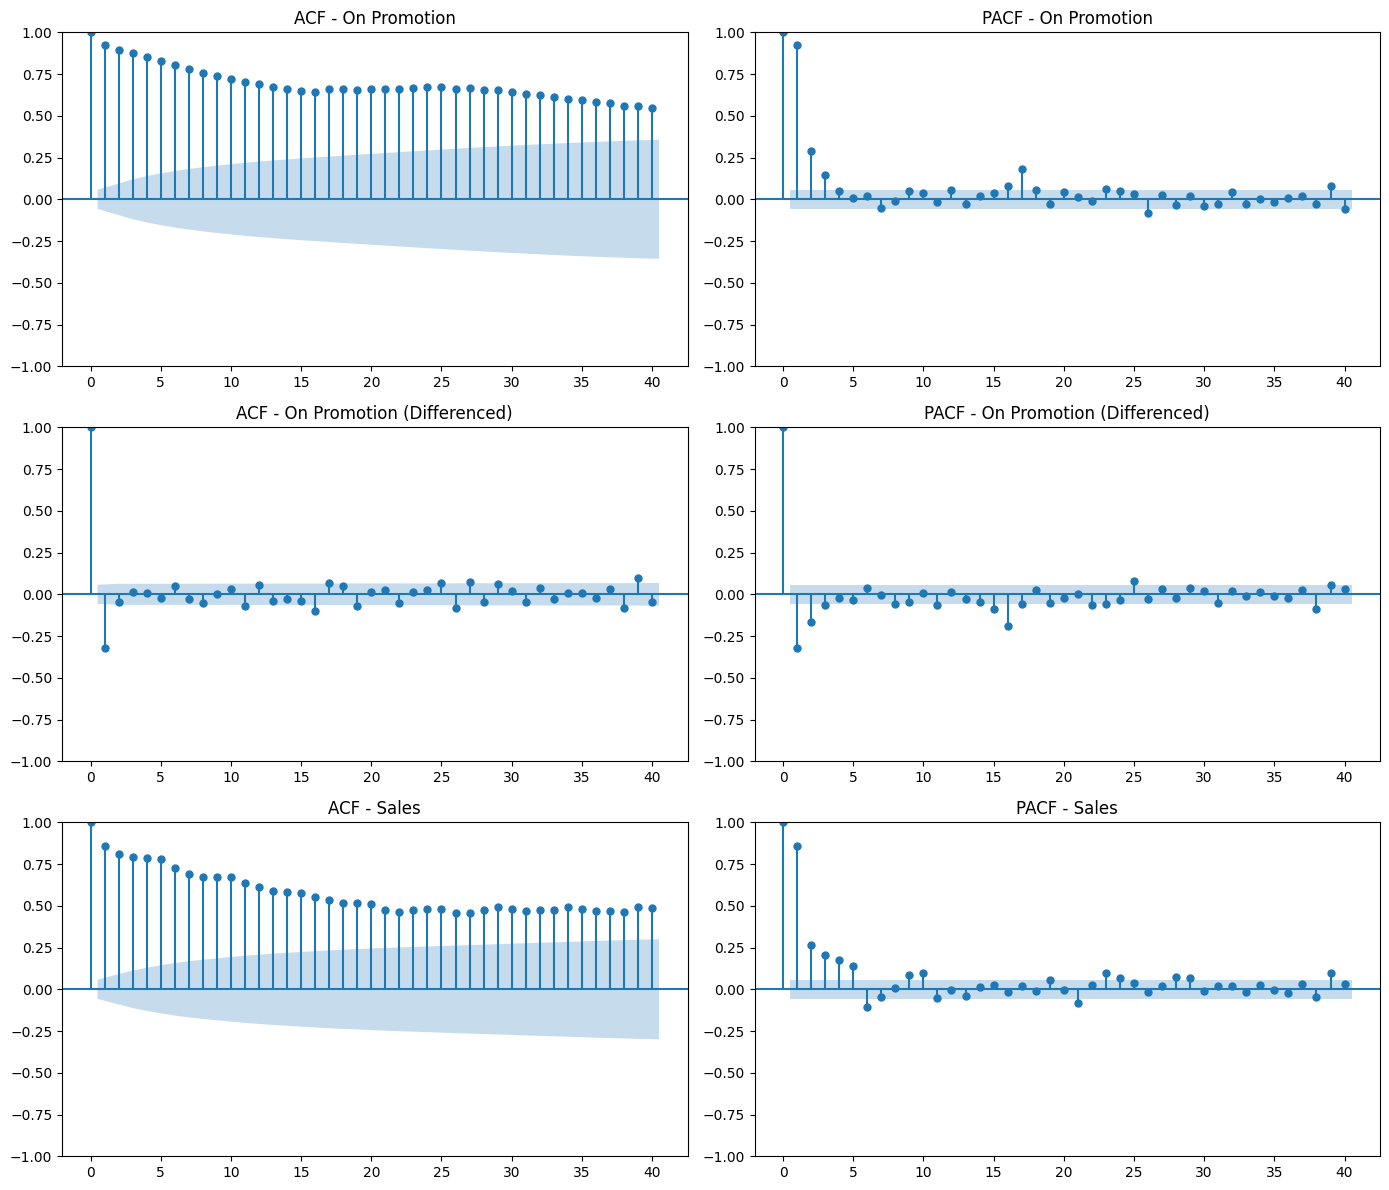

In [179]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Pastikan tanggal dalam format datetime
df_beverage['date'] = pd.to_datetime(df_beverage['date'])
df_beverage.set_index('date', inplace=True)

# Lakukan differencing untuk onpromotion
df_beverage['onpromotion_diff'] = df_beverage['onpromotion'].diff()

# Drop NaN akibat differencing
df_beverage.dropna(inplace=True)


fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# ACF & PACF On Promotion (Sebelum Differencing)
plot_acf(df_beverage['onpromotion'], lags=40, ax=axes[0, 0])
axes[0, 0].set_title("ACF - On Promotion")

plot_pacf(df_beverage['onpromotion'], lags=40, ax=axes[0, 1])
axes[0, 1].set_title("PACF - On Promotion")

# ACF & PACF On Promotion (Setelah Differencing)
plot_acf(df_beverage['onpromotion_diff'], lags=40, ax=axes[1, 0])
axes[1, 0].set_title("ACF - On Promotion (Differenced)")

plot_pacf(df_beverage['onpromotion_diff'], lags=40, ax=axes[1, 1])
axes[1, 1].set_title("PACF - On Promotion (Differenced)")

# ACF & PACF Sales
plot_acf(df_beverage['sales'], lags=40, ax=axes[2, 0])
axes[2, 0].set_title("ACF - Sales")

plot_pacf(df_beverage['sales'], lags=40, ax=axes[2, 1])
axes[2, 1].set_title("PACF - Sales")

plt.tight_layout()
plt.show()

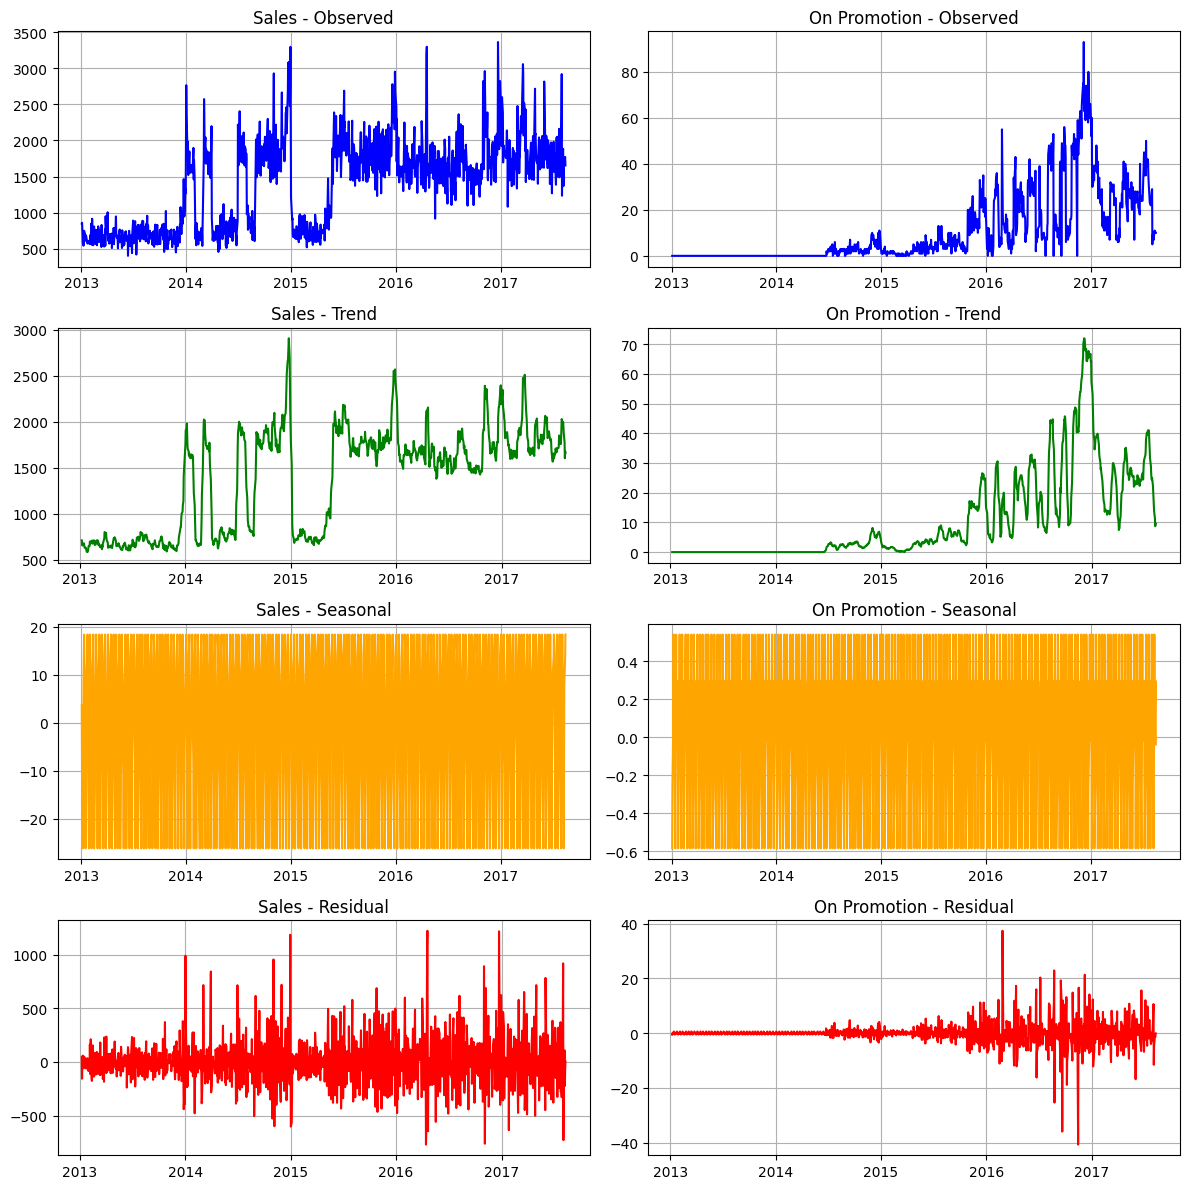

In [180]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose Sales dan On Promotion
decomp_sales = seasonal_decompose(df_beverage['sales'], model='additive', period=7)
decomp_onpromo = seasonal_decompose(df_beverage['onpromotion'], model='additive', period=7)

fig, axes = plt.subplots(4, 2, figsize=(12, 12))

# Warna untuk membedakan setiap plot
colors = ['blue', 'green', 'orange', 'red']

# Sales Decomposition
axes[0, 0].plot(decomp_sales.observed, color=colors[0])
axes[0, 0].set_title("Sales - Observed")
axes[1, 0].plot(decomp_sales.trend, color=colors[1])
axes[1, 0].set_title("Sales - Trend")
axes[2, 0].plot(decomp_sales.seasonal, color=colors[2])
axes[2, 0].set_title("Sales - Seasonal")
axes[3, 0].plot(decomp_sales.resid, color=colors[3])
axes[3, 0].set_title("Sales - Residual")

# On Promotion Decomposition
axes[0, 1].plot(decomp_onpromo.observed, color=colors[0])
axes[0, 1].set_title("On Promotion - Observed")
axes[1, 1].plot(decomp_onpromo.trend, color=colors[1])
axes[1, 1].set_title("On Promotion - Trend")
axes[2, 1].plot(decomp_onpromo.seasonal, color=colors[2])
axes[2, 1].set_title("On Promotion - Seasonal")
axes[3, 1].plot(decomp_onpromo.resid, color=colors[3])
axes[3, 1].set_title("On Promotion - Residual")

# Tambahkan grid untuk memperjelas pola
for ax in axes.flat:
    ax.grid(True)

plt.tight_layout()
plt.show()

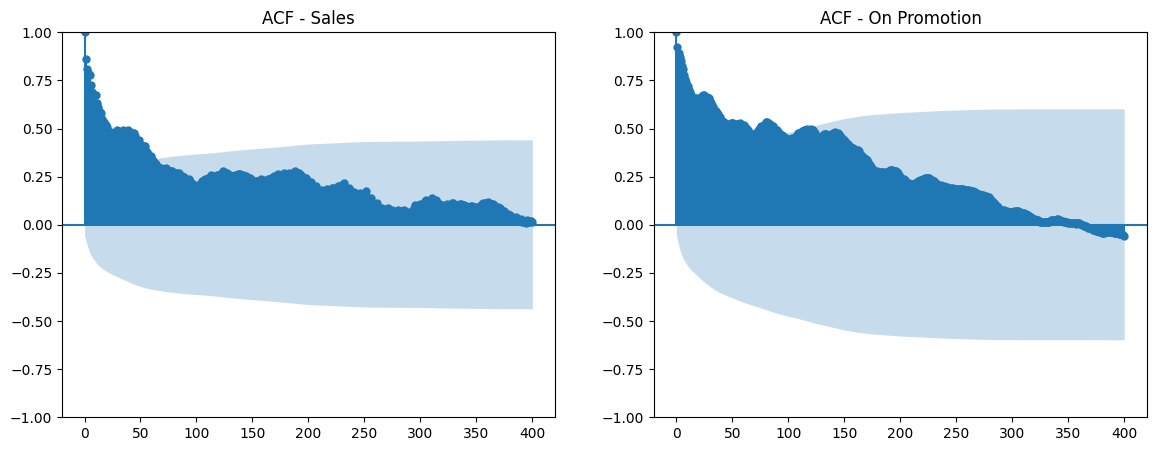

In [181]:
from statsmodels.graphics.tsaplots import plot_acf

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ACF Sales
plot_acf(df_beverage['sales'], lags=400, ax=axes[0])
axes[0].set_title("ACF - Sales")

# ACF On Promotion
plot_acf(df_beverage['onpromotion'], lags=400, ax=axes[1])
axes[1].set_title("ACF - On Promotion")

plt.show()

In [182]:
# Filter hanya data dengan family "BEVERAGES"
df_beverage = df_store[df_store["family"] == "BEVERAGES"]
df_beverage

id  store_nbr     family   sales  onpromotion  dcoilwtico  \
date                                                                         
2013-01-02     3237          5  BEVERAGES   947.0            0       93.14   
2013-01-03     5019          5  BEVERAGES   847.0            0       92.97   
2013-01-04     6801          5  BEVERAGES   859.0            0       93.12   
2013-01-07    12147          5  BEVERAGES   575.0            0       93.20   
2013-01-08    13929          5  BEVERAGES   746.0            0       93.21   
...             ...        ...        ...     ...          ...         ...   
2017-08-09  2989869          5  BEVERAGES  1575.0            9       49.59   
2017-08-10  2991651          5  BEVERAGES  1658.0           10       48.54   
2017-08-11  2993433          5  BEVERAGES  1717.0           11       48.81   
2017-08-14  2998779          5  BEVERAGES  1771.0           10       47.59   
2017-08-15  3000561          5  BEVERAGES  1654.0           10       47.57   

            dcoilwtico_interpolate  onpromotion_diff  
date                                                  
2013-01-02                   93.14               0.0  
2013-01-03                   92.97               0.0  
2013-01-04                   93.12               0.0  
2013-01-07                   93.20               0.0  
2013-01-08                   93.21               0.0  
...                            ...               ...  
2017-08-09                   49.59               8.0  
2017-08-10                   48.54               8.0  
2017-08-11                   48.81              10.0  
2017-08-14                   47.59               9.0  
2017-08-15                   47.57               8.0  

[1163 rows x 8 columns]

In [183]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf

# Hitung ACF untuk sales
acf_values = acf(df_beverage['sales'], nlags=1100, fft=False)  # Gunakan fft=False untuk akurasi lebih baik

# Buat DataFrame baru untuk hasil ACF tanpa mengubah df_beverage
acf_df = pd.DataFrame({'Lag': np.arange(len(acf_values)), 'ACF_Sales': acf_values})

# Tentukan jumlah observasi
n = len(df_beverage['sales'])

# Hitung batas konfidensi 95%
conf_interval = 1.96 / np.sqrt(n)

# Tambahkan kolom untuk batas bawah dan atas
acf_df['Lower_Bound'] = -conf_interval
acf_df['Upper_Bound'] = conf_interval

# Filter hanya untuk lag tahunan (365, 730, 1095)
acf_yearly = acf_df[acf_df['Lag'].isin([365, 730, 1095])]

# Evaluasi apakah nilai ACF signifikan (di luar batas konfidensi)
acf_yearly['Significant'] = (acf_yearly['ACF_Sales'] > acf_yearly['Upper_Bound']) | (acf_yearly['ACF_Sales'] < acf_yearly['Lower_Bound'])

# Tampilkan hasil
acf_yearly

<ipython-input-183-2f035db22152>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acf_yearly['Significant'] = (acf_yearly['ACF_Sales'] > acf_yearly['Upper_Bound']) | (acf_yearly['ACF_Sales'] < acf_yearly['Lower_Bound'])


Lag  ACF_Sales  Lower_Bound  Upper_Bound  Significant
365    365   0.111020    -0.057473     0.057473         True
730    730  -0.185815    -0.057473     0.057473         True
1095  1095  -0.047608    -0.057473     0.057473        False

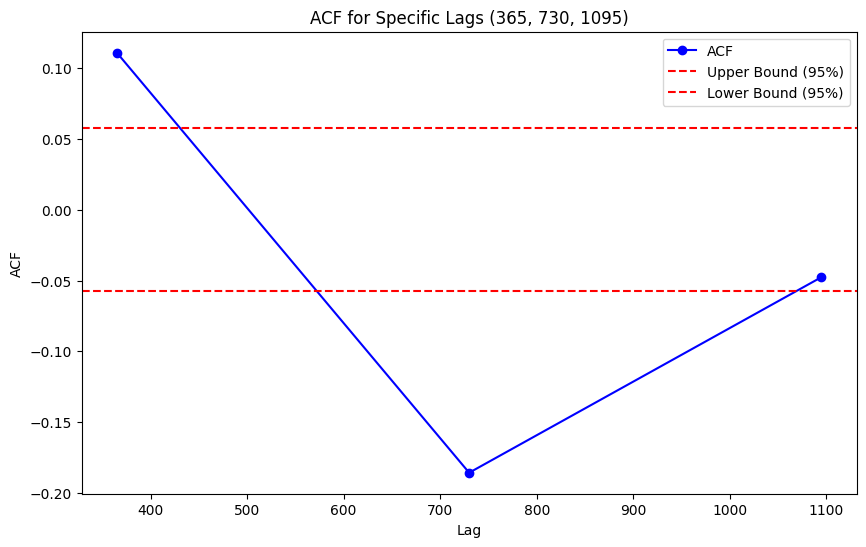

In [184]:
# Filter ACF hanya untuk lag 365, 730, 1095
acf_yearly = acf_df[acf_df['Lag'].isin([365, 730, 1095])]

# Plot ACF untuk lag tersebut
plt.figure(figsize=(10, 6))
plt.plot(acf_yearly['Lag'], acf_yearly['ACF_Sales'], marker='o', color='b', label='ACF')

# Tambahkan garis batas konfidensi
plt.axhline(y=1.96/np.sqrt(n), color='r', linestyle='--', label='Upper Bound (95%)')
plt.axhline(y=-1.96/np.sqrt(n), color='r', linestyle='--', label='Lower Bound (95%)')

# Menambahkan label dan judul
plt.title('ACF for Specific Lags (365, 730, 1095)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.legend()

# Tampilkan chart
plt.show()

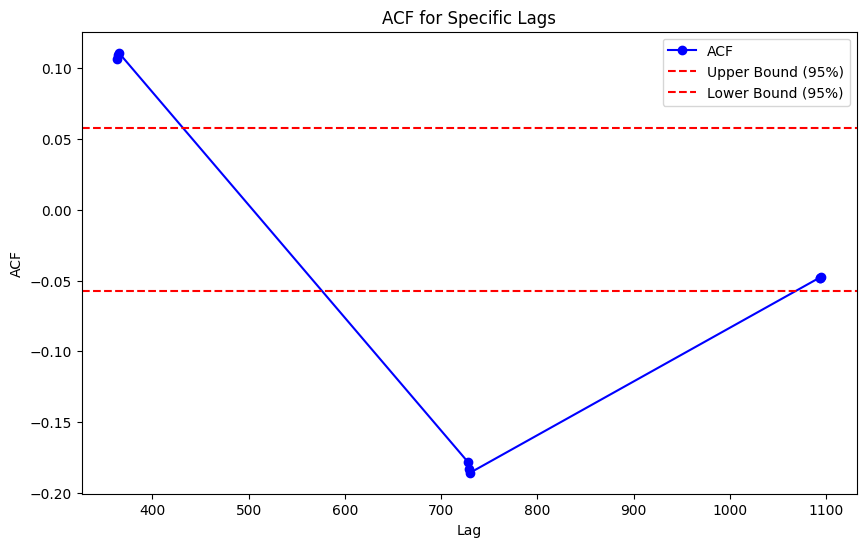

In [185]:
# Filter ACF hanya untuk lag tertentu
acf_somelags = acf_df[acf_df['Lag'].isin([363, 364, 365, 728, 729, 730, 1093, 1094, 1095])]

# Plot ACF untuk lag tersebut
plt.figure(figsize=(10, 6))
plt.plot(acf_somelags['Lag'], acf_somelags['ACF_Sales'], marker='o', color='b', label='ACF')

# Tambahkan garis batas konfidensi
plt.axhline(y=1.96/np.sqrt(n), color='r', linestyle='--', label='Upper Bound (95%)')
plt.axhline(y=-1.96/np.sqrt(n), color='r', linestyle='--', label='Lower Bound (95%)')

# Menambahkan label dan judul
plt.title('ACF for Specific Lags')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.legend()

# Tampilkan chart
plt.show()

In [186]:
df_beverage

id  store_nbr     family   sales  onpromotion  dcoilwtico  \
date                                                                         
2013-01-02     3237          5  BEVERAGES   947.0            0       93.14   
2013-01-03     5019          5  BEVERAGES   847.0            0       92.97   
2013-01-04     6801          5  BEVERAGES   859.0            0       93.12   
2013-01-07    12147          5  BEVERAGES   575.0            0       93.20   
2013-01-08    13929          5  BEVERAGES   746.0            0       93.21   
...             ...        ...        ...     ...          ...         ...   
2017-08-09  2989869          5  BEVERAGES  1575.0            9       49.59   
2017-08-10  2991651          5  BEVERAGES  1658.0           10       48.54   
2017-08-11  2993433          5  BEVERAGES  1717.0           11       48.81   
2017-08-14  2998779          5  BEVERAGES  1771.0           10       47.59   
2017-08-15  3000561          5  BEVERAGES  1654.0           10       47.57   

            dcoilwtico_interpolate  onpromotion_diff  
date                                                  
2013-01-02                   93.14               0.0  
2013-01-03                   92.97               0.0  
2013-01-04                   93.12               0.0  
2013-01-07                   93.20               0.0  
2013-01-08                   93.21               0.0  
...                            ...               ...  
2017-08-09                   49.59               8.0  
2017-08-10                   48.54               8.0  
2017-08-11                   48.81              10.0  
2017-08-14                   47.59               9.0  
2017-08-15                   47.57               8.0  

[1163 rows x 8 columns]

In [187]:
from scipy.stats import boxcox

# Reset the index to bring back 'date' as a column
df_beverage = df_beverage.reset_index()

df_beverage_new = df_beverage[['date','store_nbr','family','sales','onpromotion','dcoilwtico']]

In [188]:
# Filter hanya data dengan family "BEVERAGES"
df_beverage_new = df_beverage[df_beverage["family"] == "BEVERAGES"]

# This line defines the variable full_date_range
full_date_range = pd.date_range(start=df_beverage_new['date'].min(), end=df_beverage_new['date'].max(), freq='D')

# Set index ke 'date' dan reindex dengan full_date_range
df_beverage_new = df_beverage_new.set_index('date').reindex(full_date_range).reset_index()

# Pastikan kolom tetap bernama 'date'
df_beverage_new.rename(columns={'index': 'date'}, inplace=True)

# Isi sales dan onpromotion dengan 0, tetapi dcoilwtico tetap NaN
df_beverage_new[['sales', 'onpromotion']] = df_beverage_new[['sales', 'onpromotion']].fillna(0)

# Isi missing store_nbr dengan 5 dan family dengan "BEVERAGES"
df_beverage_new['store_nbr'] = df_beverage_new['store_nbr'].fillna(5).astype(int)
df_beverage_new['family'] = df_beverage_new['family'].fillna("BEVERAGES")

In [189]:
df_beverage_new

date         id  store_nbr     family   sales  onpromotion  \
0    2013-01-02     3237.0          5  BEVERAGES   947.0          0.0   
1    2013-01-03     5019.0          5  BEVERAGES   847.0          0.0   
2    2013-01-04     6801.0          5  BEVERAGES   859.0          0.0   
3    2013-01-05        NaN          5  BEVERAGES     0.0          0.0   
4    2013-01-06        NaN          5  BEVERAGES     0.0          0.0   
...         ...        ...        ...        ...     ...          ...   
1682 2017-08-11  2993433.0          5  BEVERAGES  1717.0         11.0   
1683 2017-08-12        NaN          5  BEVERAGES     0.0          0.0   
1684 2017-08-13        NaN          5  BEVERAGES     0.0          0.0   
1685 2017-08-14  2998779.0          5  BEVERAGES  1771.0         10.0   
1686 2017-08-15  3000561.0          5  BEVERAGES  1654.0         10.0   

      dcoilwtico  dcoilwtico_interpolate  onpromotion_diff  
0          93.14                   93.14               0.0  
1          92.97                   92.97               0.0  
2          93.12                   93.12               0.0  
3            NaN                     NaN               NaN  
4            NaN                     NaN               NaN  
...          ...                     ...               ...  
1682       48.81                   48.81              10.0  
1683         NaN                     NaN               NaN  
1684         NaN                     NaN               NaN  
1685       47.59                   47.59               9.0  
1686       47.57                   47.57               8.0  

[1687 rows x 9 columns]

In [190]:
df_beverage_new['onpromotion_boxcox'], lambda_bc = boxcox(df_beverage_new['onpromotion'] + 1)
df_beverage_new

date         id  store_nbr     family   sales  onpromotion  \
0    2013-01-02     3237.0          5  BEVERAGES   947.0          0.0   
1    2013-01-03     5019.0          5  BEVERAGES   847.0          0.0   
2    2013-01-04     6801.0          5  BEVERAGES   859.0          0.0   
3    2013-01-05        NaN          5  BEVERAGES     0.0          0.0   
4    2013-01-06        NaN          5  BEVERAGES     0.0          0.0   
...         ...        ...        ...        ...     ...          ...   
1682 2017-08-11  2993433.0          5  BEVERAGES  1717.0         11.0   
1683 2017-08-12        NaN          5  BEVERAGES     0.0          0.0   
1684 2017-08-13        NaN          5  BEVERAGES     0.0          0.0   
1685 2017-08-14  2998779.0          5  BEVERAGES  1771.0         10.0   
1686 2017-08-15  3000561.0          5  BEVERAGES  1654.0         10.0   

      dcoilwtico  dcoilwtico_interpolate  onpromotion_diff  onpromotion_boxcox  
0          93.14                   93.14               0.0            0.000000  
1          92.97                   92.97               0.0            0.000000  
2          93.12                   93.12               0.0            0.000000  
3            NaN                     NaN               NaN            0.000000  
4            NaN                     NaN               NaN            0.000000  
...          ...                     ...               ...                 ...  
1682       48.81                   48.81              10.0            1.324702  
1683         NaN                     NaN               NaN            0.000000  
1684         NaN                     NaN               NaN            0.000000  
1685       47.59                   47.59               9.0            1.303232  
1686       47.57                   47.57               8.0            1.303232  

[1687 rows x 10 columns]

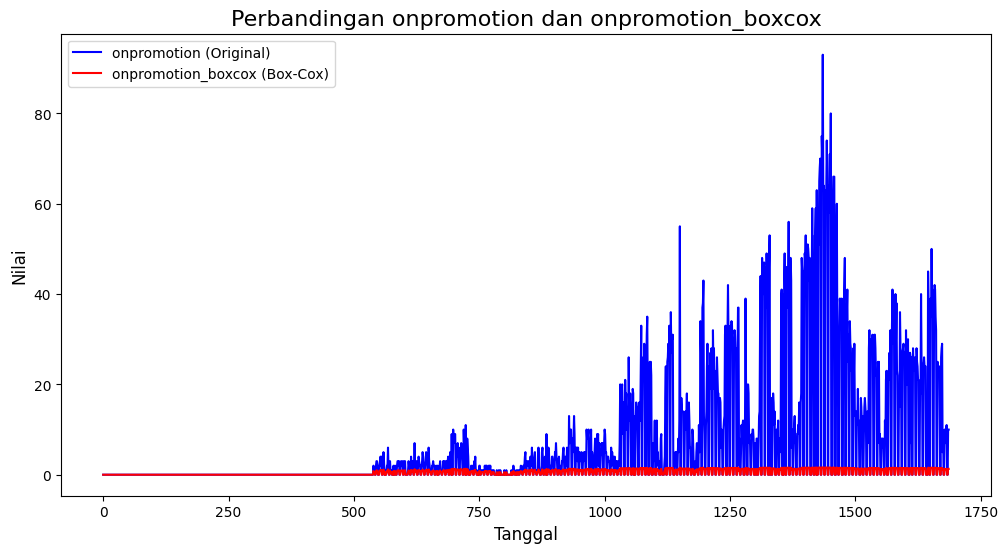

In [191]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot 'onpromotion' (data asli)
plt.plot(df_beverage_new.index, df_beverage_new['onpromotion'], label='onpromotion (Original)', color='blue')

# Plot 'onpromotion_boxcox' (setelah Box-Cox)
plt.plot(df_beverage_new.index, df_beverage_new['onpromotion_boxcox'], label='onpromotion_boxcox (Box-Cox)', color='red')

# Menambahkan label dan judul
plt.title('Perbandingan onpromotion dan onpromotion_boxcox', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Nilai', fontsize=12)

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

In [192]:
df_beverage_new['dcoilwtico_interpolate'] = (
    df_beverage_new['dcoilwtico']
    .interpolate(method='polynomial', order=2)
    .fillna(method='bfill')  # Mengisi NaN awal dengan nilai pertama yang valid
)

<ipython-input-192-87972d672abe>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='bfill')  # Mengisi NaN awal dengan nilai pertama yang valid


In [193]:
df_beverage_new

date         id  store_nbr     family   sales  onpromotion  \
0    2013-01-02     3237.0          5  BEVERAGES   947.0          0.0   
1    2013-01-03     5019.0          5  BEVERAGES   847.0          0.0   
2    2013-01-04     6801.0          5  BEVERAGES   859.0          0.0   
3    2013-01-05        NaN          5  BEVERAGES     0.0          0.0   
4    2013-01-06        NaN          5  BEVERAGES     0.0          0.0   
...         ...        ...        ...        ...     ...          ...   
1682 2017-08-11  2993433.0          5  BEVERAGES  1717.0         11.0   
1683 2017-08-12        NaN          5  BEVERAGES     0.0          0.0   
1684 2017-08-13        NaN          5  BEVERAGES     0.0          0.0   
1685 2017-08-14  2998779.0          5  BEVERAGES  1771.0         10.0   
1686 2017-08-15  3000561.0          5  BEVERAGES  1654.0         10.0   

      dcoilwtico  dcoilwtico_interpolate  onpromotion_diff  onpromotion_boxcox  
0          93.14               93.140000               0.0            0.000000  
1          92.97               92.970000               0.0            0.000000  
2          93.12               93.120000               0.0            0.000000  
3            NaN               93.205338               NaN            0.000000  
4            NaN               93.185272               NaN            0.000000  
...          ...                     ...               ...                 ...  
1682       48.81               48.810000              10.0            1.324702  
1683         NaN               48.717426               NaN            0.000000  
1684         NaN               48.020802               NaN            0.000000  
1685       47.59               47.590000               9.0            1.303232  
1686       47.57               47.570000               8.0            1.303232  

[1687 rows x 10 columns]

##### Modelling Using VARMAX with MAE

In [194]:
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_absolute_error

# Since 'date' is likely the index, reset it to a column
df_beverage_new = df_beverage_new.reset_index()

# Pastikan kolom tanggal dalam format datetime
df_beverage_new['date'] = pd.to_datetime(df_beverage_new['date'])

# Set kolom tanggal sebagai indeks
df_beverage_new.set_index('date', inplace=True)

# Pisahkan variabel endogen dan eksogen
endog = df_beverage_new[['sales', 'onpromotion_boxcox']]
exog = df_beverage_new[['dcoilwtico_interpolate']]

# Pisahkan data menjadi train dan test
train_size = int(len(df_beverage) * 0.8)
train_endog, test_endog = endog.iloc[:train_size], endog.iloc[train_size:]
train_exog, test_exog = exog.iloc[:train_size], exog.iloc[train_size:]

In [195]:
train_endog

sales  onpromotion_boxcox
date                                  
2013-01-02   947.0            0.000000
2013-01-03   847.0            0.000000
2013-01-04   859.0            0.000000
2013-01-05     0.0            0.000000
2013-01-06     0.0            0.000000
...            ...                 ...
2015-07-16  2084.0            1.172720
2015-07-17  2024.0            0.815172
2015-07-18     0.0            0.000000
2015-07-19     0.0            0.000000
2015-07-20  1986.0            1.360207

[930 rows x 2 columns]

In [196]:
test_endog

sales  onpromotion_boxcox
date                                  
2015-07-21  1873.0            1.214855
2015-07-22  2264.0            1.214855
2015-07-23  1819.0            1.303232
2015-07-24  1705.0            1.303232
2015-07-25     0.0            0.000000
...            ...                 ...
2017-08-11  1717.0            1.324702
2017-08-12     0.0            0.000000
2017-08-13     0.0            0.000000
2017-08-14  1771.0            1.303232
2017-08-15  1654.0            1.303232

[757 rows x 2 columns]

In [197]:
train_exog

dcoilwtico_interpolate
date                              
2013-01-02               93.140000
2013-01-03               92.970000
2013-01-04               93.120000
2013-01-05               93.205338
2013-01-06               93.185272
...                            ...
2015-07-16               50.900000
2015-07-17               50.880000
2015-07-18               50.564099
2015-07-19               50.009048
2015-07-20               50.110000

[930 rows x 1 columns]

In [198]:
test_endog

sales  onpromotion_boxcox
date                                  
2015-07-21  1873.0            1.214855
2015-07-22  2264.0            1.214855
2015-07-23  1819.0            1.303232
2015-07-24  1705.0            1.303232
2015-07-25     0.0            0.000000
...            ...                 ...
2017-08-11  1717.0            1.324702
2017-08-12     0.0            0.000000
2017-08-13     0.0            0.000000
2017-08-14  1771.0            1.303232
2017-08-15  1654.0            1.303232

[757 rows x 2 columns]

In [199]:
import itertools
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_absolute_error
from scipy.special import inv_boxcox  # Perbaiki impor di sini
from scipy.stats import boxcox

# Grid search untuk parameter p dan q
p_values = range(1, 5)  # Order autoregressive
q_values = range(0, 4)  # Order moving average
best_score = float("inf")
best_cfg = None
best_model = None

# Hitung rata-rata aktual untuk normalisasi
mean_sales = test_endog['sales'].mean()
mean_promo = test_endog['onpromotion_boxcox'].mean()

# Coba semua kombinasi (p, q)
for p, q in itertools.product(p_values, q_values):
    try:
        print(f"Evaluating VARMAX({p},{q})...")

        # Train model VARMAX
        model = VARMAX(train_endog, exog=train_exog, order=(p, q), trend='c')
        model_fit = model.fit(disp=False)

        # Forecast untuk data test
        preds = model_fit.forecast(steps=len(test_endog), exog=test_exog)

        # Kembalikan prediksi 'onpromotion' ke skala data awal
        preds['onpromotion'] = inv_boxcox(preds['onpromotion_boxcox'], lambda_bc) - 1  # Mengurangi 1 kembali
        test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga

        # Hitung MAE antara prediksi dan data aktual
        mae_sales = mean_absolute_error(test_endog['sales'], preds['sales'])
        mae_promo = mean_absolute_error(test_endog['onpromotion'], preds['onpromotion'])

        # Normalisasi MAE
        mae_sales_norm = mae_sales / mean_sales
        mae_promo_norm = mae_promo / mean_promo
        mae_normalized = mae_sales_norm + mae_promo_norm  # Gabungkan kesalahan yang telah dinormalisasi

        print(f"VARMAX({p},{q}) - Normalized MAE: {mae_normalized:.4f}")

        # Simpan model dengan MAE terbaik
        if mae_normalized < best_score:
            best_score = mae_normalized
            best_cfg = (p, q)
            best_model = model_fit

    except Exception as e:
        print(f"VARMAX({p},{q}) gagal dilatih: {e}")

print(f"\nBest VARMAX order: {best_cfg} dengan Normalized MAE: {best_score:.4f}")

Evaluating VARMAX(1,0)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-199-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is n

VARMAX(1,0) - Normalized MAE: 16.8770
Evaluating VARMAX(1,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-199-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

VARMAX(1,1) - Normalized MAE: 16.8756
Evaluating VARMAX(1,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-199-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(1,2) - Normalized MAE: 16.8767
Evaluating VARMAX(1,3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-199-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(1,3) - Normalized MAE: 16.8760
Evaluating VARMAX(2,0)...


<ipython-input-199-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


VARMAX(2,0) - Normalized MAE: 16.8755
Evaluating VARMAX(2,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-199-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

VARMAX(2,1) - Normalized MAE: 16.8753
Evaluating VARMAX(2,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-199-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(2,2) - Normalized MAE: 16.8759
Evaluating VARMAX(2,3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-199-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(2,3) - Normalized MAE: 16.8765
Evaluating VARMAX(3,0)...


<ipython-input-199-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


VARMAX(3,0) - Normalized MAE: 16.8769
Evaluating VARMAX(3,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-199-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(3,1) - Normalized MAE: 16.8774
Evaluating VARMAX(3,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-199-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(3,2) - Normalized MAE: 16.8776
Evaluating VARMAX(3,3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-199-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(3,3) - Normalized MAE: 16.8772
Evaluating VARMAX(4,0)...


<ipython-input-199-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


VARMAX(4,0) - Normalized MAE: 16.8779
Evaluating VARMAX(4,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-199-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(4,1) - Normalized MAE: 16.8783
Evaluating VARMAX(4,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-199-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(4,2) - Normalized MAE: 16.8786
Evaluating VARMAX(4,3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


VARMAX(4,3) - Normalized MAE: 16.7282

Best VARMAX order: (4, 3) dengan Normalized MAE: 16.7282


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-199-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga


In [200]:
# Gunakan model terbaik untuk prediksi
test_preds = best_model.forecast(steps=len(test_endog), exog=test_exog)

# Kembalikan prediksi 'onpromotion' ke skala data awal untuk visualisasi
test_preds['onpromotion'] = inv_boxcox(test_preds['onpromotion_boxcox'], lambda_bc) - 1

test_preds

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


sales  onpromotion_boxcox  onpromotion
2015-07-21  1667.681346            1.069599     4.241767
2015-07-22   985.003026            0.595968     1.073359
2015-07-23   865.641563            0.494188     0.787910
2015-07-24  1008.884821            0.697256     1.435676
2015-07-25  1047.516523            0.724095     1.548525
...                 ...                 ...          ...
2017-08-11   977.963654            0.634956     1.202111
2017-08-12   978.159622            0.635231     1.203062
2017-08-13   979.152686            0.637361     1.210463
2017-08-14   980.780457            0.640137     1.220162
2017-08-15   981.754443            0.641587     1.225256

[757 rows x 3 columns]

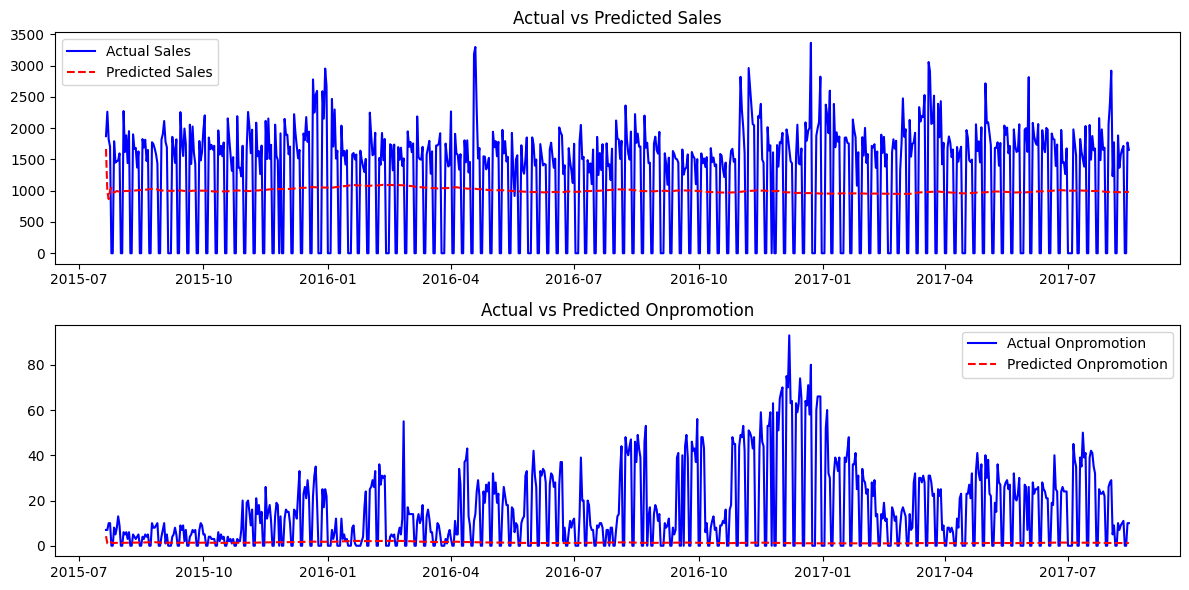

In [201]:

# Plot hasil prediksi vs actual
plt.figure(figsize=(12, 6))

# Plot Sales
plt.subplot(2, 1, 1)
plt.plot(test_endog.index, test_endog['sales'], label='Actual Sales', color='blue')
plt.plot(test_endog.index, test_preds['sales'], label='Predicted Sales', color='red', linestyle='dashed')
plt.title('Actual vs Predicted Sales')
plt.legend()

# Plot Onpromotion (sudah dalam skala asli)
plt.subplot(2, 1, 2)
plt.plot(test_endog.index, test_endog['onpromotion'], label='Actual Onpromotion', color='blue')
plt.plot(test_endog.index, test_preds['onpromotion'], label='Predicted Onpromotion', color='red', linestyle='dashed')
plt.title('Actual vs Predicted Onpromotion')
plt.legend()

plt.tight_layout()
plt.show()

##### Modelling Using VARMAX with RMSE

In [202]:
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_squared_error
from scipy.special import inv_boxcox

# Grid search untuk parameter p dan q
p_options = range(1, 5)  # Order autoregressive
q_options = range(0, 4)  # Order moving average
lowest_error = float("inf")
best_parameters = None
optimal_model = None

# Hitung rata-rata aktual untuk normalisasi
avg_sales = test_endog['sales'].mean()
avg_promo = test_endog['onpromotion_boxcox'].mean()

# Coba semua kombinasi (p, q)
for p, q in itertools.product(p_options, q_options):
    try:
        print(f"Evaluating VARMAX({p},{q})...")

        # Train model VARMAX
        model_instance = VARMAX(train_endog, exog=train_exog, order=(p, q), trend='c')
        fitted_model = model_instance.fit(disp=False)

        # Forecast untuk data test
        predictions = fitted_model.forecast(steps=len(test_endog), exog=test_exog)

        # Kembalikan prediksi 'onpromotion' ke skala data awal
        predictions['onpromotion'] = inv_boxcox(predictions['onpromotion_boxcox'], lambda_bc) - 1  # Mengurangi 1 kembali
        test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga

        # Hitung RMSE antara prediksi dan data aktual
        rmse_sales = np.sqrt(mean_squared_error(test_endog['sales'], predictions['sales']))
        rmse_promo = np.sqrt(mean_squared_error(test_endog['onpromotion'], predictions['onpromotion']))

        # Normalisasi RMSE
        rmse_sales_norm = rmse_sales / avg_sales
        rmse_promo_norm = rmse_promo / avg_promo
        rmse_total = rmse_sales_norm + rmse_promo_norm  # Gabungkan kesalahan yang telah dinormalisasi

        print(f"VARMAX({p},{q}) - Normalized RMSE: {rmse_total:.4f}")

        # Simpan model dengan RMSE terbaik
        if rmse_total < lowest_error:
            lowest_error = rmse_total
            best_parameters = (p, q)
            optimal_model = fitted_model

    except Exception as e:
        print(f"VARMAX({p},{q}) gagal dilatih: {e}")

print(f"\nBest VARMAX order: {best_parameters} dengan Normalized RMSE: {lowest_error:.4f}")

Evaluating VARMAX(1,0)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-202-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is n

VARMAX(1,0) - Normalized RMSE: 25.0468
Evaluating VARMAX(1,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-202-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

VARMAX(1,1) - Normalized RMSE: 25.0465
Evaluating VARMAX(1,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-202-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(1,2) - Normalized RMSE: 25.0472
Evaluating VARMAX(1,3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-202-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(1,3) - Normalized RMSE: 25.0463
Evaluating VARMAX(2,0)...


<ipython-input-202-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


VARMAX(2,0) - Normalized RMSE: 25.0469
Evaluating VARMAX(2,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-202-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

VARMAX(2,1) - Normalized RMSE: 25.0468
Evaluating VARMAX(2,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-202-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(2,2) - Normalized RMSE: 25.0472
Evaluating VARMAX(2,3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-202-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(2,3) - Normalized RMSE: 25.0475
Evaluating VARMAX(3,0)...


<ipython-input-202-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


VARMAX(3,0) - Normalized RMSE: 25.0468
Evaluating VARMAX(3,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-202-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(3,1) - Normalized RMSE: 25.0469
Evaluating VARMAX(3,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-202-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(3,2) - Normalized RMSE: 25.0470
Evaluating VARMAX(3,3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-202-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(3,3) - Normalized RMSE: 25.0472
Evaluating VARMAX(4,0)...


<ipython-input-202-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


VARMAX(4,0) - Normalized RMSE: 25.0466
Evaluating VARMAX(4,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-202-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(4,1) - Normalized RMSE: 25.0467
Evaluating VARMAX(4,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-202-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(4,2) - Normalized RMSE: 25.0469
Evaluating VARMAX(4,3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


VARMAX(4,3) - Normalized RMSE: 24.8053

Best VARMAX order: (4, 3) dengan Normalized RMSE: 24.8053


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-202-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga


In [203]:
# Gunakan model terbaik untuk prediksi
test_preds1 = optimal_model.forecast(steps=len(test_endog), exog=test_exog)

# Kembalikan prediksi 'onpromotion' ke skala data awal untuk visualisasi
test_preds1['onpromotion'] = inv_boxcox(test_preds['onpromotion_boxcox'], lambda_bc) - 1

test_preds1

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


sales  onpromotion_boxcox  onpromotion
2015-07-21  1667.681346            1.069599     4.241767
2015-07-22   985.003026            0.595968     1.073359
2015-07-23   865.641563            0.494188     0.787910
2015-07-24  1008.884821            0.697256     1.435676
2015-07-25  1047.516523            0.724095     1.548525
...                 ...                 ...          ...
2017-08-11   977.963654            0.634956     1.202111
2017-08-12   978.159622            0.635231     1.203062
2017-08-13   979.152686            0.637361     1.210463
2017-08-14   980.780457            0.640137     1.220162
2017-08-15   981.754443            0.641587     1.225256

[757 rows x 3 columns]

In [204]:
# Hitung RMSE dari prediksi terbaik
final_rmse_sales = np.sqrt(mean_squared_error(test_endog['sales'], test_preds1['sales']))
final_rmse_promo = np.sqrt(mean_squared_error(test_endog['onpromotion'], test_preds1['onpromotion']))

print(f"Final RMSE Sales: {final_rmse_sales:.4f}")
print(f"Final RMSE Onpromotion: {final_rmse_promo:.4f}")

Final RMSE Sales: 889.8373
Final RMSE Onpromotion: 22.4706


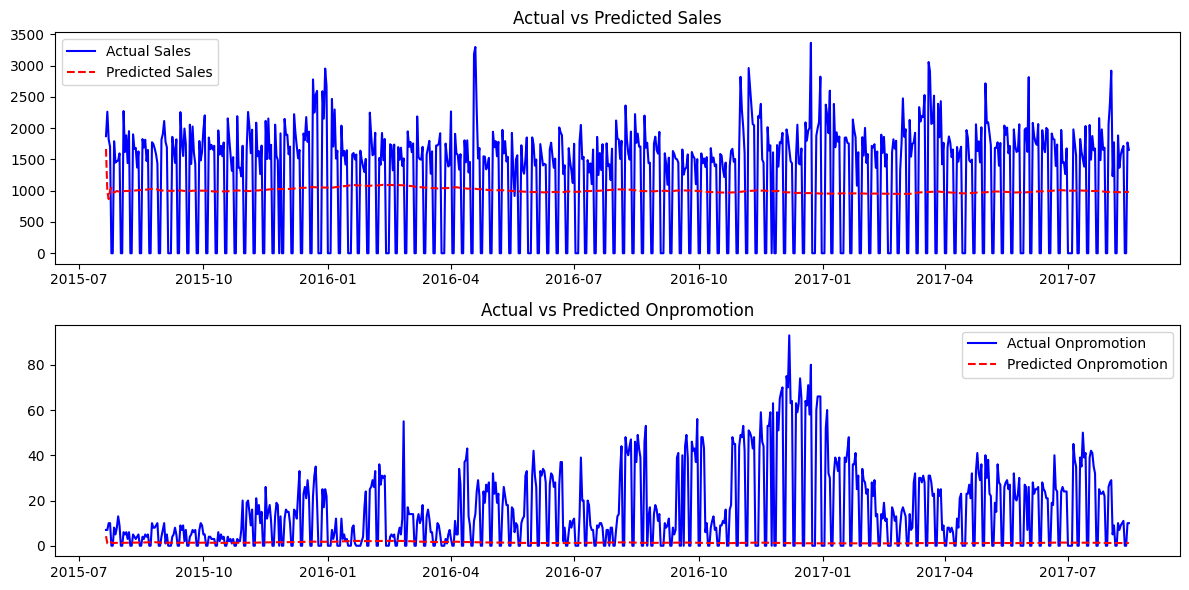

In [205]:
# Plot hasil prediksi vs actual
plt.figure(figsize=(12, 6))

# Plot Sales
plt.subplot(2, 1, 1)
plt.plot(test_endog.index, test_endog['sales'], label='Actual Sales', color='blue')
plt.plot(test_endog.index, test_preds1['sales'], label='Predicted Sales', color='red', linestyle='dashed')
plt.title('Actual vs Predicted Sales')
plt.legend()

# Plot Onpromotion (sudah dalam skala asli)
plt.subplot(2, 1, 2)
plt.plot(test_endog.index, test_endog['onpromotion'], label='Actual Onpromotion', color='blue')
plt.plot(test_endog.index, test_preds1['onpromotion'], label='Predicted Onpromotion', color='red', linestyle='dashed')
plt.title('Actual vs Predicted Onpromotion')
plt.legend()

plt.tight_layout()
plt.show()

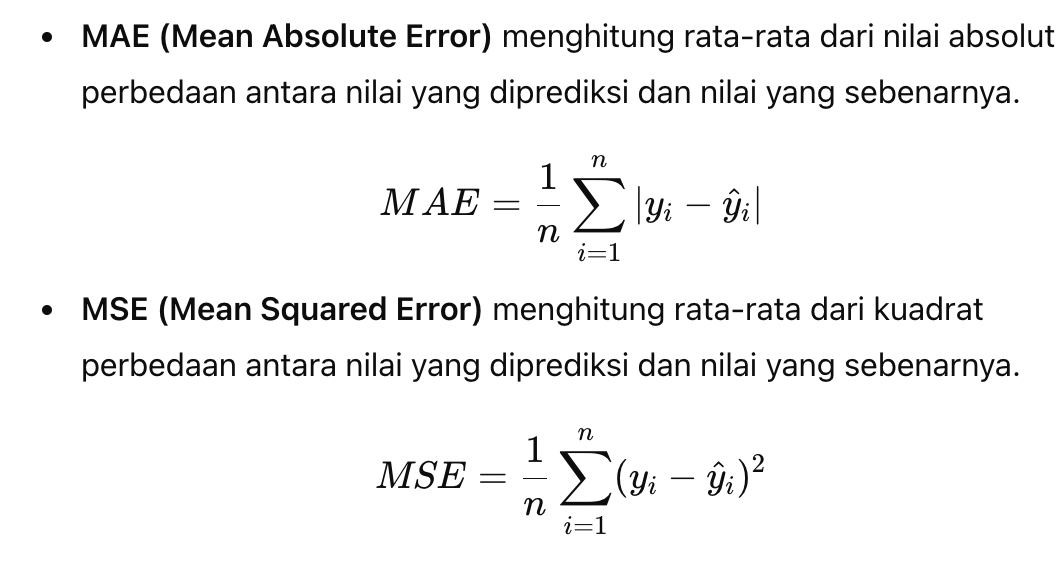

##### Modelling Using LSTM

In [226]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import time
from sklearn.metrics import mean_squared_error

# Preprocessing
scaler_endog = MinMaxScaler()
scaler_exog = MinMaxScaler()

# Scaling the data (already done earlier)
endog_scaled = scaler_endog.fit_transform(endog)
exog_scaled = scaler_exog.fit_transform(exog)

In [227]:
# Check the shape of the endog_scaled (should have 2 columns)
print(f"endog_scaled shape: {endog_scaled.shape}")

endog_scaled shape: (1687, 2)


In [228]:
# Ensure endog_scaled has 2 columns (sales and onpromotion)
print(f"endog_scaled shape: {endog_scaled.shape}")  # (1688, 2)

# Combine exogenous (exog) and endogenous (endog) features into x
x = np.concatenate([exog_scaled, endog_scaled], axis=1)

# The target variable 'y' is the endog_scaled
y = endog_scaled  # 'sales' and 'onpromotion' as the target (2 columns)

endog_scaled shape: (1687, 2)


In [229]:
def load_data(X, seq_len, train_size=0.9):
    amount_of_features = X.shape[1]
    X_mat = X
    sequence_length = seq_len + 1
    data = []

    for index in range(len(X_mat) - sequence_length):
        data.append(X_mat[index: index + sequence_length])

    data = np.array(data)
    train_split = int(round(train_size * data.shape[0]))
    train_data = data[:train_split, :]

    x_train = train_data[:, :-1]
    y_train = train_data[:, -1, 1:]  # Select only the last 2 columns (sales and onpromotion)

    x_test = data[train_split:, :-1]
    y_test = data[train_split:, -1, 1:]  # Select only the last 2 columns (sales and onpromotion)

    # Check shapes before reshaping
    print(f"x_train shape (before reshape): {x_train.shape}")
    print(f"y_train shape (before reshape): {y_train.shape}")

    # Make sure y_train and y_test have 2 columns (for 'sales' and 'onpromotion')
    assert y_train.shape[1] == 2, "y_train should have 2 columns (sales and onpromotion)"
    assert y_test.shape[1] == 2, "y_test should have 2 columns (sales and onpromotion)"

    # Reshape x_train and x_test to 3D arrays for LSTM input
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))

    return x_train, y_train, x_test, y_test

# Setting window size
window = 22
X_train, y_train, X_test, y_test = load_data(x, window)

# Print the shapes of data after loading and reshaping
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

x_train shape (before reshape): (1498, 22, 3)
y_train shape (before reshape): (1498, 2)
X_train shape: (1498, 22, 3), y_train shape: (1498, 2)
X_test shape: (166, 22, 3), y_test shape: (166, 2)


In [230]:
# LSTM Model
model = Sequential()
model.add(LSTM(units=50, input_shape=(window, X_train.shape[2])))
model.add(Dropout(0.2))

# Output layer with 2 units for 'sales' and 'onpromotion'
model.add(Dense(units=50, kernel_initializer='uniform', activation='tanh'))
model.add(Dense(units=2, kernel_initializer='uniform', activation='linear'))  # Two outputs

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
start = time.time()
history = model.fit(X_train, y_train, epochs=100, batch_size=35, validation_split=0.05, verbose=1)
print('Compilation time: ', time.time() - start)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0434 - val_loss: 0.0595
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0256 - val_loss: 0.0487
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0231 - val_loss: 0.0503
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0237 - val_loss: 0.0468
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0217 - val_loss: 0.0479
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0220 - val_loss: 0.0474
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0227 - val_loss: 0.0470
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0214 - val_loss: 0.0479
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0222 - val_loss: 0.0485
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0230 - val_loss: 0.0494
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0221 - val_loss: 0.0489
Epoch 12/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0

In [231]:
# Predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# Inverse transform to get the actual values
trainPredict = scaler_endog.inverse_transform(trainPredict)
trainY = scaler_endog.inverse_transform(y_train)
testPredict = scaler_endog.inverse_transform(testPredict)
testY = scaler_endog.inverse_transform(y_test)

# Plotting
plot_predicted_sales = testPredict[:, 0].reshape(-1, 1)
plot_predicted_onpromotion = testPredict[:, 1].reshape(-1, 1)

plot_actual_sales = testY[:, 0].reshape(-1, 1)
plot_actual_onpromotion = testY[:, 1].reshape(-1, 1)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [212]:
# Print shapes for verification
print(f"Plot actual sales shape: {plot_actual_sales.shape}")
print(f"Plot predicted sales shape: {plot_predicted_sales.shape}")

Plot actual sales shape: (166, 1)
Plot predicted sales shape: (166, 1)


In [232]:
# Calculate RMSE for both sales and onpromotion
trainScore_sales = mean_squared_error(trainY[:, 0], trainPredict[:, 0]) ** 0.5
testScore_sales = mean_squared_error(testY[:, 0], plot_predicted_sales[:, 0]) ** 0.5

trainScore_onpromotion = mean_squared_error(trainY[:, 1], trainPredict[:, 1]) ** 0.5
testScore_onpromotion = mean_squared_error(testY[:, 1], plot_predicted_onpromotion[:, 0]) ** 0.5

print(f'Train Score for sales: {trainScore_sales:.2f} RMSE')
print(f'Test Score for sales: {testScore_sales:.2f} RMSE')

print(f'Train Score for onpromotion: {trainScore_onpromotion:.2f} RMSE')
print(f'Test Score for onpromotion: {testScore_onpromotion:.2f} RMSE')


Train Score for sales: 699.60 RMSE
Test Score for sales: 585.64 RMSE
Train Score for onpromotion: 10.67 RMSE
Test Score for onpromotion: 15.57 RMSE


In [233]:
# Plot the results for both targets
plt.figure(figsize=(20, 7))

<Figure size 2000x700 with 0 Axes>

<Figure size 2000x700 with 0 Axes>

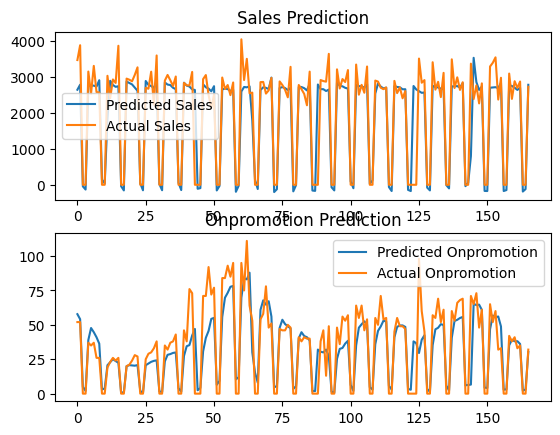

In [234]:
# Sales plot
plt.subplot(2, 1, 1)
plt.plot(pd.DataFrame(plot_predicted_sales), label='Predicted Sales')
plt.plot(pd.DataFrame(plot_actual_sales), label='Actual Sales')
plt.legend(loc='best')
plt.title('Sales Prediction')

# Onpromotion plot
plt.subplot(2, 1, 2)
plt.plot(pd.DataFrame(plot_predicted_onpromotion), label='Predicted Onpromotion')
plt.plot(pd.DataFrame(plot_actual_onpromotion), label='Actual Onpromotion')
plt.legend(loc='best')
plt.title('Onpromotion Prediction')

plt.show()

#### 3.3 CLEANING

In [235]:
# Filter hanya data dengan family "CLEANING"
df_cleaning = df_store[df_store["family"] == "CLEANING"]
df_cleaning

id  store_nbr    family   sales  onpromotion  dcoilwtico  \
date                                                                        
2013-01-02     3241          5  CLEANING  1810.0            0       93.14   
2013-01-03     5023          5  CLEANING  1305.0            0       92.97   
2013-01-04     6805          5  CLEANING  1159.0            0       93.12   
2013-01-07    12151          5  CLEANING  1043.0            0       93.20   
2013-01-08    13933          5  CLEANING  1062.0            0       93.21   
...             ...        ...       ...     ...          ...         ...   
2017-08-09  2989873          5  CLEANING   687.0           11       49.59   
2017-08-10  2991655          5  CLEANING   845.0           14       48.54   
2017-08-11  2993437          5  CLEANING   775.0           16       48.81   
2017-08-14  2998783          5  CLEANING   676.0           10       47.59   
2017-08-15  3000565          5  CLEANING   721.0            8       47.57   

            dcoilwtico_interpolate  onpromotion_diff  
date                                                  
2013-01-02                   93.14               0.0  
2013-01-03                   92.97               0.0  
2013-01-04                   93.12               0.0  
2013-01-07                   93.20               0.0  
2013-01-08                   93.21               0.0  
...                            ...               ...  
2017-08-09                   49.59              11.0  
2017-08-10                   48.54              14.0  
2017-08-11                   48.81              16.0  
2017-08-14                   47.59              10.0  
2017-08-15                   47.57               8.0  

[1163 rows x 8 columns]

In [236]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf

# Hitung ACF untuk sales
acf_values = acf(df_cleaning['sales'], nlags=1100, fft=False)  # Gunakan fft=False untuk akurasi lebih baik

# Buat DataFrame baru untuk hasil ACF tanpa mengubah df_grocery
acf_df = pd.DataFrame({'Lag': np.arange(len(acf_values)), 'ACF_Sales': acf_values})

# Tentukan jumlah observasi
n = len(df_cleaning['sales'])

# Hitung batas konfidensi 95%
conf_interval = 1.96 / np.sqrt(n)

# Tambahkan kolom untuk batas bawah dan atas
acf_df['Lower_Bound'] = -conf_interval
acf_df['Upper_Bound'] = conf_interval

# Filter hanya untuk lag tahunan (365, 730, 1095)
acf_yearly = acf_df[acf_df['Lag'].isin([365, 730, 1095])]

# Evaluasi apakah nilai ACF signifikan (di luar batas konfidensi)
acf_yearly['Significant'] = (acf_yearly['ACF_Sales'] > acf_yearly['Upper_Bound']) | (acf_yearly['ACF_Sales'] < acf_yearly['Lower_Bound'])

# Tampilkan hasil
acf_yearly

<ipython-input-236-73c0fab4c249>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acf_yearly['Significant'] = (acf_yearly['ACF_Sales'] > acf_yearly['Upper_Bound']) | (acf_yearly['ACF_Sales'] < acf_yearly['Lower_Bound'])


Lag  ACF_Sales  Lower_Bound  Upper_Bound  Significant
365    365  -0.049408    -0.057473     0.057473        False
730    730  -0.026397    -0.057473     0.057473        False
1095  1095  -0.007264    -0.057473     0.057473        False

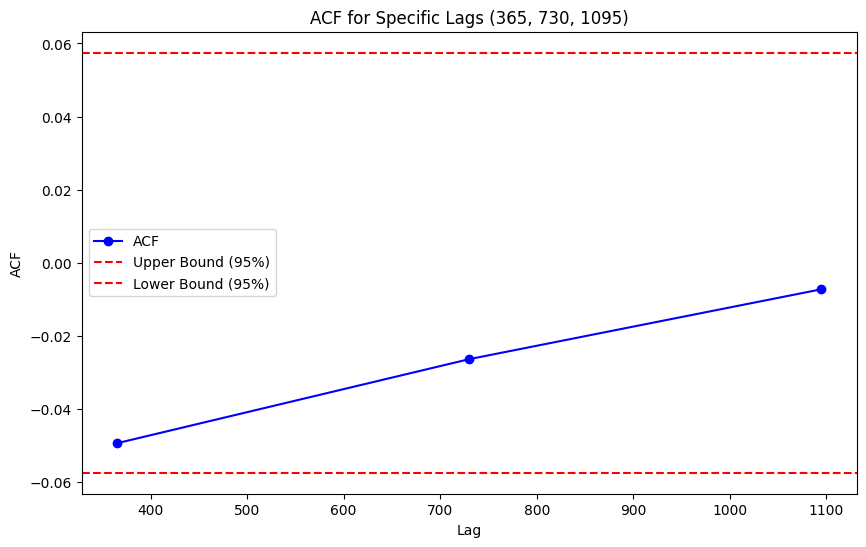

In [237]:
# Filter ACF hanya untuk lag 365, 730, 1095
acf_yearly = acf_df[acf_df['Lag'].isin([365, 730, 1095])]

# Plot ACF untuk lag tersebut
plt.figure(figsize=(10, 6))
plt.plot(acf_yearly['Lag'], acf_yearly['ACF_Sales'], marker='o', color='b', label='ACF')

# Tambahkan garis batas konfidensi
plt.axhline(y=1.96/np.sqrt(n), color='r', linestyle='--', label='Upper Bound (95%)')
plt.axhline(y=-1.96/np.sqrt(n), color='r', linestyle='--', label='Lower Bound (95%)')

# Menambahkan label dan judul
plt.title('ACF for Specific Lags (365, 730, 1095)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.legend()

# Tampilkan chart
plt.show()

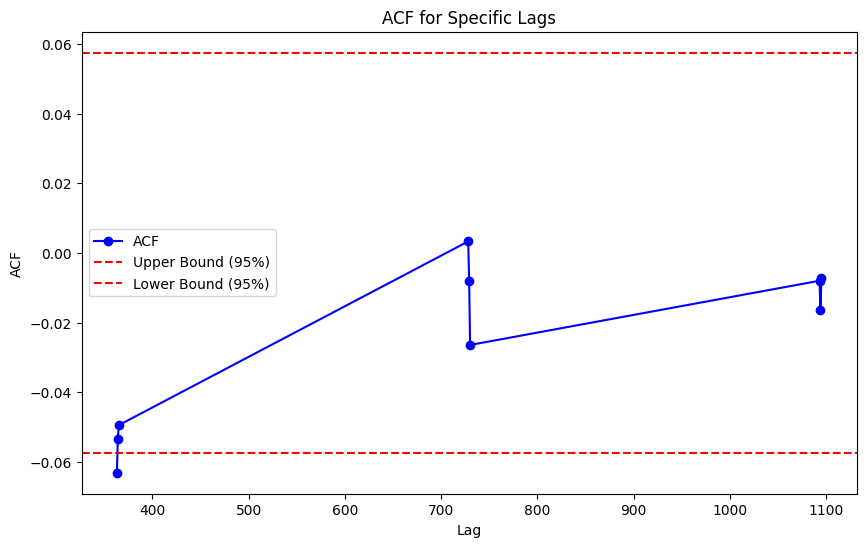

In [238]:
# Filter ACF hanya untuk lag tertentu
acf_somelags = acf_df[acf_df['Lag'].isin([363, 364, 365, 728, 729, 730, 1093, 1094, 1095])]

# Plot ACF untuk lag tersebut
plt.figure(figsize=(10, 6))
plt.plot(acf_somelags['Lag'], acf_somelags['ACF_Sales'], marker='o', color='b', label='ACF')

# Tambahkan garis batas konfidensi
plt.axhline(y=1.96/np.sqrt(n), color='r', linestyle='--', label='Upper Bound (95%)')
plt.axhline(y=-1.96/np.sqrt(n), color='r', linestyle='--', label='Lower Bound (95%)')

# Menambahkan label dan judul
plt.title('ACF for Specific Lags')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.legend()

# Tampilkan chart
plt.show()

In [239]:
from scipy.stats import boxcox

# Reset the index to bring back 'date' as a column
df_cleaning = df_cleaning.reset_index()

df_cleaning_new = df_cleaning[['date','store_nbr','family','sales','onpromotion','dcoilwtico']]


In [240]:
# Filter hanya data dengan family "CLEANING"
df_cleaning_new = df_cleaning[df_cleaning["family"] == "CLEANING"]

# This line defines the variable full_date_range
full_date_range = pd.date_range(start=df_cleaning_new['date'].min(), end=df_cleaning_new['date'].max(), freq='D')

# Set index ke 'date' dan reindex dengan full_date_range
df_cleaning_new = df_cleaning_new.set_index('date').reindex(full_date_range).reset_index()

# Pastikan kolom tetap bernama 'date'
df_cleaning_new.rename(columns={'index': 'date'}, inplace=True)

# Isi sales dan onpromotion dengan 0, tetapi dcoilwtico tetap NaN
df_cleaning_new[['sales', 'onpromotion']] = df_cleaning_new[['sales', 'onpromotion']].fillna(0)

# Isi missing store_nbr dengan 5 dan family dengan "GROCERY I"
df_cleaning_new['store_nbr'] = df_cleaning_new['store_nbr'].fillna(5).astype(int)
df_cleaning_new['family'] = df_cleaning_new['family'].fillna("CLEANING")

In [241]:
df_cleaning_new

date         id  store_nbr    family   sales  onpromotion  \
0    2013-01-02     3241.0          5  CLEANING  1810.0          0.0   
1    2013-01-03     5023.0          5  CLEANING  1305.0          0.0   
2    2013-01-04     6805.0          5  CLEANING  1159.0          0.0   
3    2013-01-05        NaN          5  CLEANING     0.0          0.0   
4    2013-01-06        NaN          5  CLEANING     0.0          0.0   
...         ...        ...        ...       ...     ...          ...   
1682 2017-08-11  2993437.0          5  CLEANING   775.0         16.0   
1683 2017-08-12        NaN          5  CLEANING     0.0          0.0   
1684 2017-08-13        NaN          5  CLEANING     0.0          0.0   
1685 2017-08-14  2998783.0          5  CLEANING   676.0         10.0   
1686 2017-08-15  3000565.0          5  CLEANING   721.0          8.0   

      dcoilwtico  dcoilwtico_interpolate  onpromotion_diff  
0          93.14                   93.14               0.0  
1          92.97                   92.97               0.0  
2          93.12                   93.12               0.0  
3            NaN                     NaN               NaN  
4            NaN                     NaN               NaN  
...          ...                     ...               ...  
1682       48.81                   48.81              16.0  
1683         NaN                     NaN               NaN  
1684         NaN                     NaN               NaN  
1685       47.59                   47.59              10.0  
1686       47.57                   47.57               8.0  

[1687 rows x 9 columns]

In [242]:
df_cleaning_new['onpromotion_boxcox'], lambda_bc = boxcox(df_cleaning_new['onpromotion'] + 1)
df_cleaning_new

date         id  store_nbr    family   sales  onpromotion  \
0    2013-01-02     3241.0          5  CLEANING  1810.0          0.0   
1    2013-01-03     5023.0          5  CLEANING  1305.0          0.0   
2    2013-01-04     6805.0          5  CLEANING  1159.0          0.0   
3    2013-01-05        NaN          5  CLEANING     0.0          0.0   
4    2013-01-06        NaN          5  CLEANING     0.0          0.0   
...         ...        ...        ...       ...     ...          ...   
1682 2017-08-11  2993437.0          5  CLEANING   775.0         16.0   
1683 2017-08-12        NaN          5  CLEANING     0.0          0.0   
1684 2017-08-13        NaN          5  CLEANING     0.0          0.0   
1685 2017-08-14  2998783.0          5  CLEANING   676.0         10.0   
1686 2017-08-15  3000565.0          5  CLEANING   721.0          8.0   

      dcoilwtico  dcoilwtico_interpolate  onpromotion_diff  onpromotion_boxcox  
0          93.14                   93.14               0.0            0.000000  
1          92.97                   92.97               0.0            0.000000  
2          93.12                   93.12               0.0            0.000000  
3            NaN                     NaN               NaN            0.000000  
4            NaN                     NaN               NaN            0.000000  
...          ...                     ...               ...                 ...  
1682       48.81                   48.81              16.0            1.232981  
1683         NaN                     NaN               NaN            0.000000  
1684         NaN                     NaN               NaN            0.000000  
1685       47.59                   47.59              10.0            1.162788  
1686       47.57                   47.57               8.0            1.122498  

[1687 rows x 10 columns]

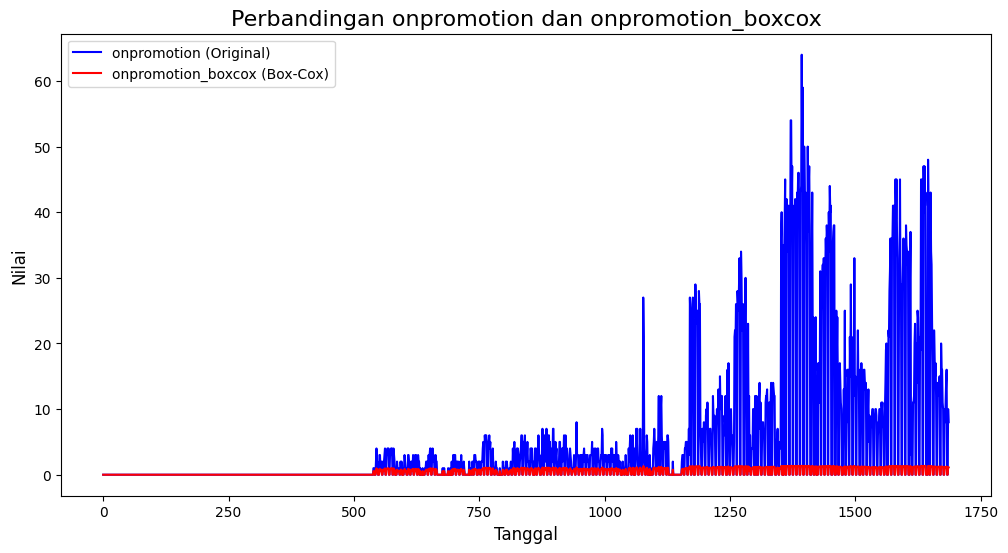

In [243]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot 'onpromotion' (data asli)
plt.plot(df_cleaning_new.index, df_cleaning_new['onpromotion'], label='onpromotion (Original)', color='blue')

# Plot 'onpromotion_boxcox' (setelah Box-Cox)
plt.plot(df_cleaning_new.index, df_cleaning_new['onpromotion_boxcox'], label='onpromotion_boxcox (Box-Cox)', color='red')

# Menambahkan label dan judul
plt.title('Perbandingan onpromotion dan onpromotion_boxcox', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Nilai', fontsize=12)

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

In [244]:
df_cleaning_new['dcoilwtico_interpolate'] = (
    df_cleaning_new['dcoilwtico']
    .interpolate(method='polynomial', order=2)
    .fillna(method='bfill')  # Mengisi NaN awal dengan nilai pertama yang valid
)

<ipython-input-244-32dad09576ff>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='bfill')  # Mengisi NaN awal dengan nilai pertama yang valid


In [245]:
df_cleaning_new

date         id  store_nbr    family   sales  onpromotion  \
0    2013-01-02     3241.0          5  CLEANING  1810.0          0.0   
1    2013-01-03     5023.0          5  CLEANING  1305.0          0.0   
2    2013-01-04     6805.0          5  CLEANING  1159.0          0.0   
3    2013-01-05        NaN          5  CLEANING     0.0          0.0   
4    2013-01-06        NaN          5  CLEANING     0.0          0.0   
...         ...        ...        ...       ...     ...          ...   
1682 2017-08-11  2993437.0          5  CLEANING   775.0         16.0   
1683 2017-08-12        NaN          5  CLEANING     0.0          0.0   
1684 2017-08-13        NaN          5  CLEANING     0.0          0.0   
1685 2017-08-14  2998783.0          5  CLEANING   676.0         10.0   
1686 2017-08-15  3000565.0          5  CLEANING   721.0          8.0   

      dcoilwtico  dcoilwtico_interpolate  onpromotion_diff  onpromotion_boxcox  
0          93.14               93.140000               0.0            0.000000  
1          92.97               92.970000               0.0            0.000000  
2          93.12               93.120000               0.0            0.000000  
3            NaN               93.205338               NaN            0.000000  
4            NaN               93.185272               NaN            0.000000  
...          ...                     ...               ...                 ...  
1682       48.81               48.810000              16.0            1.232981  
1683         NaN               48.717426               NaN            0.000000  
1684         NaN               48.020802               NaN            0.000000  
1685       47.59               47.590000              10.0            1.162788  
1686       47.57               47.570000               8.0            1.122498  

[1687 rows x 10 columns]

##### Modelling Using VARMAX with MAE

In [246]:
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_absolute_error

# Since 'date' is likely the index, reset it to a column
df_cleaning_new= df_cleaning_new.reset_index()

# Pastikan kolom tanggal dalam format datetime
df_cleaning_new['date'] = pd.to_datetime(df_cleaning_new['date'])

# Set kolom tanggal sebagai indeks
df_cleaning_new.set_index('date', inplace=True)

# Pisahkan variabel endogen dan eksogen
endog = df_cleaning_new[['sales', 'onpromotion_boxcox']]
exog = df_cleaning_new[['dcoilwtico_interpolate']]

# Pisahkan data menjadi train dan test
train_size = int(len(df_cleaning) * 0.8)
train_endog, test_endog = endog.iloc[:train_size], endog.iloc[train_size:]
train_exog, test_exog = exog.iloc[:train_size], exog.iloc[train_size:]

In [247]:
train_endog

sales  onpromotion_boxcox
date                                  
2013-01-02  1810.0             0.00000
2013-01-03  1305.0             0.00000
2013-01-04  1159.0             0.00000
2013-01-05     0.0             0.00000
2013-01-06     0.0             0.00000
...            ...                 ...
2015-07-16   896.0             0.96606
2015-07-17   996.0             0.54933
2015-07-18     0.0             0.00000
2015-07-19     0.0             0.00000
2015-07-20  1008.0             0.54933

[930 rows x 2 columns]

In [248]:
test_endog

sales  onpromotion_boxcox
date                                 
2015-07-21  977.0            0.887679
2015-07-22  936.0            0.966060
2015-07-23  904.0            0.887679
2015-07-24  796.0            0.766790
2015-07-25    0.0            0.000000
...           ...                 ...
2017-08-11  775.0            1.232981
2017-08-12    0.0            0.000000
2017-08-13    0.0            0.000000
2017-08-14  676.0            1.162788
2017-08-15  721.0            1.122498

[757 rows x 2 columns]

In [249]:
train_exog

dcoilwtico_interpolate
date                              
2013-01-02               93.140000
2013-01-03               92.970000
2013-01-04               93.120000
2013-01-05               93.205338
2013-01-06               93.185272
...                            ...
2015-07-16               50.900000
2015-07-17               50.880000
2015-07-18               50.564099
2015-07-19               50.009048
2015-07-20               50.110000

[930 rows x 1 columns]

In [250]:
test_endog

sales  onpromotion_boxcox
date                                 
2015-07-21  977.0            0.887679
2015-07-22  936.0            0.966060
2015-07-23  904.0            0.887679
2015-07-24  796.0            0.766790
2015-07-25    0.0            0.000000
...           ...                 ...
2017-08-11  775.0            1.232981
2017-08-12    0.0            0.000000
2017-08-13    0.0            0.000000
2017-08-14  676.0            1.162788
2017-08-15  721.0            1.122498

[757 rows x 2 columns]

In [251]:
import itertools
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_absolute_error
from scipy.special import inv_boxcox  # Perbaiki impor di sini
from scipy.stats import boxcox

# Grid search untuk parameter p dan q
p_values = range(1, 5)  # Order autoregressive
q_values = range(0, 4)  # Order moving average
best_score = float("inf")
best_cfg = None
best_model = None

# Hitung rata-rata aktual untuk normalisasi
mean_sales = test_endog['sales'].mean()
mean_promo = test_endog['onpromotion_boxcox'].mean()

In [252]:
import itertools
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_absolute_error
from scipy.special import inv_boxcox  # Perbaiki impor di sini
from scipy.stats import boxcox

# Grid search untuk parameter p dan q
p_values = range(1, 5)  # Order autoregressive
q_values = range(0, 4)  # Order moving average
best_score = float("inf")
best_cfg = None
best_model = None

# Hitung rata-rata aktual untuk normalisasi
mean_sales = test_endog['sales'].mean()
mean_promo = test_endog['onpromotion_boxcox'].mean()

# Coba semua kombinasi (p, q)
for p, q in itertools.product(p_values, q_values):
    try:
        print(f"Evaluating VARMAX({p},{q})...")

        # Train model VARMAX
        model = VARMAX(train_endog, exog=train_exog, order=(p, q), trend='c')
        model_fit = model.fit(disp=False)

        # Forecast untuk data test
        preds = model_fit.forecast(steps=len(test_endog), exog=test_exog)

        # Kembalikan prediksi 'onpromotion' ke skala data awal
        preds['onpromotion'] = inv_boxcox(preds['onpromotion_boxcox'], lambda_bc) - 1  # Mengurangi 1 kembali
        test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga

        # Hitung MAE antara prediksi dan data aktual
        mae_sales = mean_absolute_error(test_endog['sales'], preds['sales'])
        mae_promo = mean_absolute_error(test_endog['onpromotion'], preds['onpromotion'])

        # Normalisasi MAE
        mae_sales_norm = mae_sales / mean_sales
        mae_promo_norm = mae_promo / mean_promo
        mae_normalized = mae_sales_norm + mae_promo_norm  # Gabungkan kesalahan yang telah dinormalisasi

        print(f"VARMAX({p},{q}) - Normalized MAE: {mae_normalized:.4f}")

        # Simpan model dengan MAE terbaik
        if mae_normalized < best_score:
            best_score = mae_normalized
            best_cfg = (p, q)
            best_model = model_fit

    except Exception as e:
        print(f"VARMAX({p},{q}) gagal dilatih: {e}")

print(f"\nBest VARMAX order: {best_cfg} dengan Normalized MAE: {best_score:.4f}")

Evaluating VARMAX(1,0)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-252-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarnin

VARMAX(1,0) - Normalized MAE: 14.6516
Evaluating VARMAX(1,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-252-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(1,1) - Normalized MAE: 14.6762
Evaluating VARMAX(1,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-252-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

VARMAX(1,2) - Normalized MAE: 14.6557
Evaluating VARMAX(1,3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-252-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

VARMAX(1,3) - Normalized MAE: 14.6345
Evaluating VARMAX(2,0)...


<ipython-input-252-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


VARMAX(2,0) - Normalized MAE: 14.6519
Evaluating VARMAX(2,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-252-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

VARMAX(2,1) - Normalized MAE: 14.6280
Evaluating VARMAX(2,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-252-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(2,2) - Normalized MAE: 14.6526
Evaluating VARMAX(2,3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-252-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

VARMAX(2,3) - Normalized MAE: 14.6293
Evaluating VARMAX(3,0)...


<ipython-input-252-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


VARMAX(3,0) - Normalized MAE: 14.6527
Evaluating VARMAX(3,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-252-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(3,1) - Normalized MAE: 14.6528
Evaluating VARMAX(3,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-252-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(3,2) - Normalized MAE: 14.6532
Evaluating VARMAX(3,3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-252-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

VARMAX(3,3) - Normalized MAE: 14.5540
Evaluating VARMAX(4,0)...


<ipython-input-252-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


VARMAX(4,0) - Normalized MAE: 14.6497
Evaluating VARMAX(4,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-252-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

VARMAX(4,1) - Normalized MAE: 14.6409
Evaluating VARMAX(4,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-252-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

VARMAX(4,2) - Normalized MAE: 14.6330
Evaluating VARMAX(4,3)...
VARMAX(4,3) - Normalized MAE: 14.6206

Best VARMAX order: (3, 3) dengan Normalized MAE: 14.5540


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-252-ca175b918cbf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga


In [253]:
# Gunakan model terbaik untuk prediksi
test_preds = best_model.forecast(steps=len(test_endog), exog=test_exog)

# Kembalikan prediksi 'onpromotion' ke skala data awal untuk visualisasi
test_preds['onpromotion'] = inv_boxcox(test_preds['onpromotion_boxcox'], lambda_bc) - 1

test_preds

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


sales  onpromotion_boxcox  onpromotion
2015-07-21  1301.676631            0.677761     1.505585
2015-07-22   994.150039            0.577048     1.093574
2015-07-23   590.130942            0.477040     0.786660
2015-07-24   497.252779            0.458298     0.737592
2015-07-25   651.942187            0.516528     0.898110
...                 ...                 ...          ...
2017-08-11   733.980648            0.607159     1.203970
2017-08-12   734.293357            0.607477     1.205189
2017-08-13   735.402147            0.610513     1.216878
2017-08-14   736.830047            0.613999     1.230432
2017-08-15   737.184498            0.615669     1.236973

[757 rows x 3 columns]

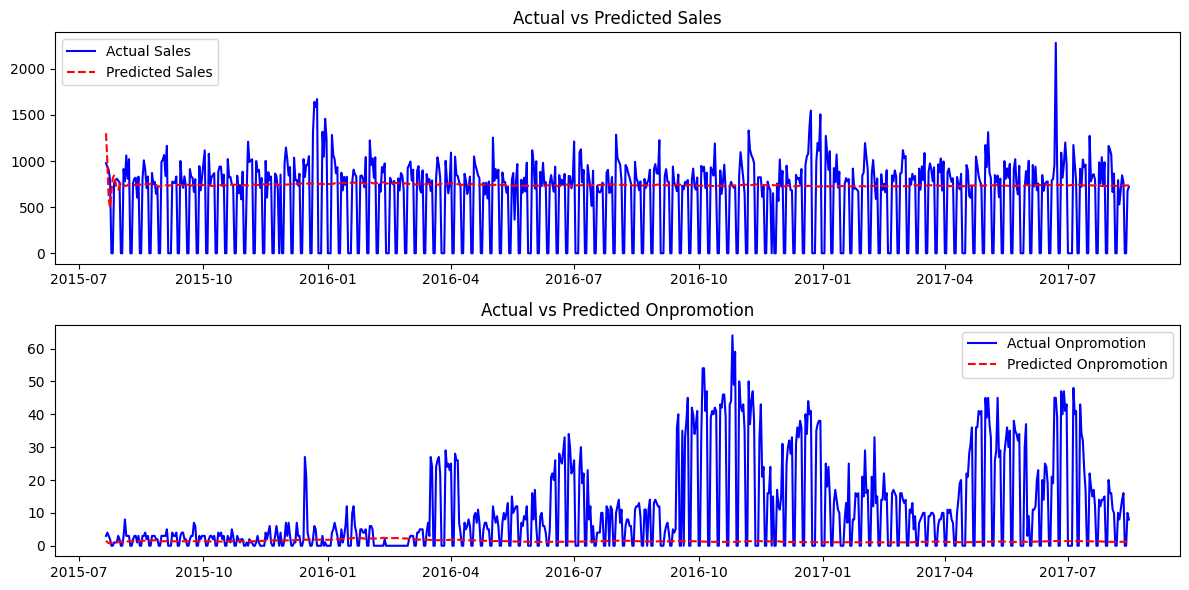

In [254]:
# Plot hasil prediksi vs actual
plt.figure(figsize=(12, 6))

# Plot Sales
plt.subplot(2, 1, 1)
plt.plot(test_endog.index, test_endog['sales'], label='Actual Sales', color='blue')
plt.plot(test_endog.index, test_preds['sales'], label='Predicted Sales', color='red', linestyle='dashed')
plt.title('Actual vs Predicted Sales')
plt.legend()

# Plot Onpromotion (sudah dalam skala asli)
plt.subplot(2, 1, 2)
plt.plot(test_endog.index, test_endog['onpromotion'], label='Actual Onpromotion', color='blue')
plt.plot(test_endog.index, test_preds['onpromotion'], label='Predicted Onpromotion', color='red', linestyle='dashed')
plt.title('Actual vs Predicted Onpromotion')
plt.legend()

plt.tight_layout()
plt.show()

##### Modelling Using VARMAX with RMSE

In [255]:
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_squared_error
from scipy.special import inv_boxcox

# Grid search untuk parameter p dan q
p_options = range(1, 5)  # Order autoregressive
q_options = range(0, 4)  # Order moving average
lowest_error = float("inf")
best_parameters = None
optimal_model = None

# Hitung rata-rata aktual untuk normalisasi
avg_sales = test_endog['sales'].mean()
avg_promo = test_endog['onpromotion_boxcox'].mean()

# Coba semua kombinasi (p, q)
for p, q in itertools.product(p_options, q_options):
    try:
        print(f"Evaluating VARMAX({p},{q})...")

        # Train model VARMAX
        model_instance = VARMAX(train_endog, exog=train_exog, order=(p, q), trend='c')
        fitted_model = model_instance.fit(disp=False)

        # Forecast untuk data test
        predictions = fitted_model.forecast(steps=len(test_endog), exog=test_exog)

        # Kembalikan prediksi 'onpromotion' ke skala data awal
        predictions['onpromotion'] = inv_boxcox(predictions['onpromotion_boxcox'], lambda_bc) - 1  # Mengurangi 1 kembali
        test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga

        # Hitung RMSE antara prediksi dan data aktual
        rmse_sales = np.sqrt(mean_squared_error(test_endog['sales'], predictions['sales']))
        rmse_promo = np.sqrt(mean_squared_error(test_endog['onpromotion'], predictions['onpromotion']))

        # Normalisasi RMSE
        rmse_sales_norm = rmse_sales / avg_sales
        rmse_promo_norm = rmse_promo / avg_promo
        rmse_total = rmse_sales_norm + rmse_promo_norm  # Gabungkan kesalahan yang telah dinormalisasi

        print(f"VARMAX({p},{q}) - Normalized RMSE: {rmse_total:.4f}")

        # Simpan model dengan RMSE terbaik
        if rmse_total < lowest_error:
            lowest_error = rmse_total
            best_parameters = (p, q)
            optimal_model = fitted_model

    except Exception as e:
        print(f"VARMAX({p},{q}) gagal dilatih: {e}")

print(f"\nBest VARMAX order: {best_parameters} dengan Normalized RMSE: {lowest_error:.4f}")

Evaluating VARMAX(1,0)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-255-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarnin

VARMAX(1,0) - Normalized RMSE: 23.5443
Evaluating VARMAX(1,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-255-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(1,1) - Normalized RMSE: 23.5420
Evaluating VARMAX(1,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-255-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

VARMAX(1,2) - Normalized RMSE: 23.5081
Evaluating VARMAX(1,3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-255-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

VARMAX(1,3) - Normalized RMSE: 23.4865
Evaluating VARMAX(2,0)...


<ipython-input-255-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


VARMAX(2,0) - Normalized RMSE: 23.5448
Evaluating VARMAX(2,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-255-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

VARMAX(2,1) - Normalized RMSE: 23.4964
Evaluating VARMAX(2,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-255-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(2,2) - Normalized RMSE: 23.5462
Evaluating VARMAX(2,3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-255-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

VARMAX(2,3) - Normalized RMSE: 23.4991
Evaluating VARMAX(3,0)...


<ipython-input-255-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


VARMAX(3,0) - Normalized RMSE: 23.5457
Evaluating VARMAX(3,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-255-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(3,1) - Normalized RMSE: 23.5457
Evaluating VARMAX(3,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-255-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.

VARMAX(3,2) - Normalized RMSE: 23.5462
Evaluating VARMAX(3,3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-255-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

VARMAX(3,3) - Normalized RMSE: 23.3222
Evaluating VARMAX(4,0)...


<ipython-input-255-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


VARMAX(4,0) - Normalized RMSE: 23.5442
Evaluating VARMAX(4,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-255-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

VARMAX(4,1) - Normalized RMSE: 23.5300
Evaluating VARMAX(4,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-255-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

VARMAX(4,2) - Normalized RMSE: 23.5205
Evaluating VARMAX(4,3)...
VARMAX(4,3) - Normalized RMSE: 23.4894

Best VARMAX order: (3, 3) dengan Normalized RMSE: 23.3222


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-255-a25957bed8b3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1  # Konversi actual juga


In [257]:
# Gunakan model terbaik untuk prediksi
test_preds1 = optimal_model.forecast(steps=len(test_endog), exog=test_exog)

# Kembalikan prediksi 'onpromotion' ke skala data awal untuk visualisasi
test_preds1['onpromotion'] = inv_boxcox(test_preds['onpromotion_boxcox'], lambda_bc) - 1

test_preds1

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


sales  onpromotion_boxcox  onpromotion
2015-07-21  1301.676631            0.677761     1.505585
2015-07-22   994.150039            0.577048     1.093574
2015-07-23   590.130942            0.477040     0.786660
2015-07-24   497.252779            0.458298     0.737592
2015-07-25   651.942187            0.516528     0.898110
...                 ...                 ...          ...
2017-08-11   733.980648            0.607159     1.203970
2017-08-12   734.293357            0.607477     1.205189
2017-08-13   735.402147            0.610513     1.216878
2017-08-14   736.830047            0.613999     1.230432
2017-08-15   737.184498            0.615669     1.236973

[757 rows x 3 columns]

In [258]:
# Hitung RMSE dari prediksi terbaik
final_rmse_sales = np.sqrt(mean_squared_error(test_endog['sales'], test_preds1['sales']))
final_rmse_promo = np.sqrt(mean_squared_error(test_endog['onpromotion'], test_preds1['onpromotion']))

print(f"Final RMSE Sales: {final_rmse_sales:.4f}")
print(f"Final RMSE Onpromotion: {final_rmse_promo:.4f}")

Final RMSE Sales: 450.6045
Final RMSE Onpromotion: 16.6275


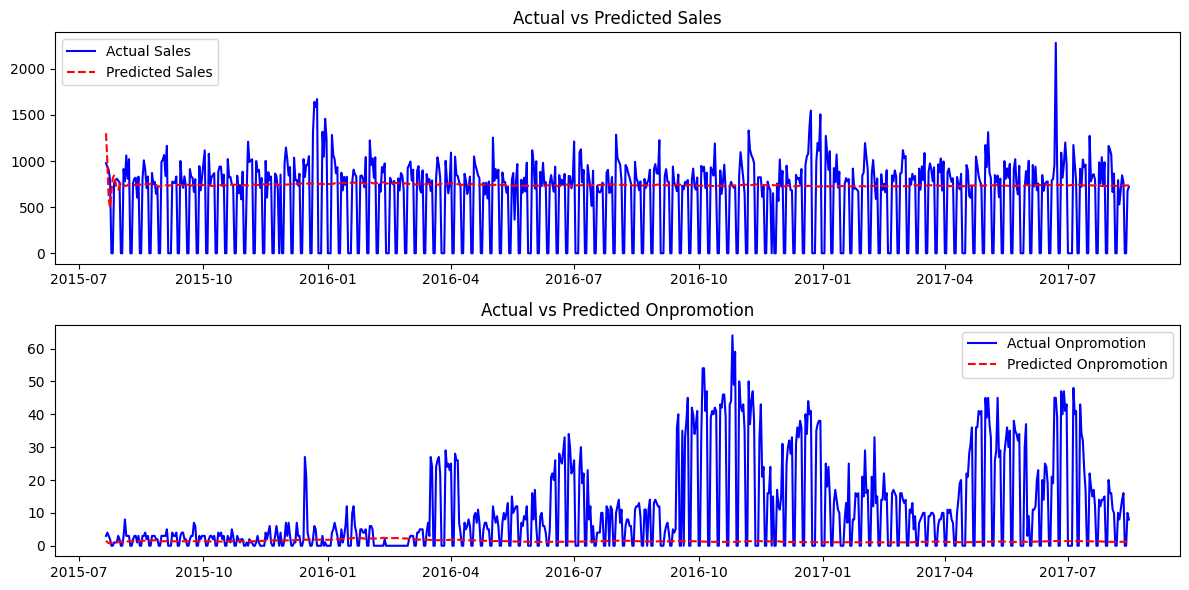

In [259]:
# Plot hasil prediksi vs actual
plt.figure(figsize=(12, 6))

# Plot Sales
plt.subplot(2, 1, 1)
plt.plot(test_endog.index, test_endog['sales'], label='Actual Sales', color='blue')
plt.plot(test_endog.index, test_preds1['sales'], label='Predicted Sales', color='red', linestyle='dashed')
plt.title('Actual vs Predicted Sales')
plt.legend()

# Plot Onpromotion (sudah dalam skala asli)
plt.subplot(2, 1, 2)
plt.plot(test_endog.index, test_endog['onpromotion'], label='Actual Onpromotion', color='blue')
plt.plot(test_endog.index, test_preds1['onpromotion'], label='Predicted Onpromotion', color='red', linestyle='dashed')
plt.title('Actual vs Predicted Onpromotion')
plt.legend()

plt.tight_layout()
plt.show()

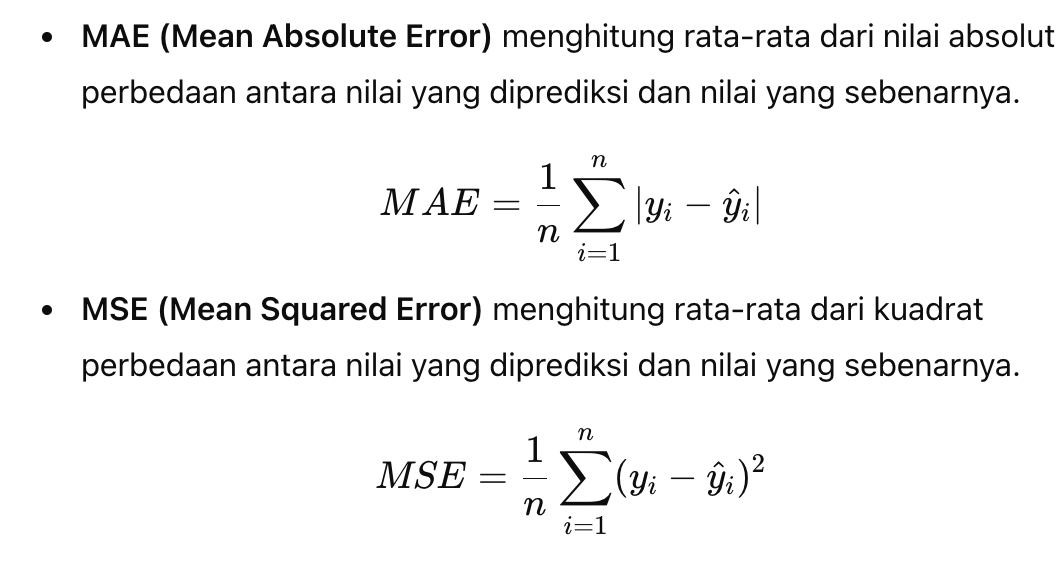

##### Modelling Using LSTM

In [260]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import time
from sklearn.metrics import mean_squared_error

# Preprocessing
scaler_endog = MinMaxScaler()
scaler_exog = MinMaxScaler()

# Scaling the data (already done earlier)
endog_scaled = scaler_endog.fit_transform(endog)
exog_scaled = scaler_exog.fit_transform(exog)

In [261]:
# Check the shape of the endog_scaled (should have 2 columns)
print(f"endog_scaled shape: {endog_scaled.shape}")

endog_scaled shape: (1687, 2)


In [262]:
# Ensure endog_scaled has 2 columns (sales and onpromotion)
print(f"endog_scaled shape: {endog_scaled.shape}")  # (1688, 2)

# Combine exogenous (exog) and endogenous (endog) features into x
x = np.concatenate([exog_scaled, endog_scaled], axis=1)

# The target variable 'y' is the endog_scaled
y = endog_scaled  # 'sales' and 'onpromotion' as the target (2 columns)


endog_scaled shape: (1687, 2)


In [263]:
def load_data(X, seq_len, train_size=0.9):
    amount_of_features = X.shape[1]
    X_mat = X
    sequence_length = seq_len + 1
    data = []

    for index in range(len(X_mat) - sequence_length):
        data.append(X_mat[index: index + sequence_length])

    data = np.array(data)
    train_split = int(round(train_size * data.shape[0]))
    train_data = data[:train_split, :]

    x_train = train_data[:, :-1]
    y_train = train_data[:, -1, 1:]  # Select only the last 2 columns (sales and onpromotion)

    x_test = data[train_split:, :-1]
    y_test = data[train_split:, -1, 1:]  # Select only the last 2 columns (sales and onpromotion)

    # Check shapes before reshaping
    print(f"x_train shape (before reshape): {x_train.shape}")
    print(f"y_train shape (before reshape): {y_train.shape}")

    # Make sure y_train and y_test have 2 columns (for 'sales' and 'onpromotion')
    assert y_train.shape[1] == 2, "y_train should have 2 columns (sales and onpromotion)"
    assert y_test.shape[1] == 2, "y_test should have 2 columns (sales and onpromotion)"

    # Reshape x_train and x_test to 3D arrays for LSTM input
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))

    return x_train, y_train, x_test, y_test

# Setting window size
window = 22
X_train, y_train, X_test, y_test = load_data(x, window)

# Print the shapes of data after loading and reshaping
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

x_train shape (before reshape): (1498, 22, 3)
y_train shape (before reshape): (1498, 2)
X_train shape: (1498, 22, 3), y_train shape: (1498, 2)
X_test shape: (166, 22, 3), y_test shape: (166, 2)


In [264]:
# LSTM Model
model = Sequential()
model.add(LSTM(units=50, input_shape=(window, X_train.shape[2])))
model.add(Dropout(0.2))

# Output layer with 2 units for 'sales' and 'onpromotion'
model.add(Dense(units=50, kernel_initializer='uniform', activation='tanh'))
model.add(Dense(units=2, kernel_initializer='uniform', activation='linear'))  # Two outputs

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
start = time.time()
history = model.fit(X_train, y_train, epochs=100, batch_size=35, validation_split=0.05, verbose=1)
print('Compilation time: ', time.time() - start)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.1353 - val_loss: 0.1262
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0657 - val_loss: 0.1196
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0587 - val_loss: 0.1188
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0609 - val_loss: 0.1160
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0598 - val_loss: 0.1182
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0633 - val_loss: 0.1158
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0597 - val_loss: 0.1134
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0608 - val_loss: 0.1143
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0592 - val_loss: 0.1118
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0587 - val_loss: 0.1099
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0583 - val_loss: 0.1083
Epoch 12/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0

In [265]:
# Predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# Inverse transform to get the actual values
trainPredict = scaler_endog.inverse_transform(trainPredict)
trainY = scaler_endog.inverse_transform(y_train)
testPredict = scaler_endog.inverse_transform(testPredict)
testY = scaler_endog.inverse_transform(y_test)

# Plotting
plot_predicted_sales = testPredict[:, 0].reshape(-1, 1)
plot_predicted_onpromotion = testPredict[:, 1].reshape(-1, 1)

plot_actual_sales = testY[:, 0].reshape(-1, 1)
plot_actual_onpromotion = testY[:, 1].reshape(-1, 1)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [266]:
# Print shapes for verification
print(f"Plot actual sales shape: {plot_actual_sales.shape}")
print(f"Plot predicted sales shape: {plot_predicted_sales.shape}")

Plot actual sales shape: (166, 1)
Plot predicted sales shape: (166, 1)


In [267]:
# Calculate RMSE for both sales and onpromotion
trainScore_sales = mean_squared_error(trainY[:, 0], trainPredict[:, 0]) ** 0.5
testScore_sales = mean_squared_error(testY[:, 0], plot_predicted_sales[:, 0]) ** 0.5

trainScore_onpromotion = mean_squared_error(trainY[:, 1], trainPredict[:, 1]) ** 0.5
testScore_onpromotion = mean_squared_error(testY[:, 1], plot_predicted_onpromotion[:, 0]) ** 0.5

print(f'Train Score for sales: {trainScore_sales:.2f} RMSE')
print(f'Test Score for sales: {testScore_sales:.2f} RMSE')

print(f'Train Score for onpromotion: {trainScore_onpromotion:.2f} RMSE')
print(f'Test Score for onpromotion: {testScore_onpromotion:.2f} RMSE')


Train Score for sales: 209.02 RMSE
Test Score for sales: 215.91 RMSE
Train Score for onpromotion: 0.19 RMSE
Test Score for onpromotion: 0.21 RMSE


In [268]:
# Plot the results for both targets
plt.figure(figsize=(20, 7))


<Figure size 2000x700 with 0 Axes>

<Figure size 2000x700 with 0 Axes>

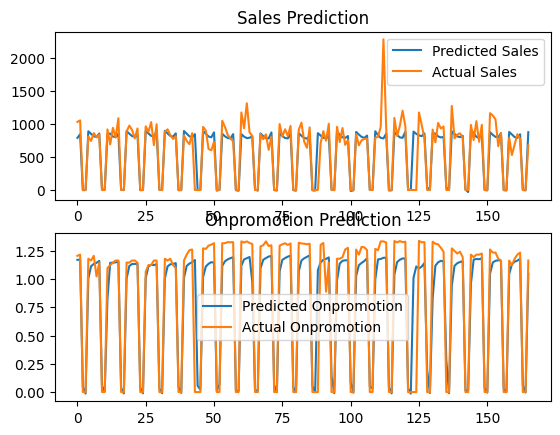

In [269]:
# Sales plot
plt.subplot(2, 1, 1)
plt.plot(pd.DataFrame(plot_predicted_sales), label='Predicted Sales')
plt.plot(pd.DataFrame(plot_actual_sales), label='Actual Sales')
plt.legend(loc='best')
plt.title('Sales Prediction')

# Onpromotion plot
plt.subplot(2, 1, 2)
plt.plot(pd.DataFrame(plot_predicted_onpromotion), label='Predicted Onpromotion')
plt.plot(pd.DataFrame(plot_actual_onpromotion), label='Actual Onpromotion')
plt.legend(loc='best')
plt.title('Onpromotion Prediction')

plt.show()